In [1]:
'''
  author : @hunarbatra
'''

import numpy as np                              
import pandas as pd                            
import matplotlib.pyplot as plt                
import seaborn as sns                          
import datetime
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
# Oxford, Mobility & Healthcare Combined Dataset - Latest 
# Data upto 6th May for all variables except for Mobility which is available upto 30th April
# Dataset download link : https://drive.google.com/open?id=1kaEPXAORXkPg-AWWdBPD0nINl5jdukS8
link = '/content/drive/My Drive/Oxford_Mobility_Task6Latest.csv'
df = pd.read_csv(link, header=0, engine = 'python', parse_dates = True)
df.head()

CountryName  ... Hospital_Beds_per_10000_population
0  Afghanistan  ...                                5.0
1  Afghanistan  ...                                5.0
2  Afghanistan  ...                                5.0
3  Afghanistan  ...                                5.0
4  Afghanistan  ...                                5.0

[5 rows x 61 columns]

In [4]:
# List of Dates for Plotting - x-axis
dates = df.Date.unique()
dates = dates.tolist()
print(dates)

['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04', '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-11', '2020-01-12', '2020-01-13', '2020-01-14', '2020-01-15', '2020-01-16', '2020-01-17', '2020-01-18', '2020-01-19', '2020-01-20', '2020-01-21', '2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25', '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29', '2020-01-30', '2020-01-31', '2020-02-01', '2020-02-02', '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06', '2020-02-07', '2020-02-08', '2020-02-09', '2020-02-10', '2020-02-11', '2020-02-12', '2020-02-13', '2020-02-14', '2020-02-15', '2020-02-16', '2020-02-17', '2020-02-18', '2020-02-19', '2020-02-20', '2020-02-21', '2020-02-22', '2020-02-23', '2020-02-24', '2020-02-25', '2020-02-26', '2020-02-27', '2020-02-28', '2020-02-29', '2020-03-01', '2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05', '2020-03-06', '2020-03-07', '2020-03-08', '2020-03-09', '2020-03-10', '2020-03-11', '2020

In [5]:
# List of countries to iterate over
countries = df.CountryName.unique()
countries = countries.tolist()
print(countries)
print(len(countries))

['Afghanistan', 'Angola', 'Argentina', 'Australia', 'Austria', 'Bahrain', 'Bangladesh', 'Barbados', 'Belgium', 'Belize', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Cameroon', 'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Denmark', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia', 'Finland', 'France', 'Gabon', 'Germany', 'Ghana', 'Greece', 'Guatemala', 'Honduras', 'Hungary', 'India', 'Indonesia', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kuwait', 'Laos', 'Lebanon', 'Libya', 'Luxembourg', 'Malaysia', 'Mali', 'Mauritius', 'Mexico', 'Moldova', 'Mongolia', 'Mozambique', 'Namibia', 'Netherlands', 'New Zealand', 'Nicaragua', 'Niger', 'Nigeria', 'Norway', 'Oman', 'Pakistan', 'Panama', 'Paraguay', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Qatar', 'Romania', 'Rwanda', 'Saudi Arabia', 'Serbia', 'Singapore', 'Slovenia', 'South Africa', 'South Korea', 'Spain', 'Sri Lanka',

In [0]:
def plot_country(country_name) :
  data = df.loc[df['CountryName'] == country_name] # 01/01 ... 06/05

  # Baseline for the healthcare variables
  nurses_baseline = data['Daily_Nurses_per_10000'].tolist()
  nurses_baseline = nurses_baseline[0]
  doctors_baseline = data['Daily_Medical_Doctors_per_10000'].tolist()
  doctors_baseline = doctors_baseline[0]
  beds_baseline = data['Daily_Hospital_Beds_per_10000'].tolist()
  beds_baseline = beds_baseline[0]

  population = data['population'].tolist()
  country_population = population[0]

  fig, ax = plt.subplots(figsize=(30,12))

  ## Healthcare variables per 10K population-> Doctors, Nurses, Hospital Beds
  # ax.plot_date(dates, data.Daily_Nurses_per_10000, linestyle='--', label = 'Daily Nurses/10k') 
  # ax.plot_date(dates, data.Daily_Medical_Doctors_per_10000, linestyle='--', label = 'Daily Doctors/10k')
  # ax.plot_date(dates, data.Daily_Hospital_Beds_per_10000, linestyle='--', label = 'Daily Beds/10k')

  nurses_data = data['Daily_Nurses_per_10000'].tolist()
  daily_nurses = [None] * 127
  daily_nurses[0] = 0
  for i in range(1, len(daily_nurses)) : 
    daily_nurses[i] = (nurses_data[i] - nurses_baseline)/nurses_baseline * 100
  ax.plot_date(dates, daily_nurses, linestyle='--', label = 'Daily Nurses/10k') 

  doctors_data = data['Daily_Medical_Doctors_per_10000'].tolist()
  daily_doctors = [None] * 127
  daily_doctors[0] = 0
  for i in range(1, len(daily_doctors)) : 
    daily_doctors[i] = (doctors_data[i] - doctors_baseline)/doctors_baseline * 100
  ax.plot_date(dates, daily_doctors, linestyle='--', label = 'Daily Doctors/10k') 

  beds_data = data['Daily_Hospital_Beds_per_10000'].tolist()
  daily_beds = [None] * 127
  daily_beds[0] = 0
  for i in range(1, len(daily_beds)) : 
    daily_beds[i] = (beds_data[i] - beds_baseline)/beds_baseline * 100
  ax.plot_date(dates, daily_beds, linestyle='--', label = 'Daily Beds/10k') 

  # Normalised Active Cases
  ax.plot_date(dates, data.Normalized_Active_Confirmed_per_10000pop, linestyle='--', label = 'Normalised Daily Active Cases', color = 'red')

  plt.title(country_name)
  plt.grid(True)
  plt.xlabel("Dates")
  plt.ylabel("Value")
  plt.legend(loc="best")
  plt.axis('tight')
  plt.style.context('seaborn-white')
  plt.xticks(rotation=90)
  plt.show()

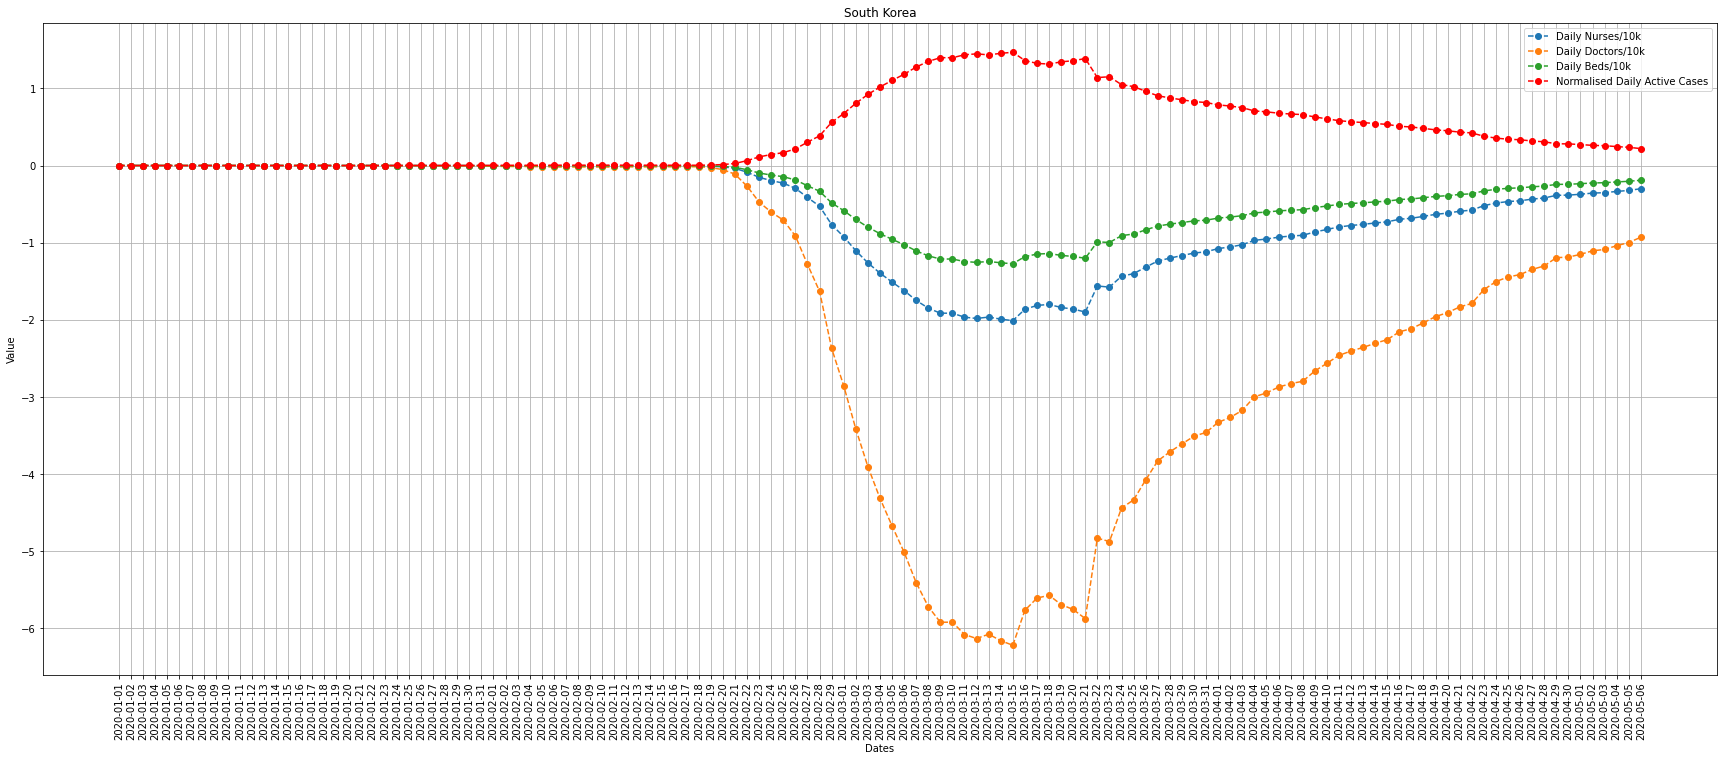

In [7]:
plot_country('South Korea')

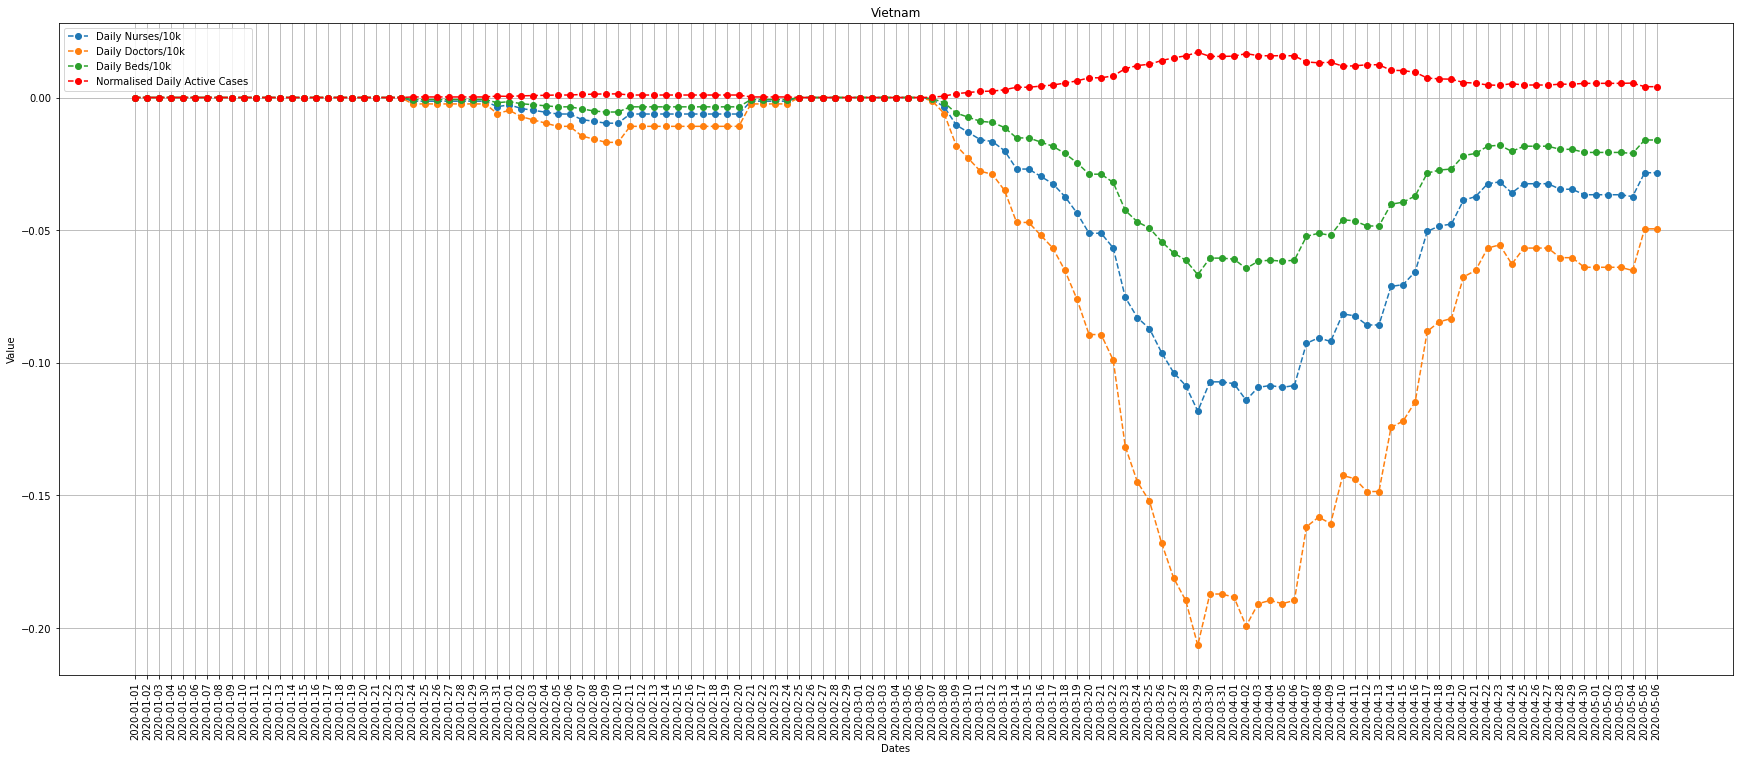

In [8]:
plot_country('Vietnam')

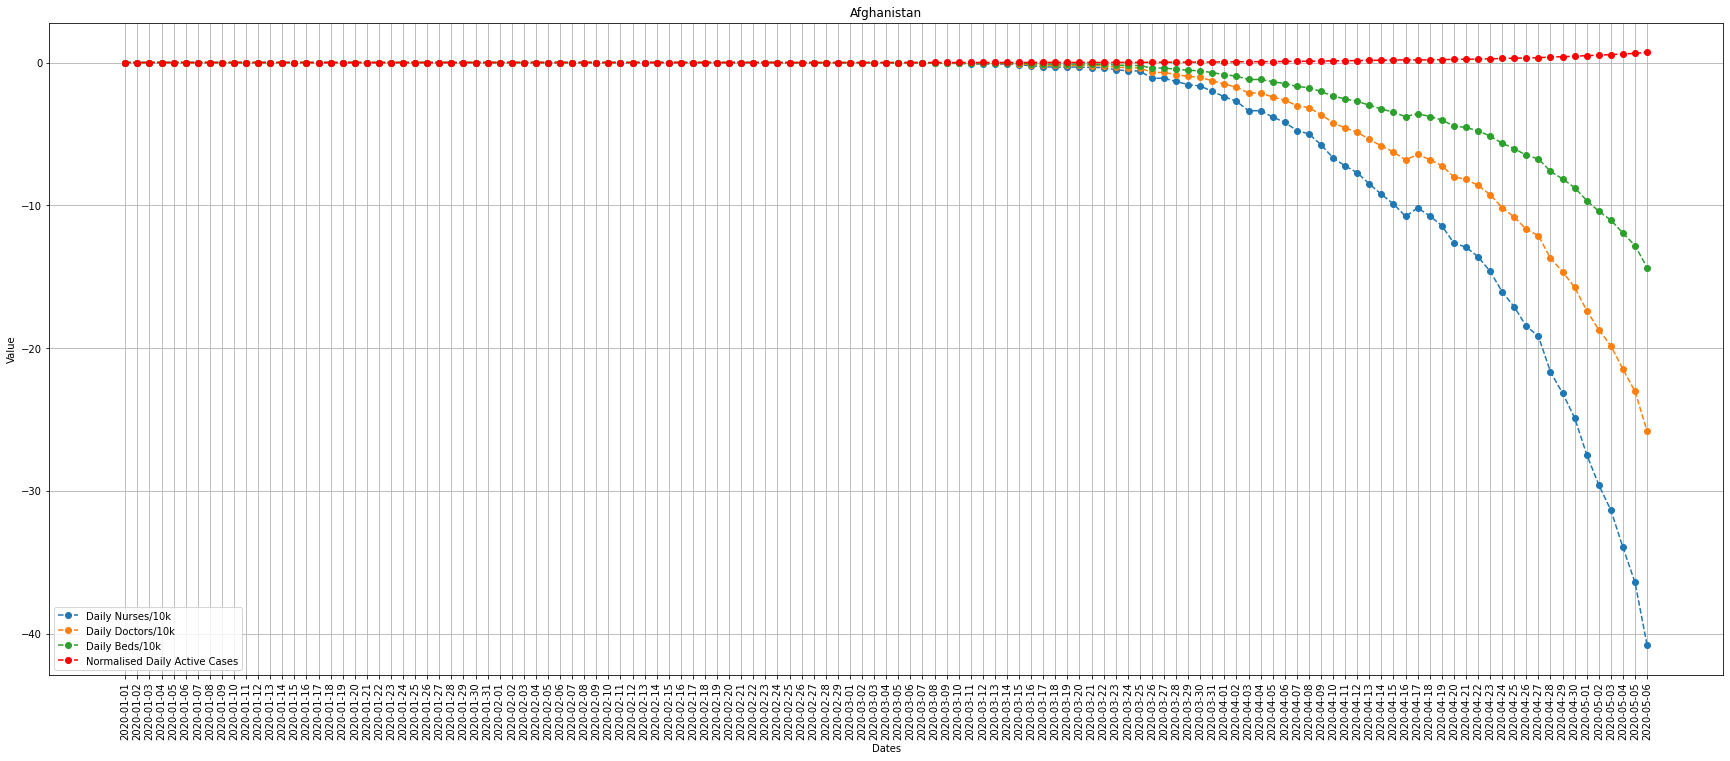

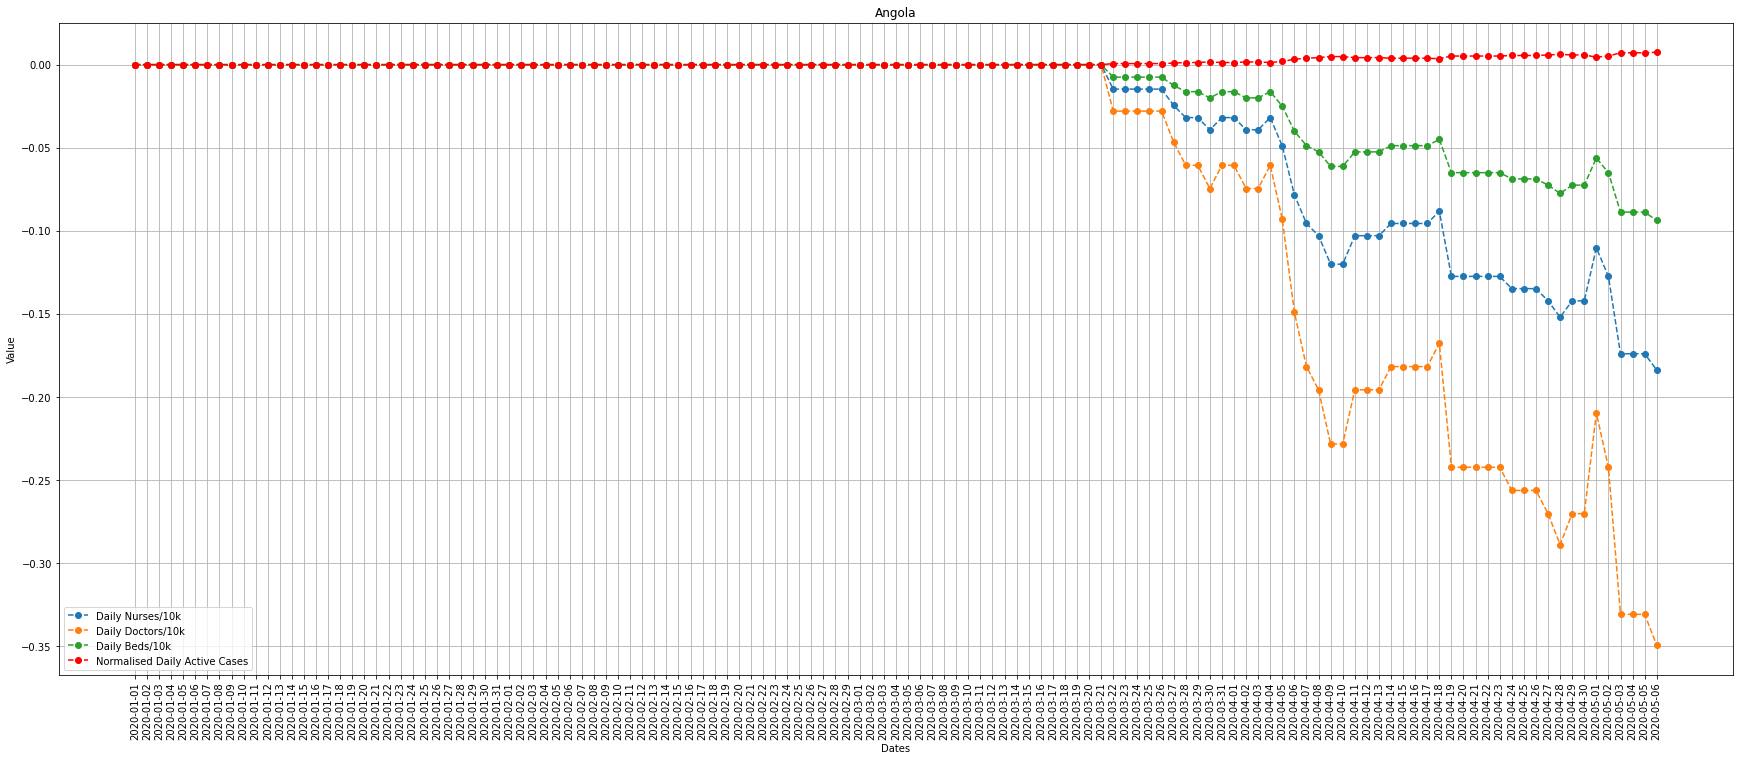

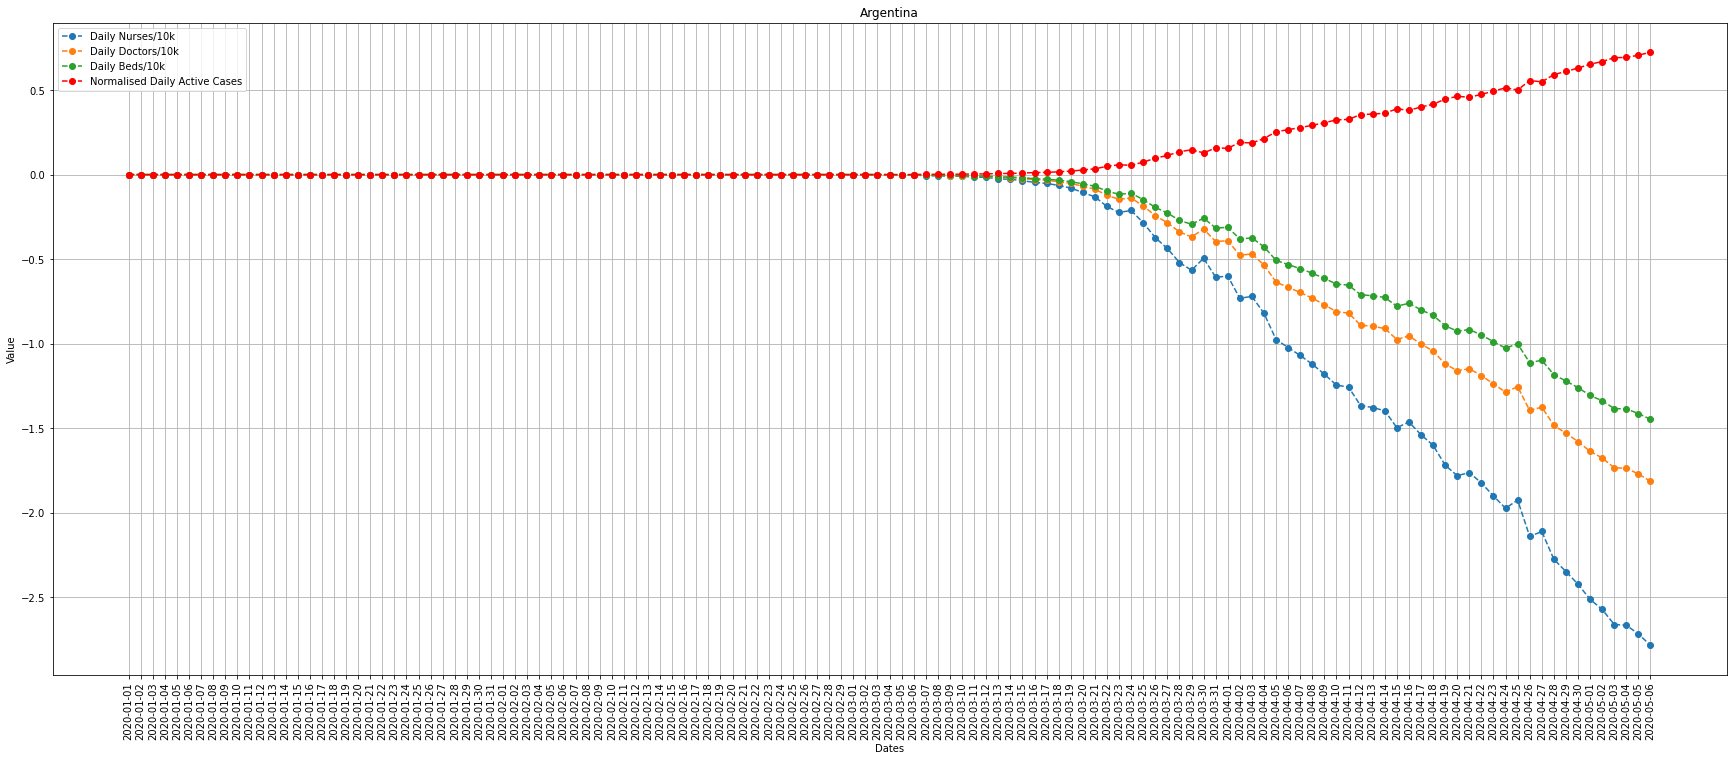

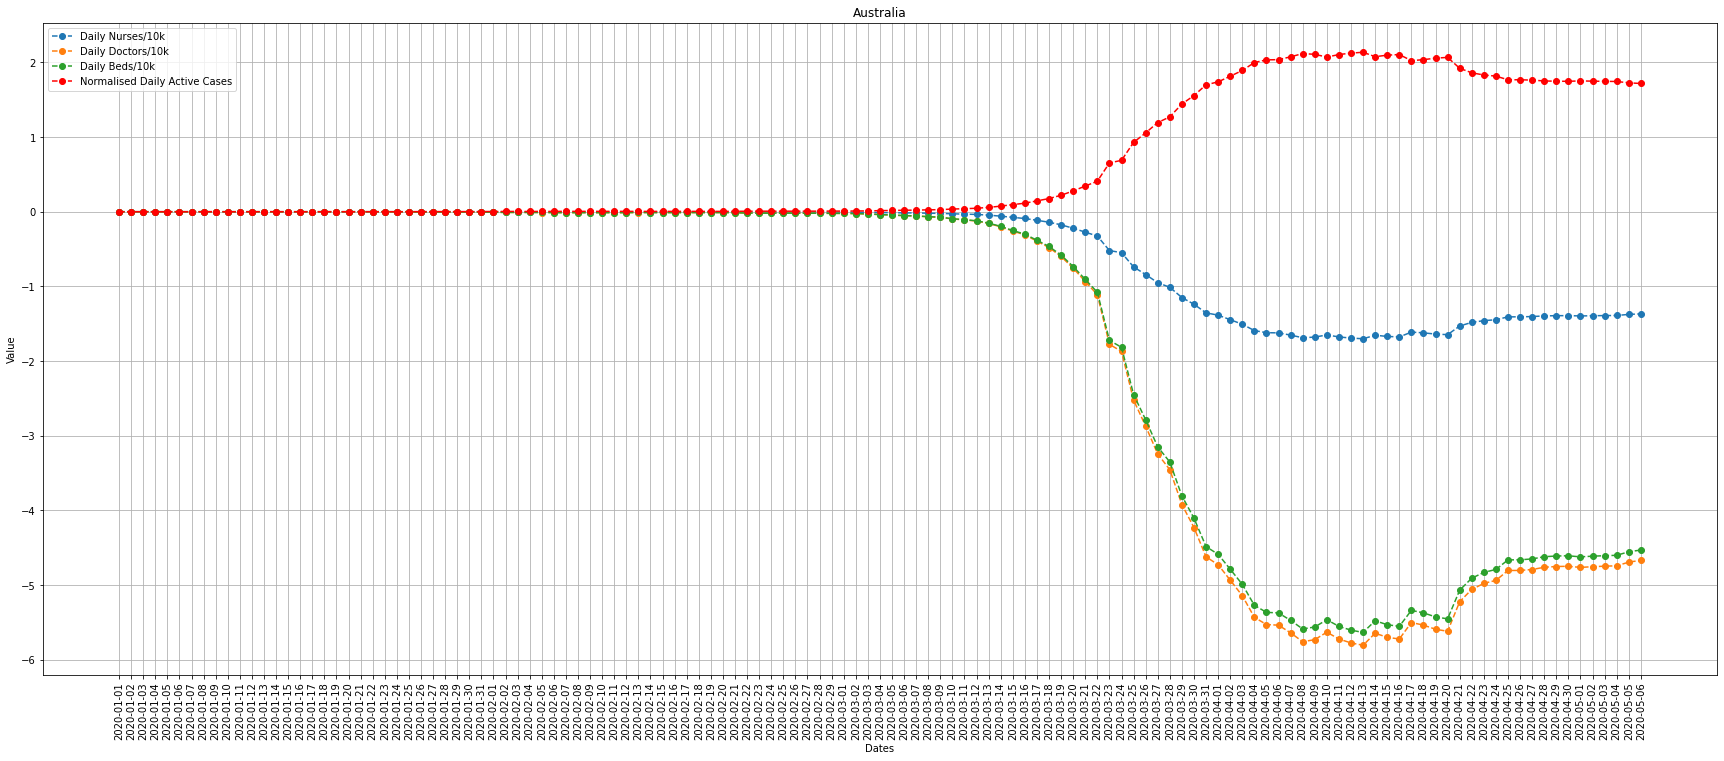

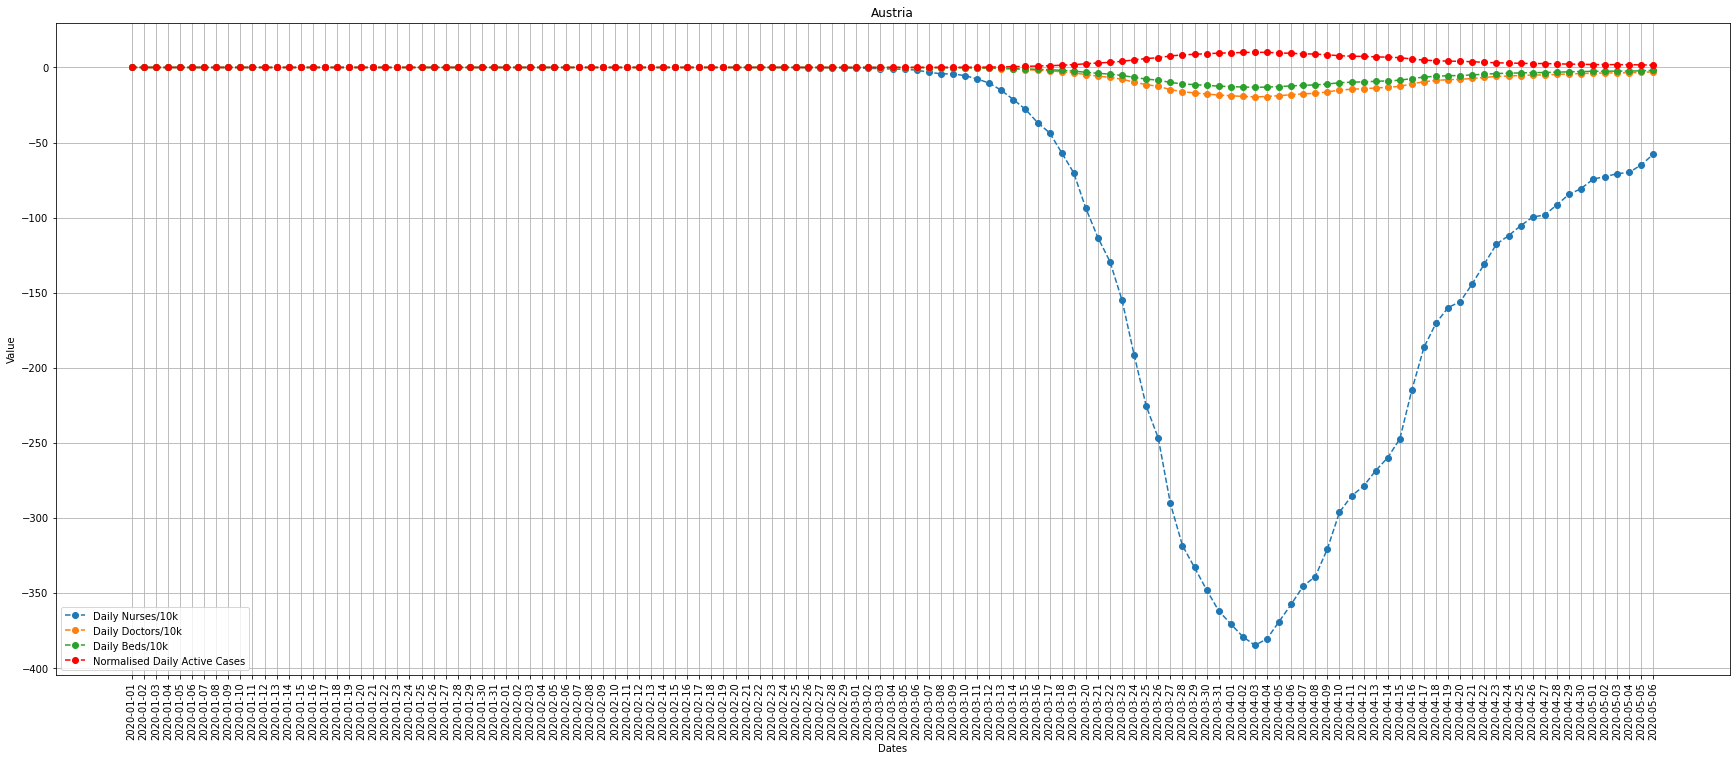

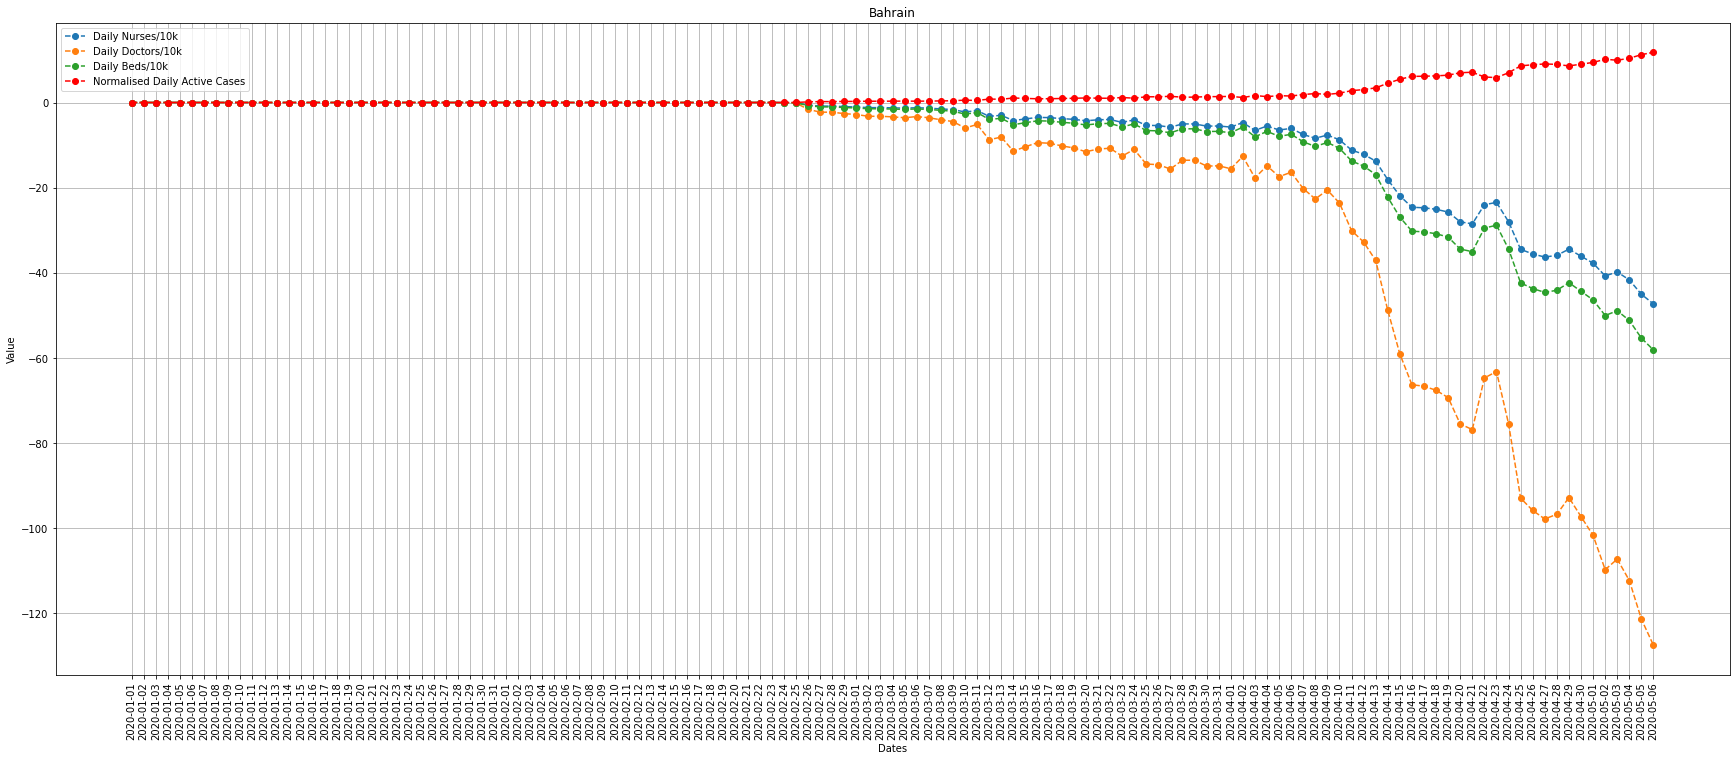

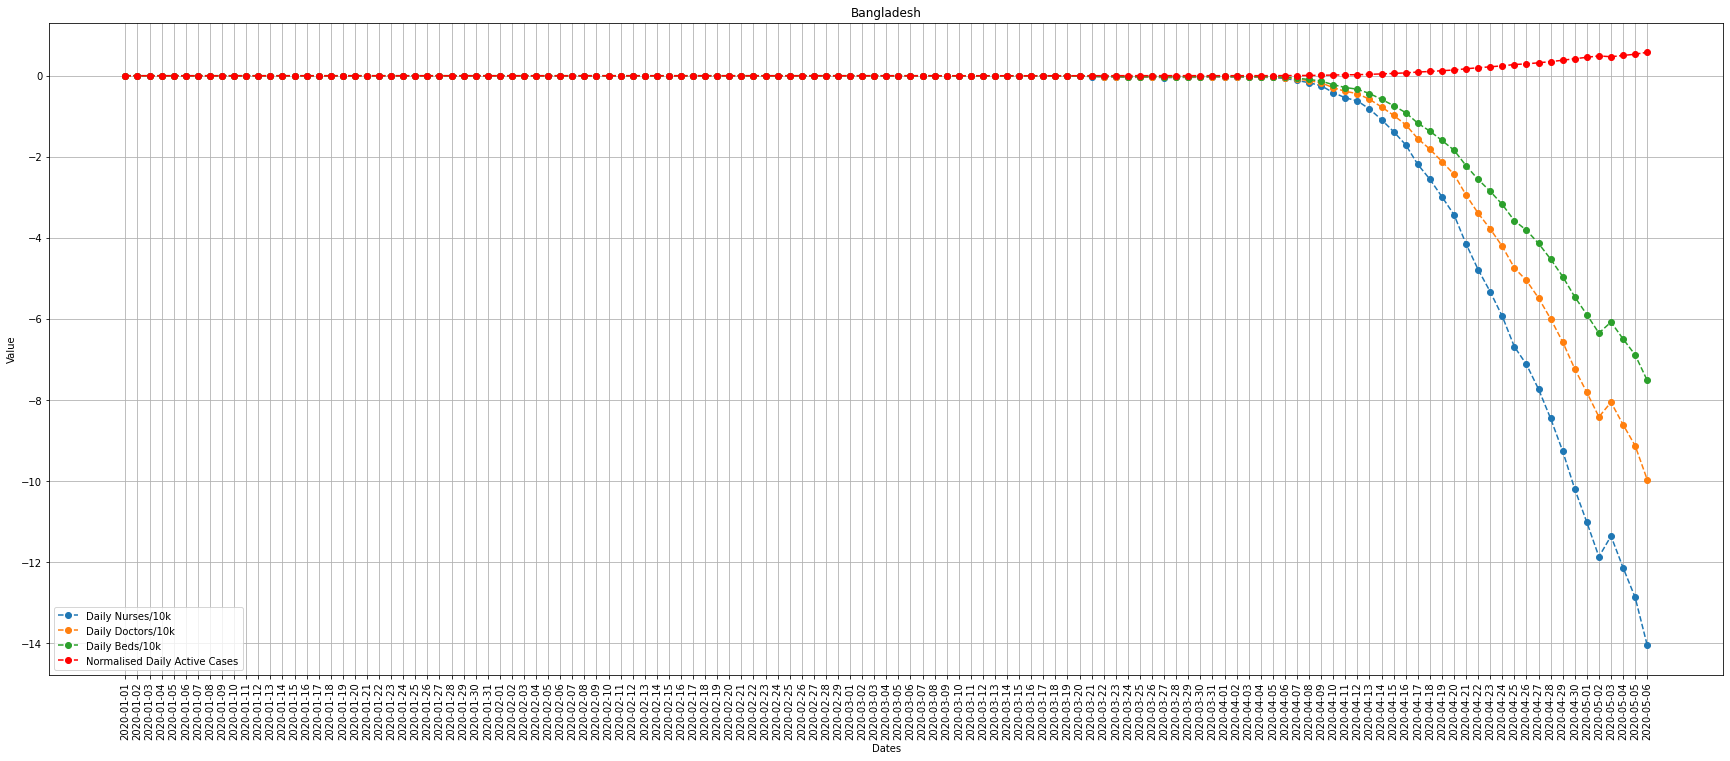

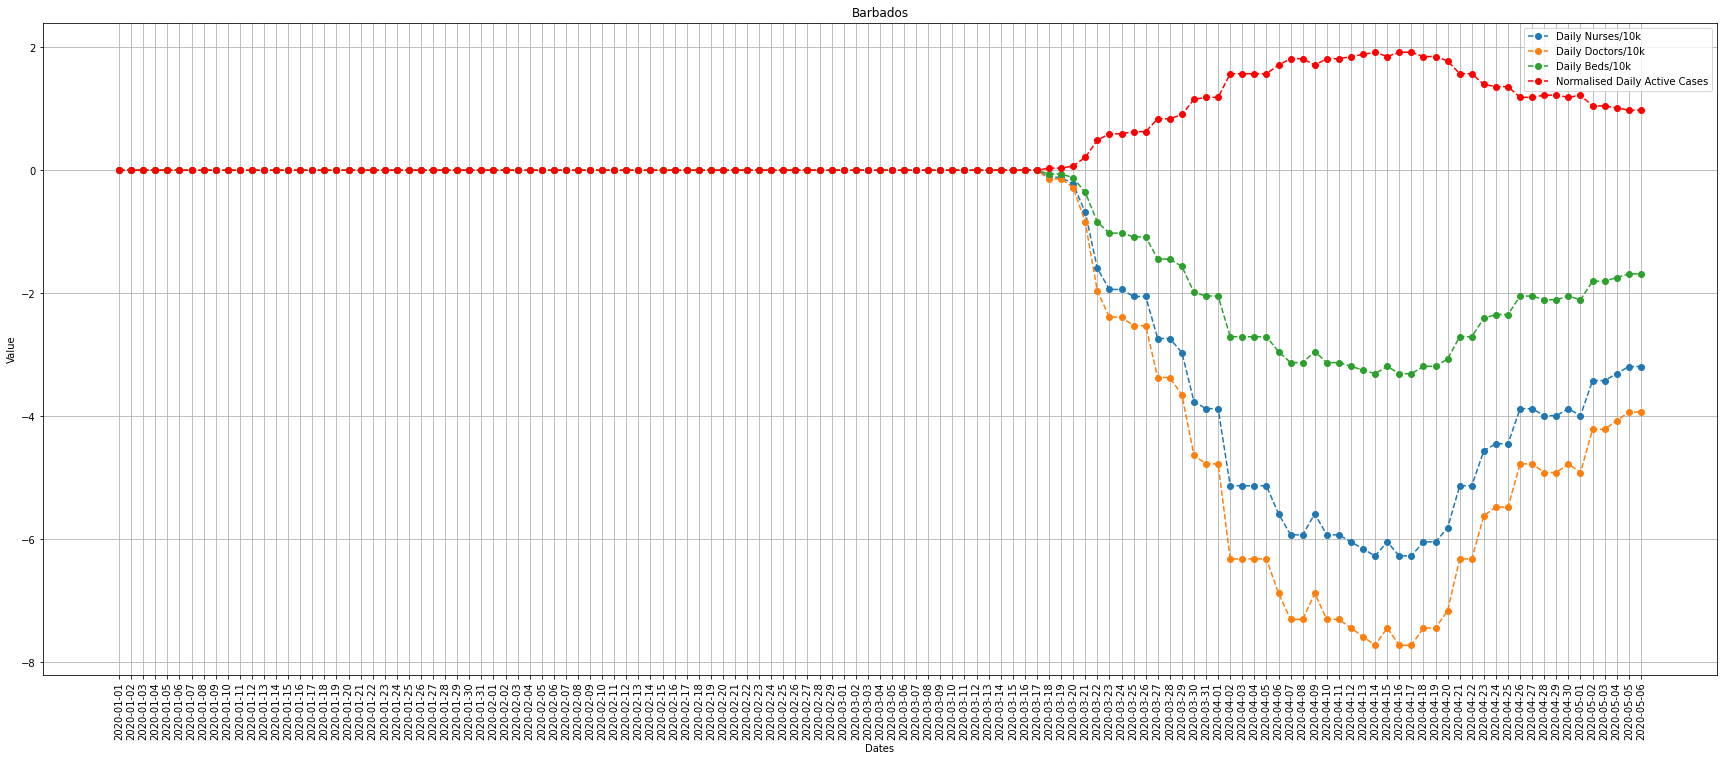

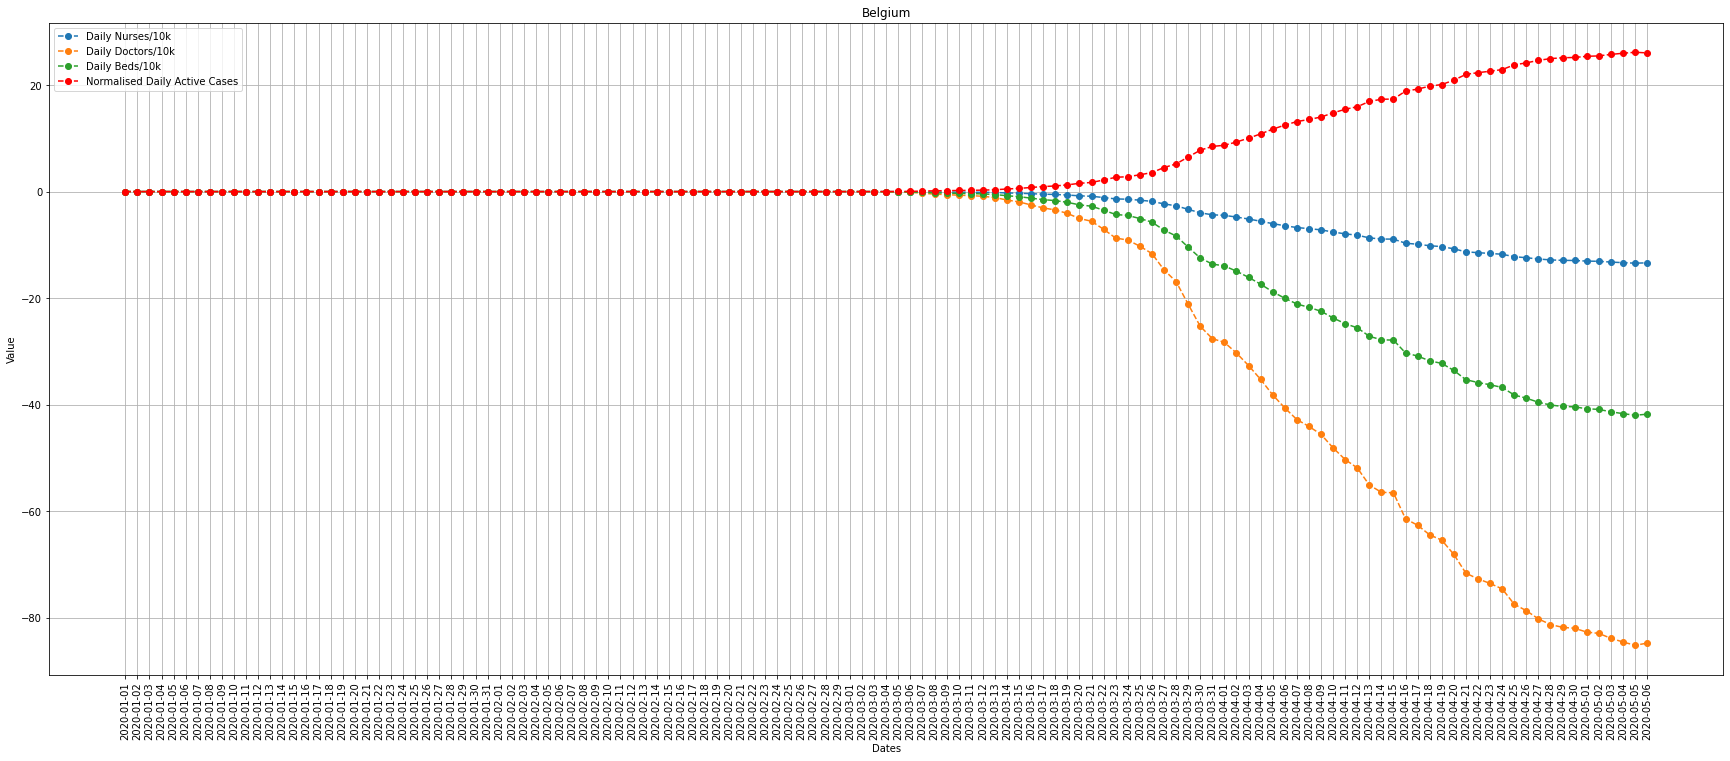

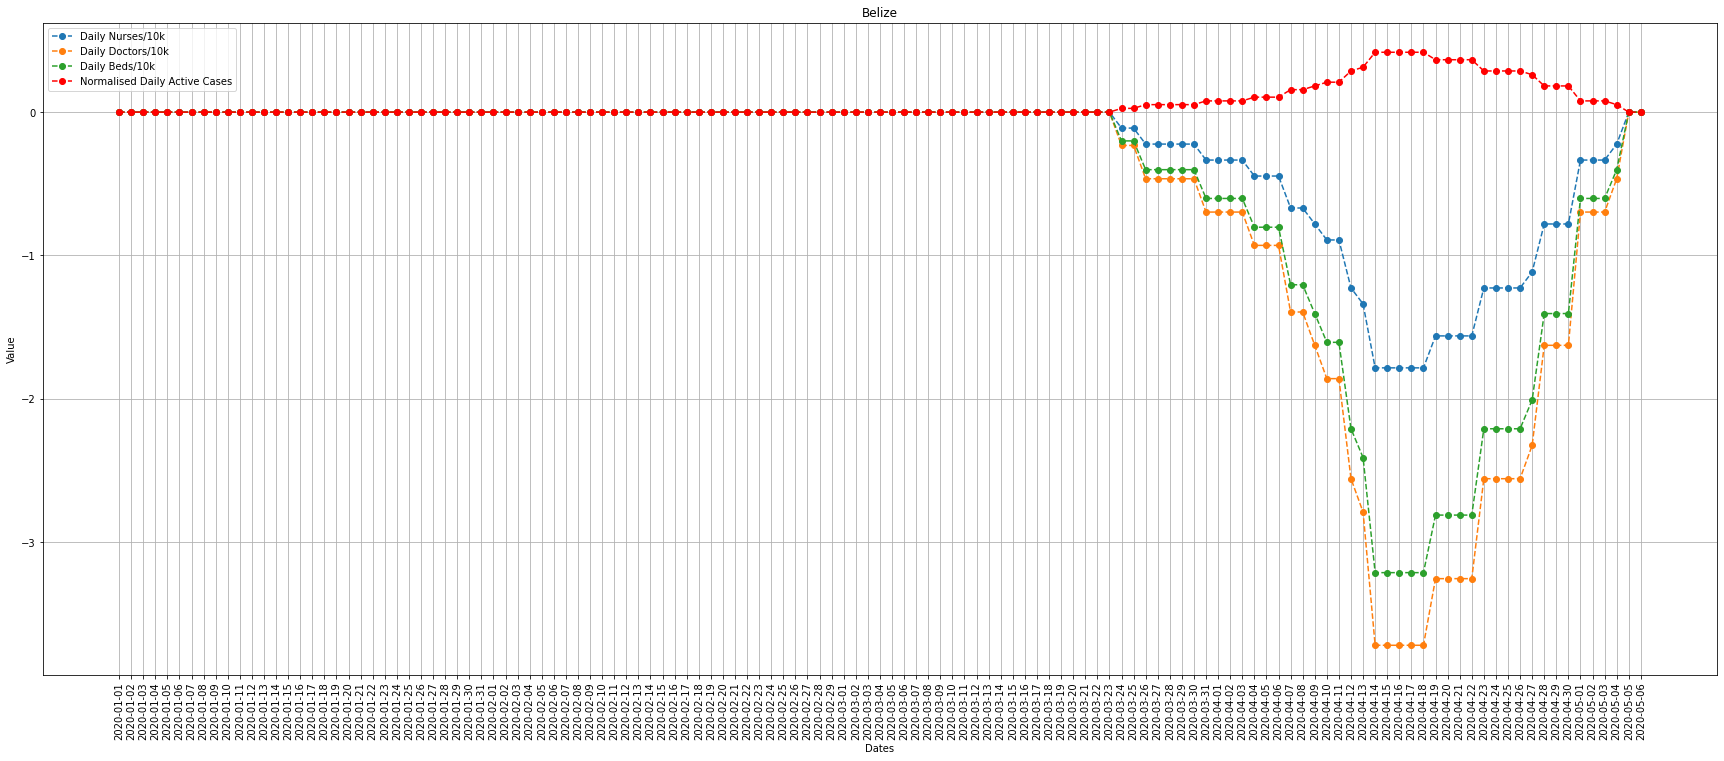

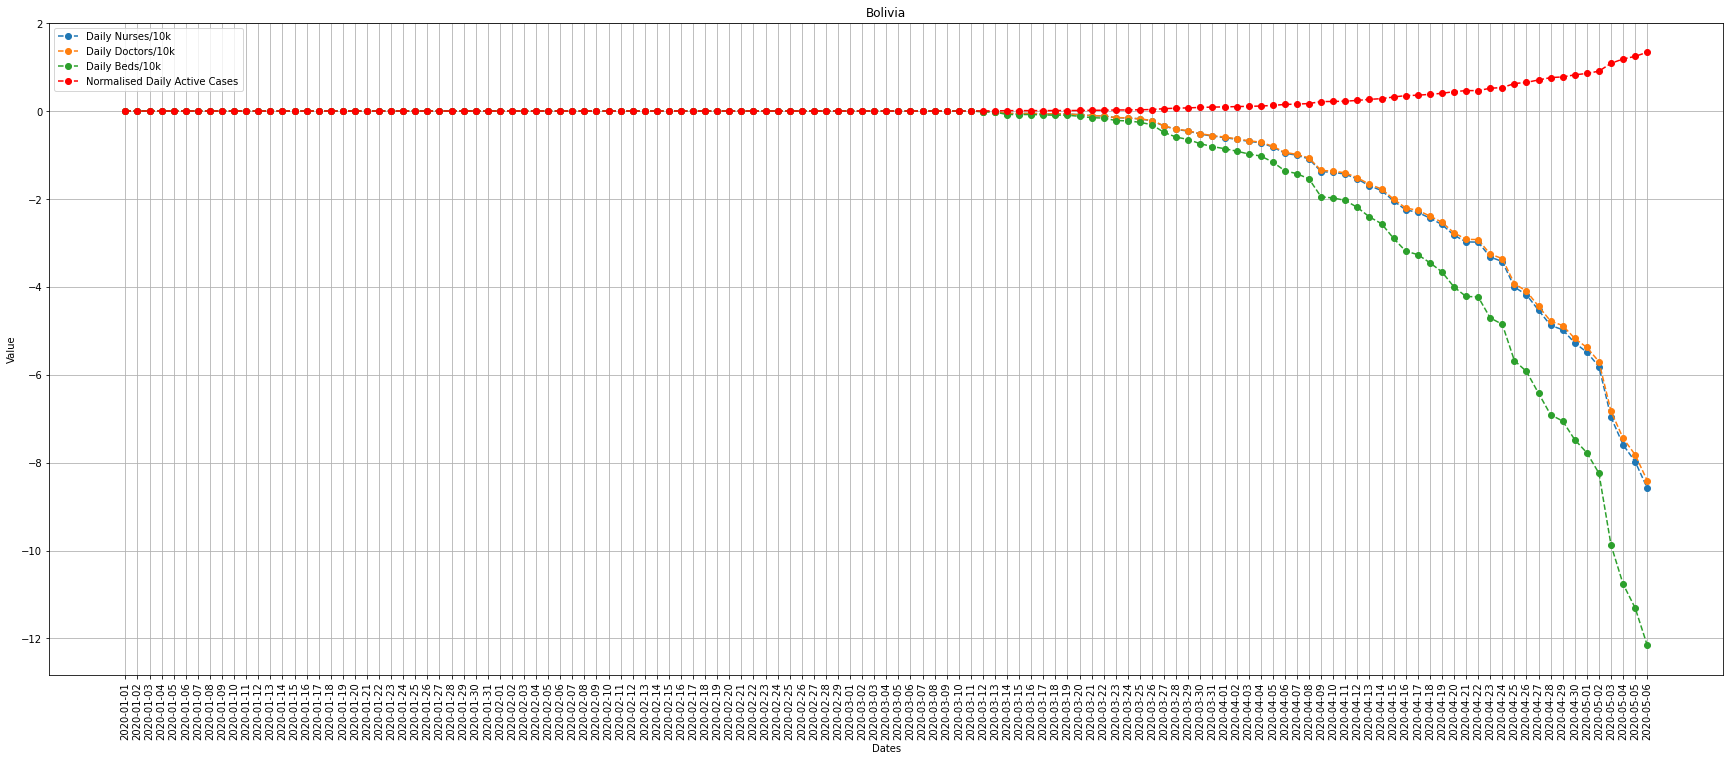

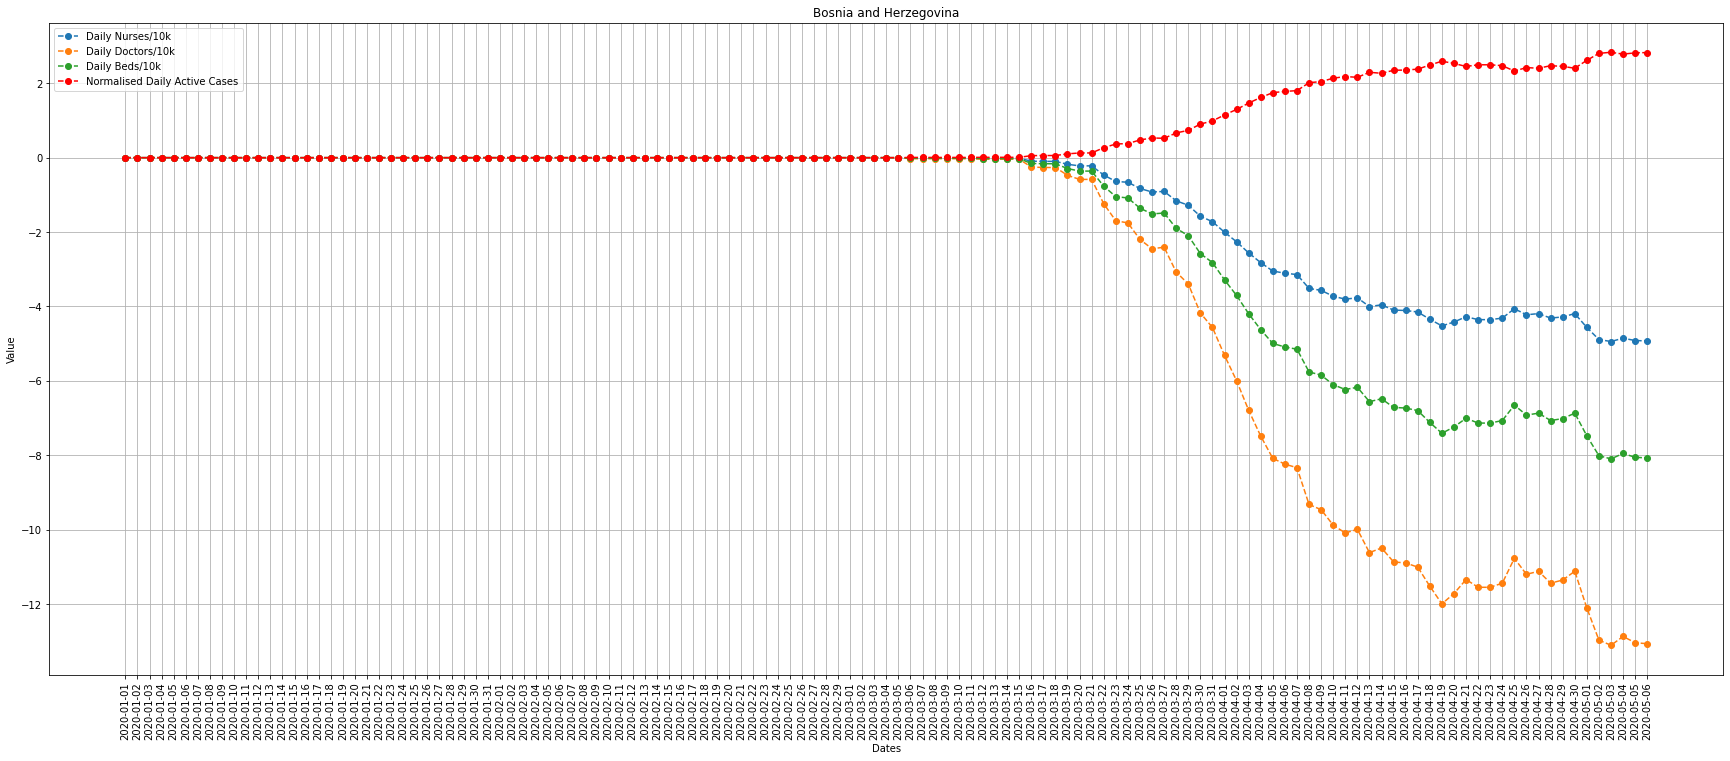

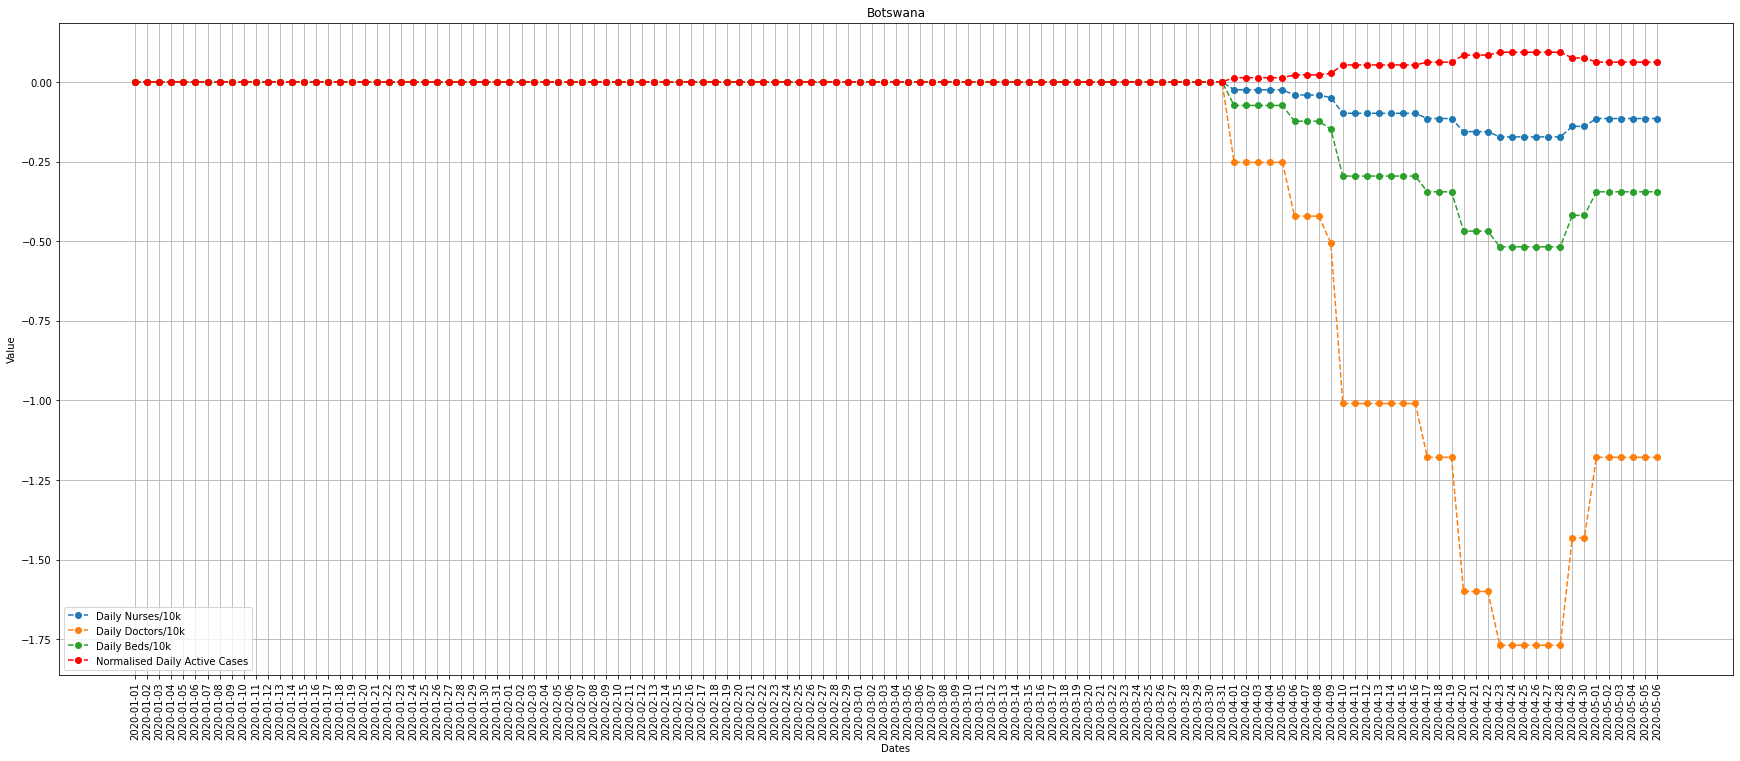

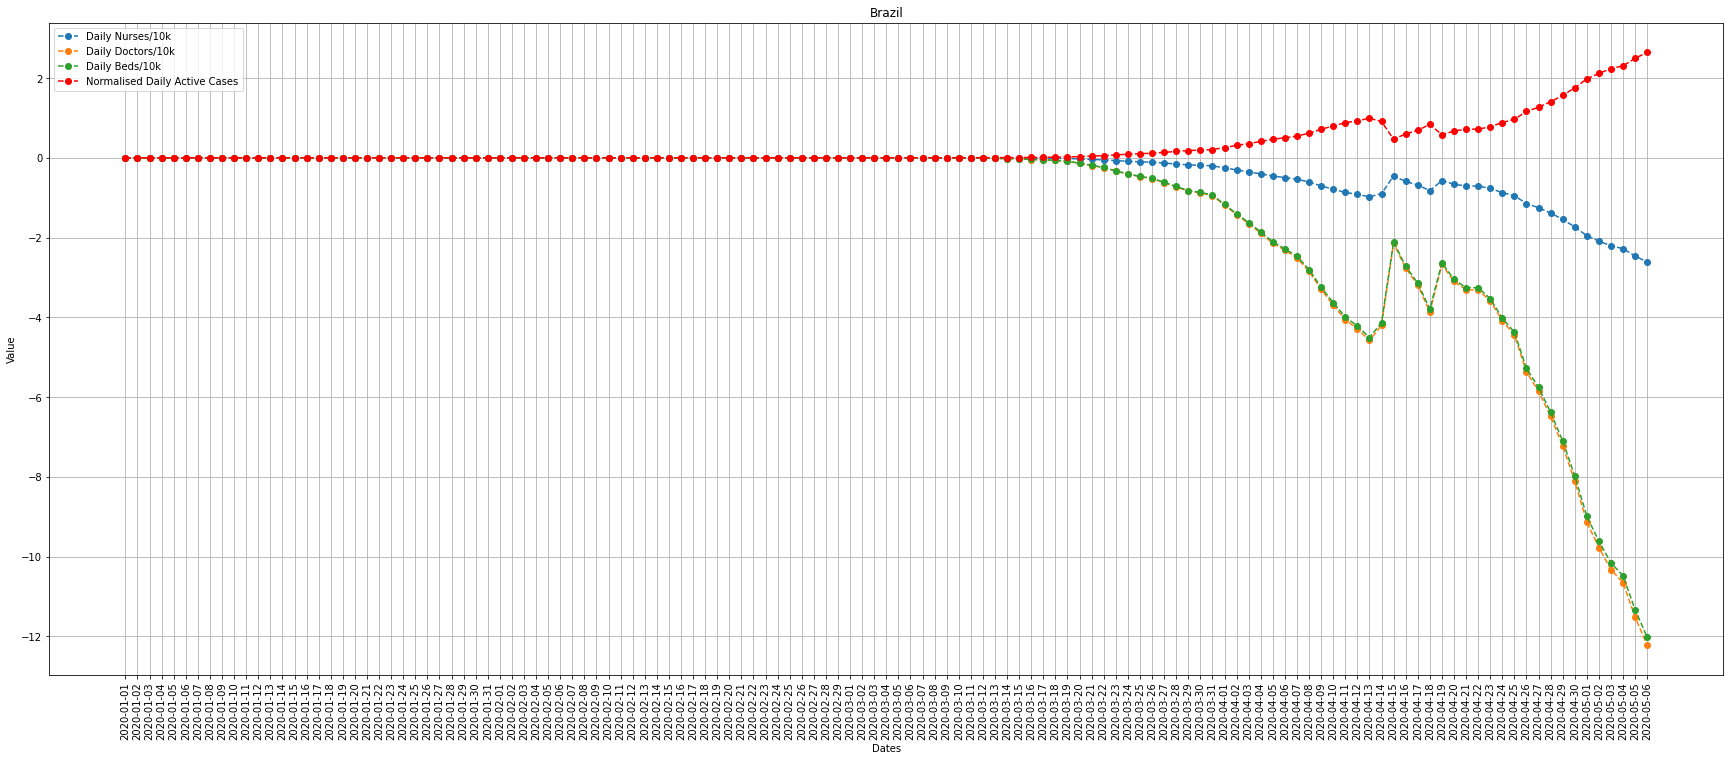

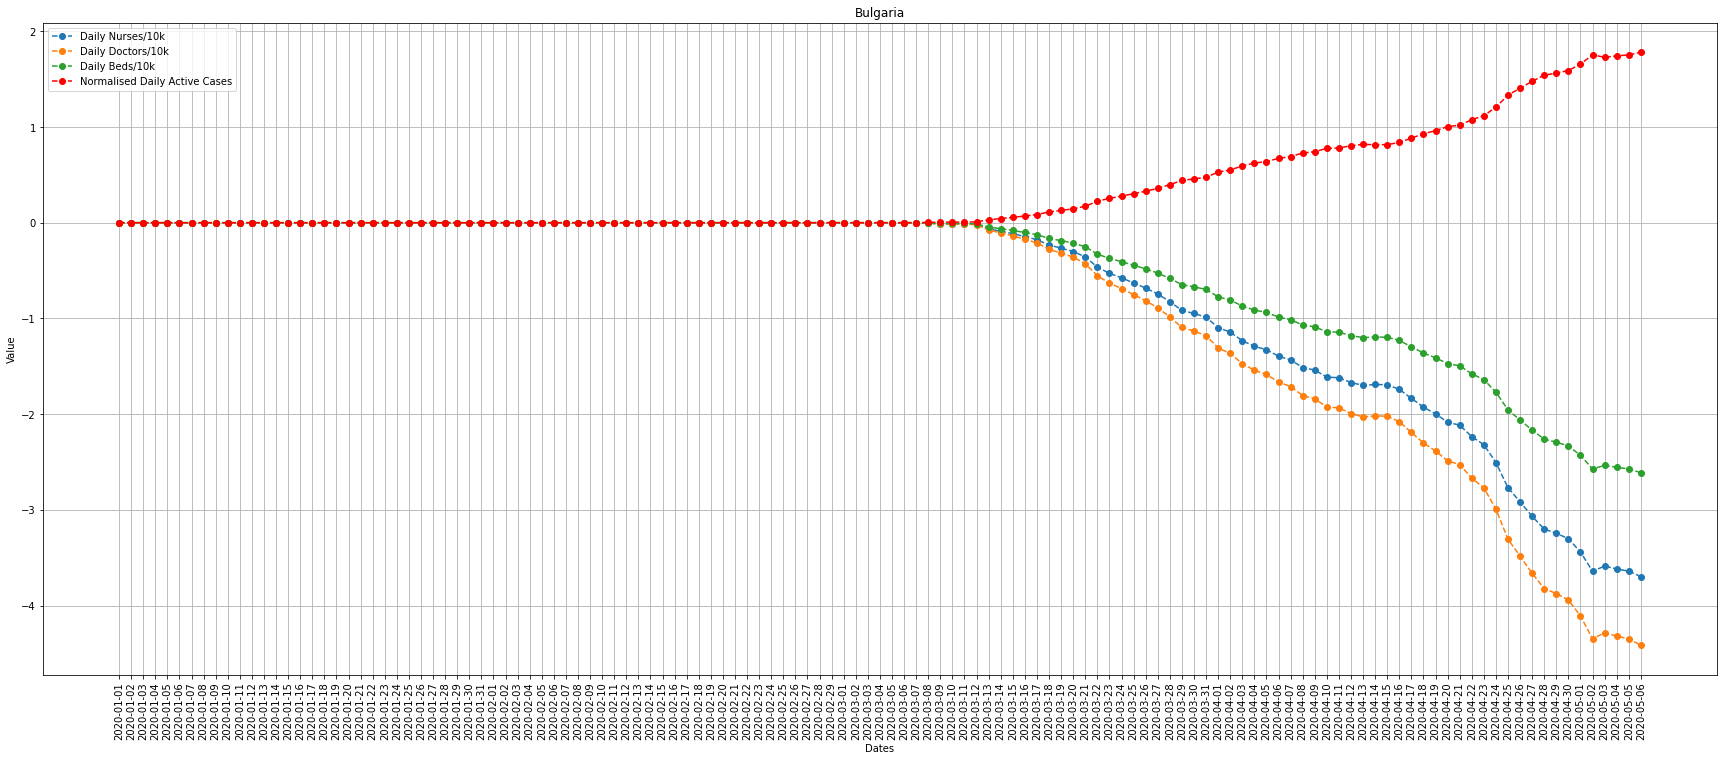

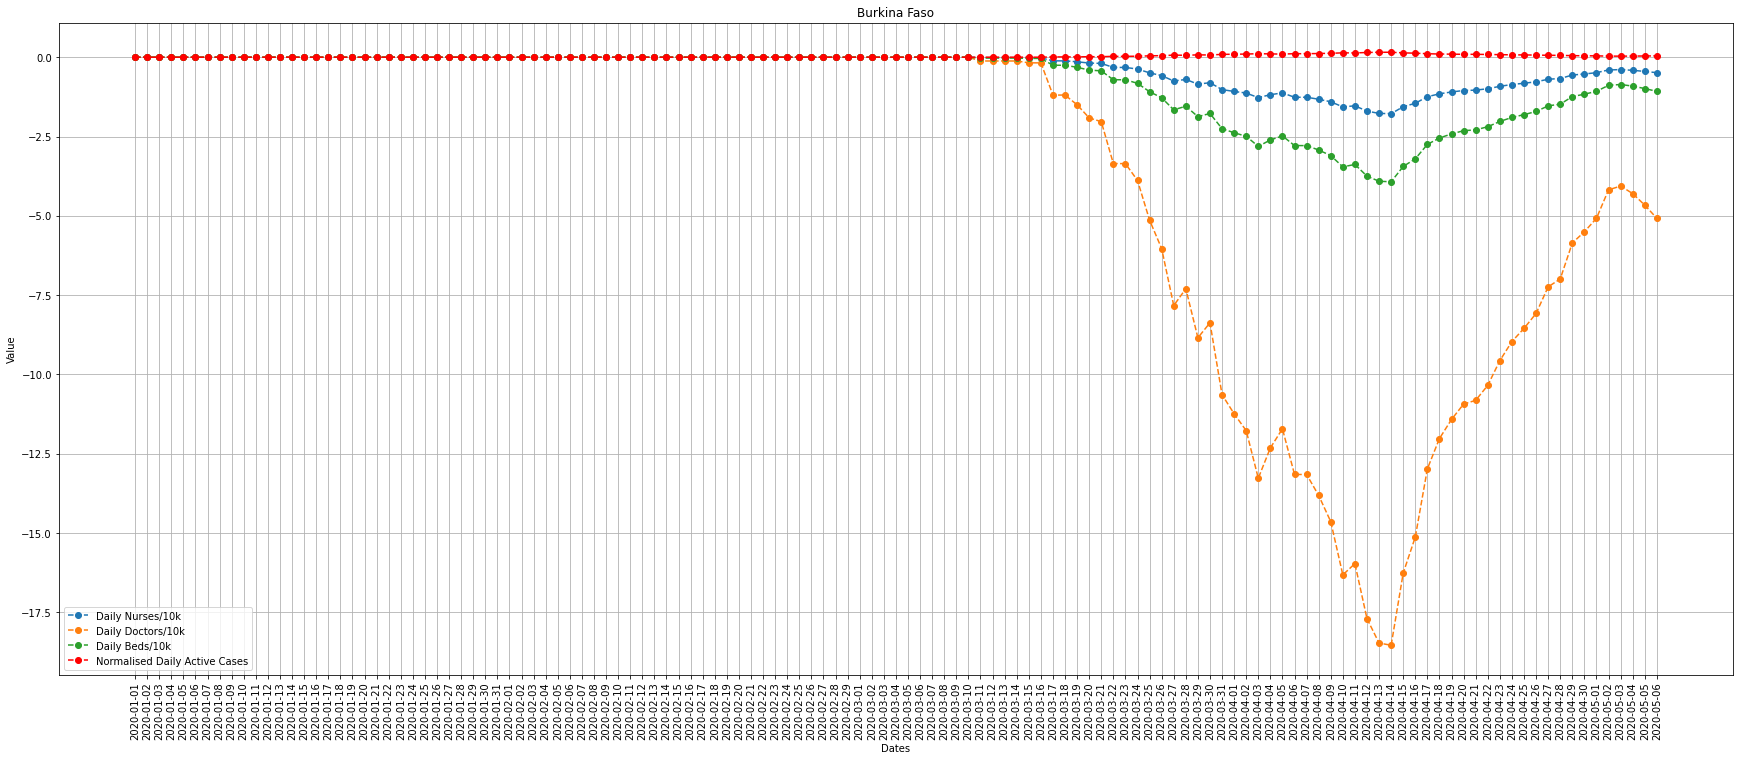

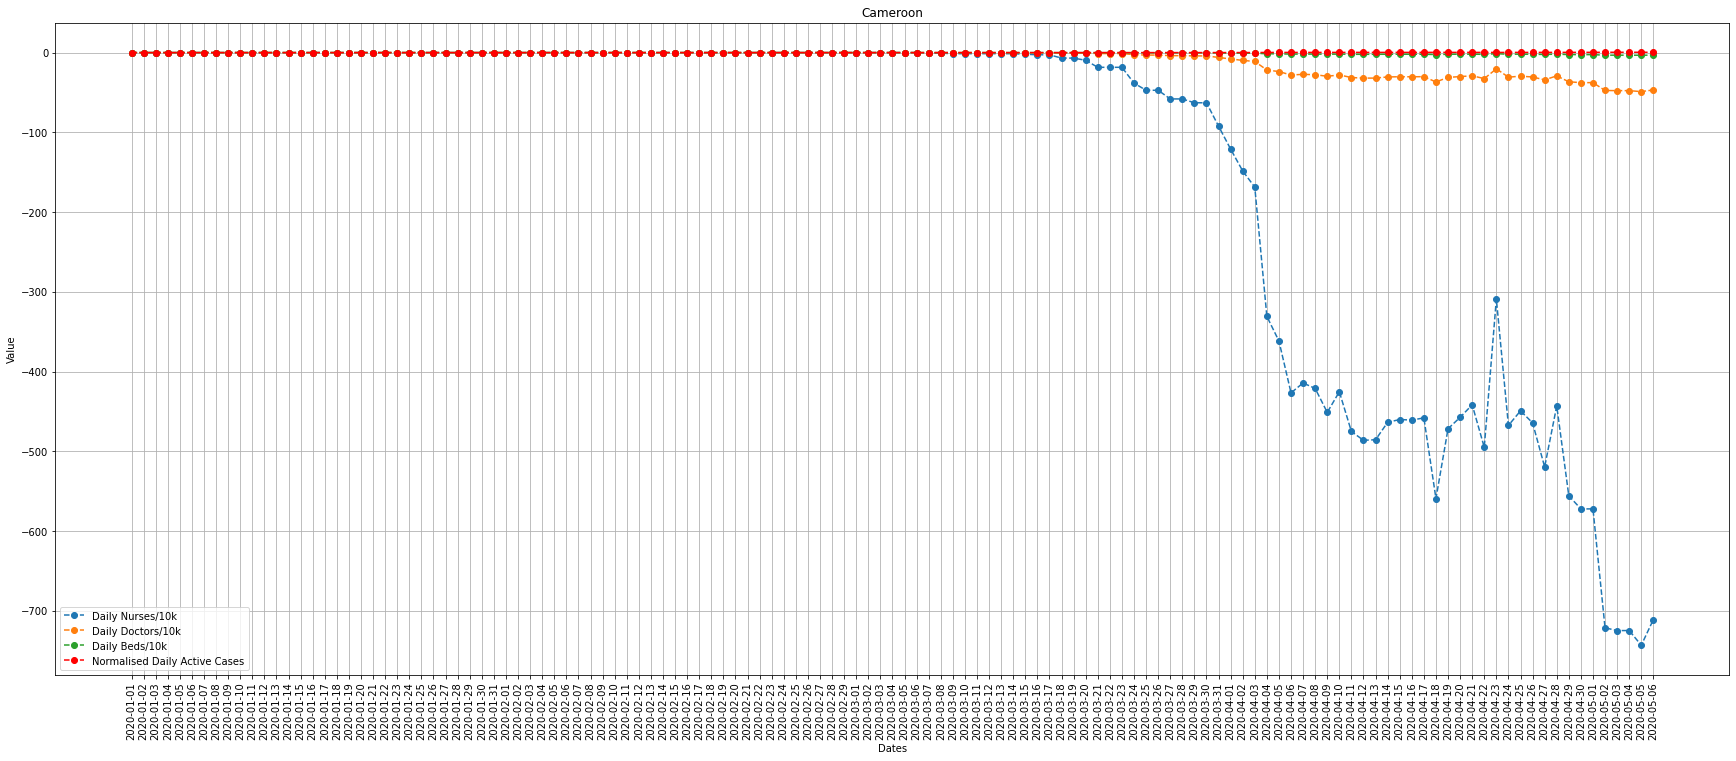

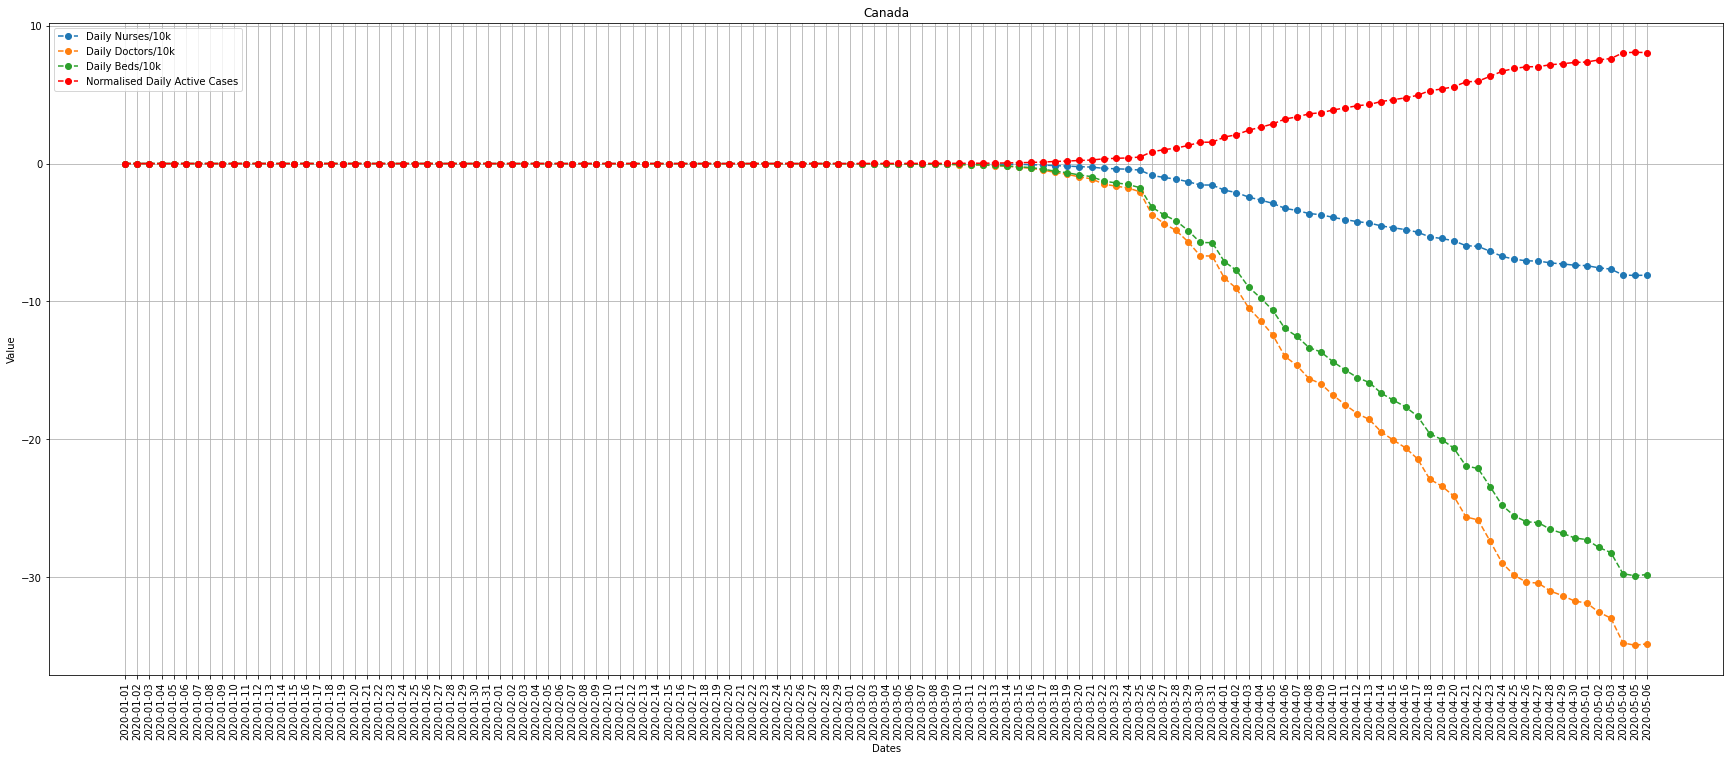

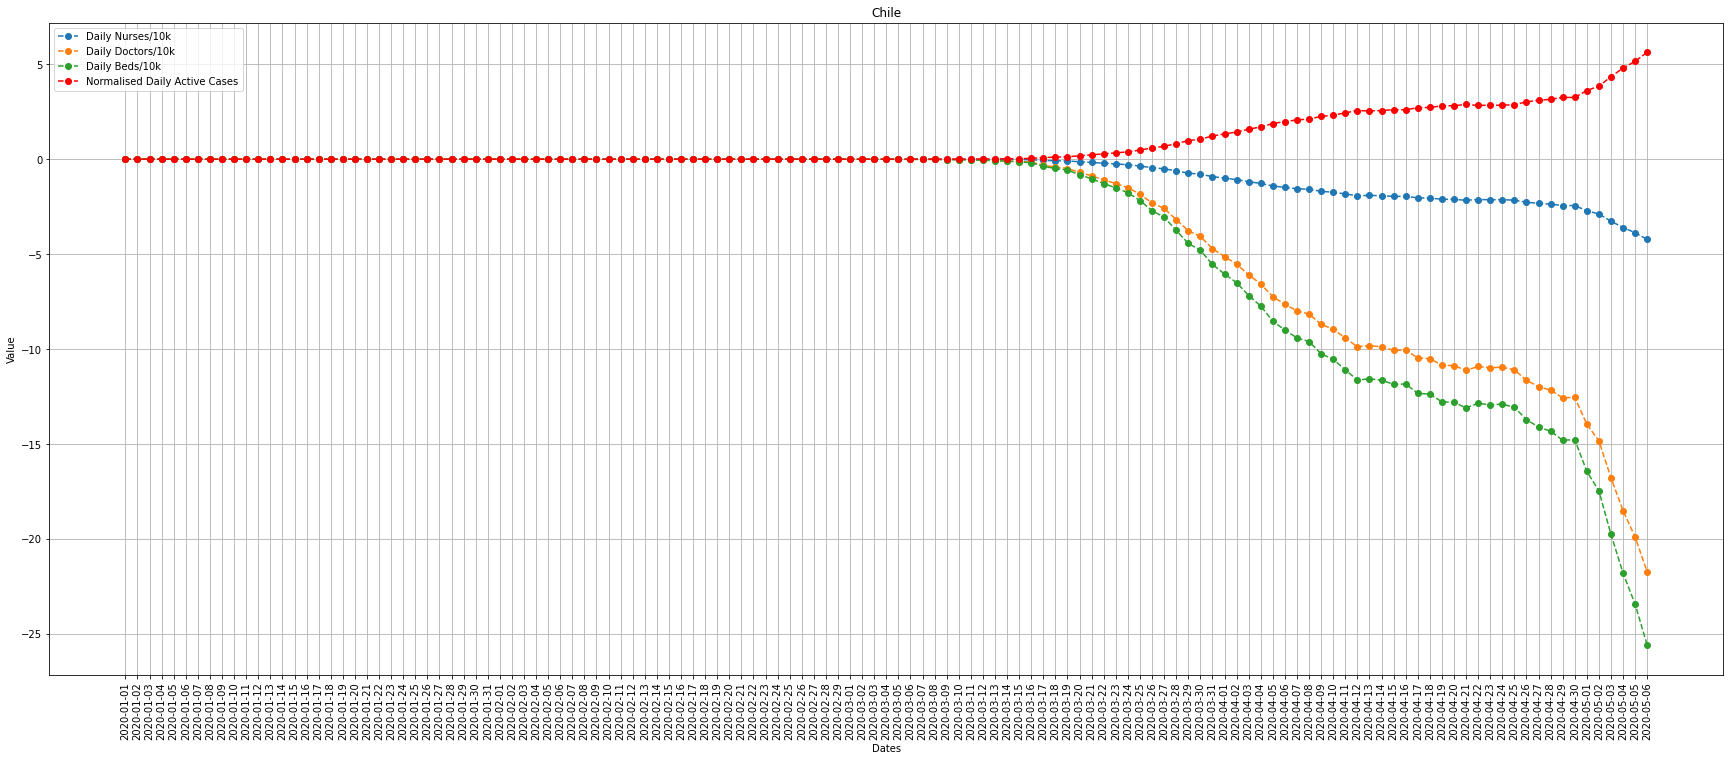

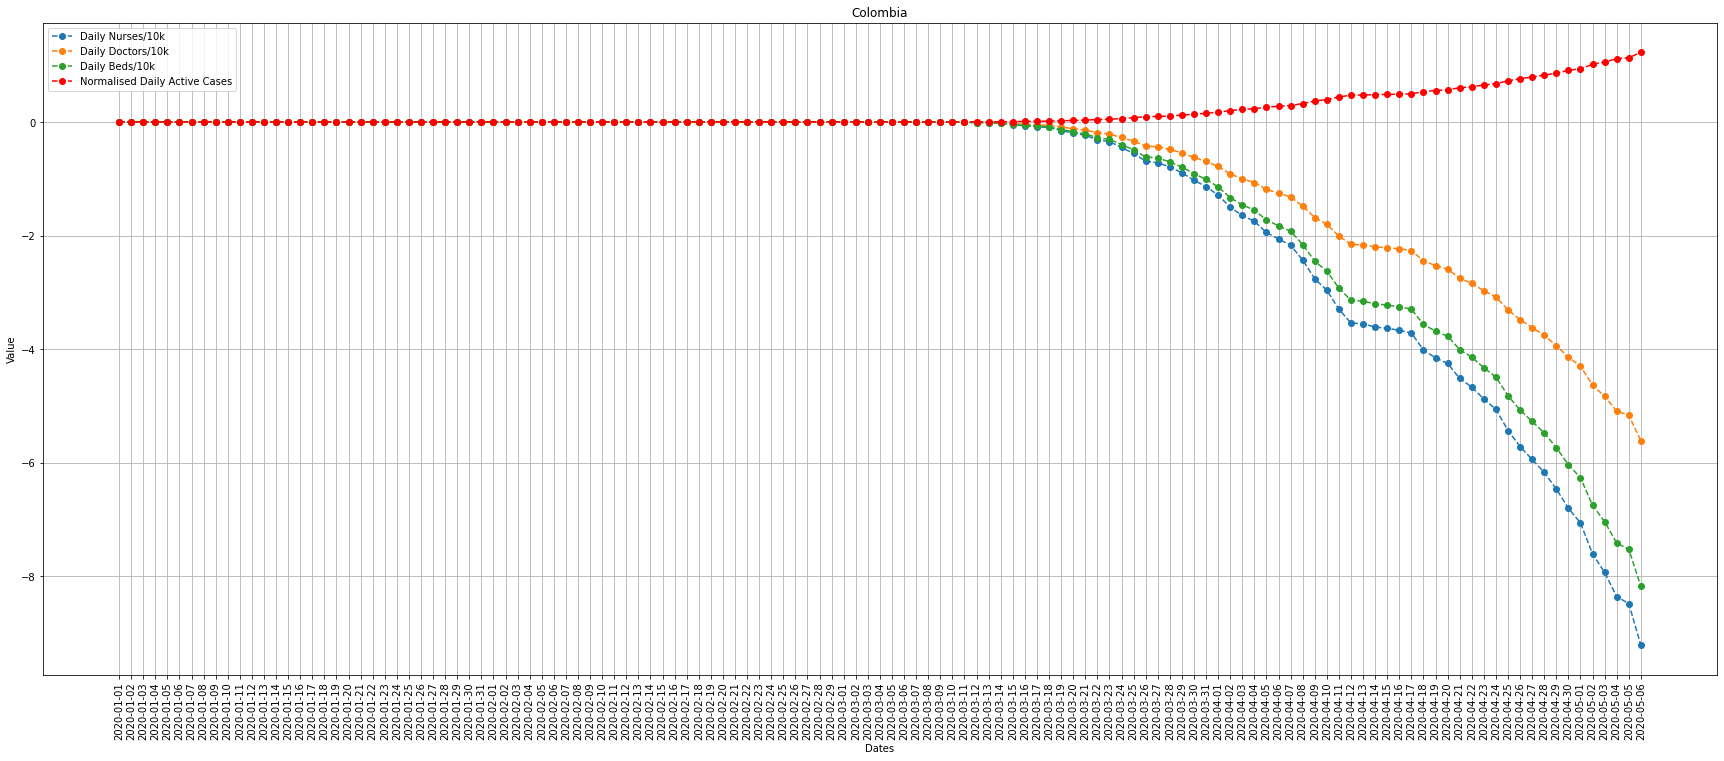

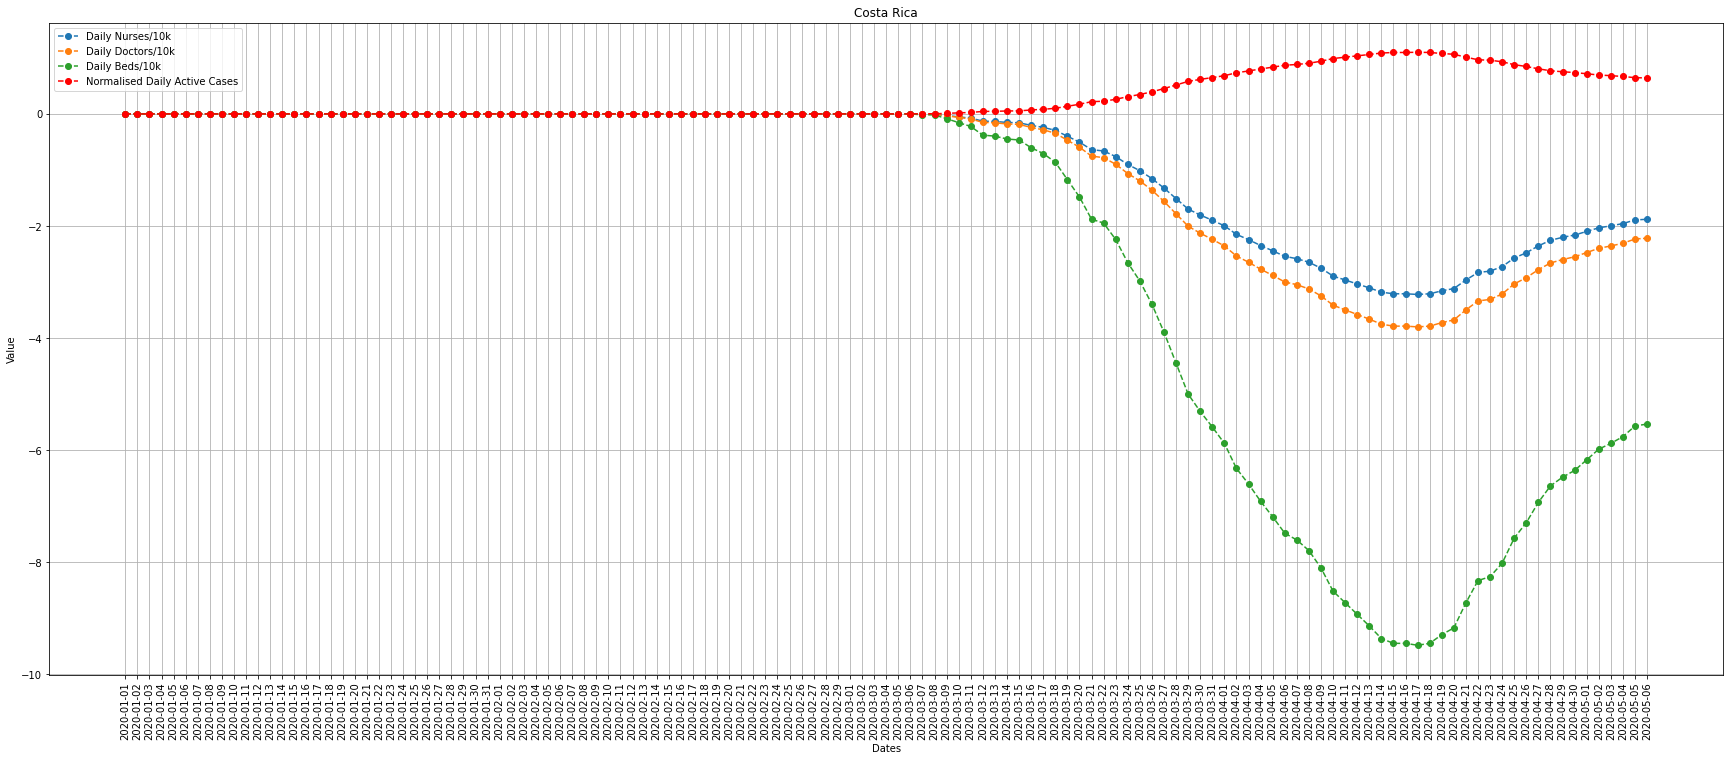

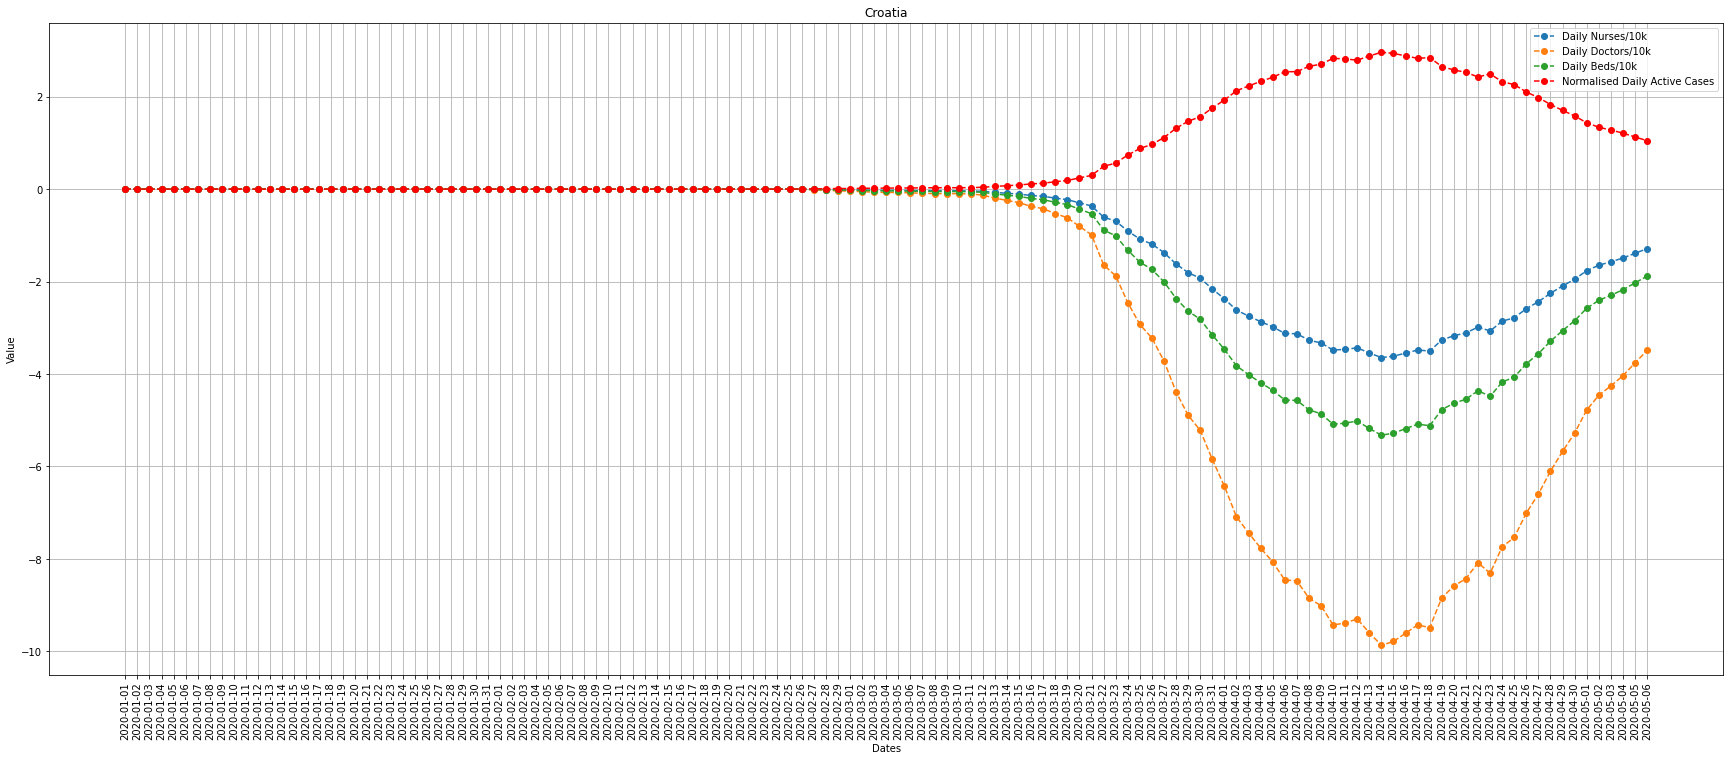

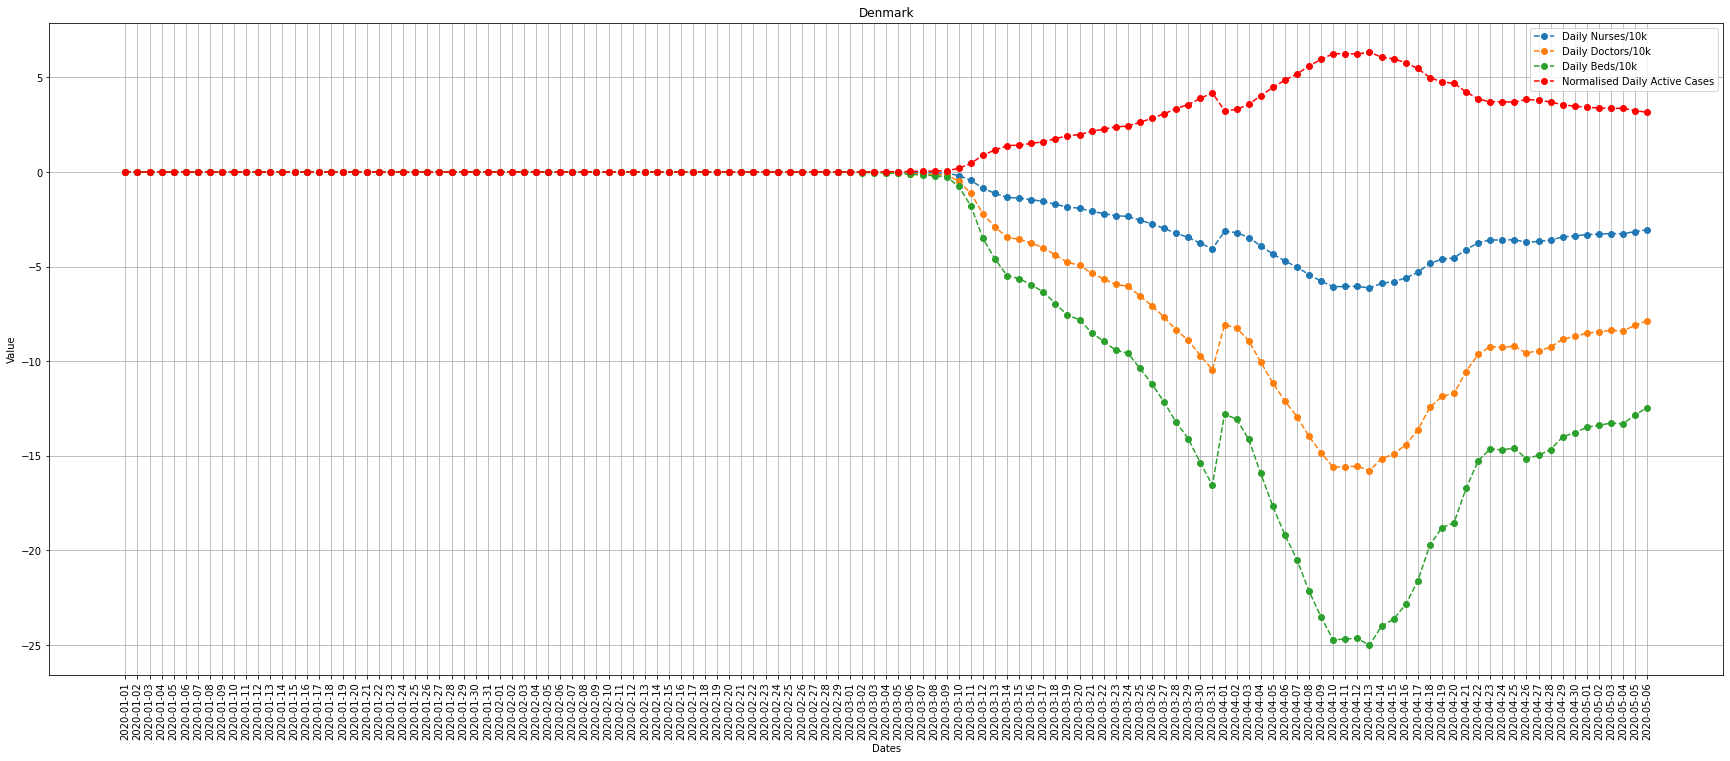

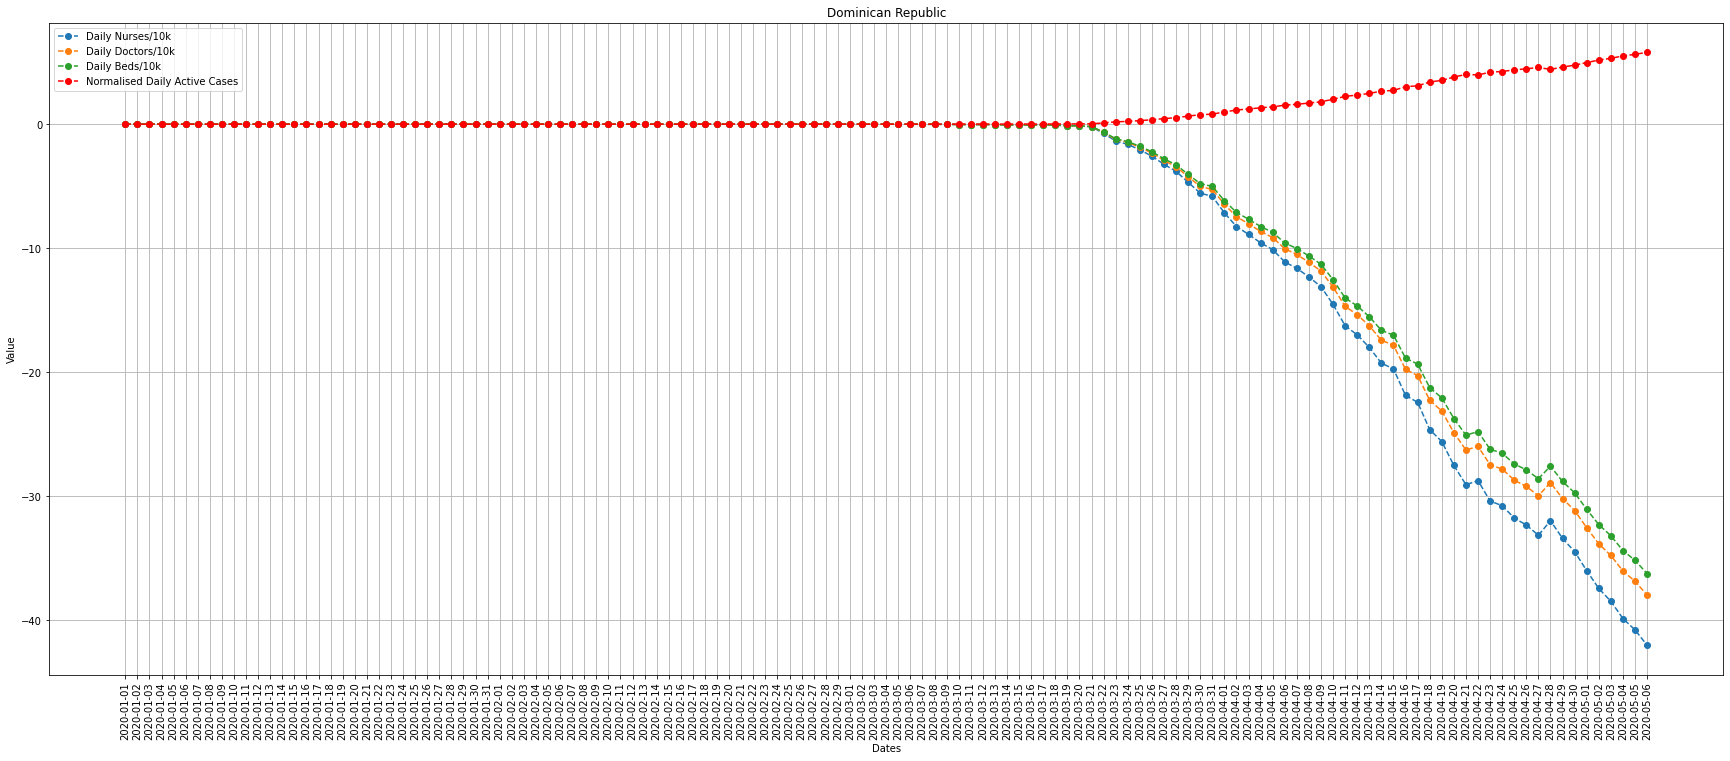

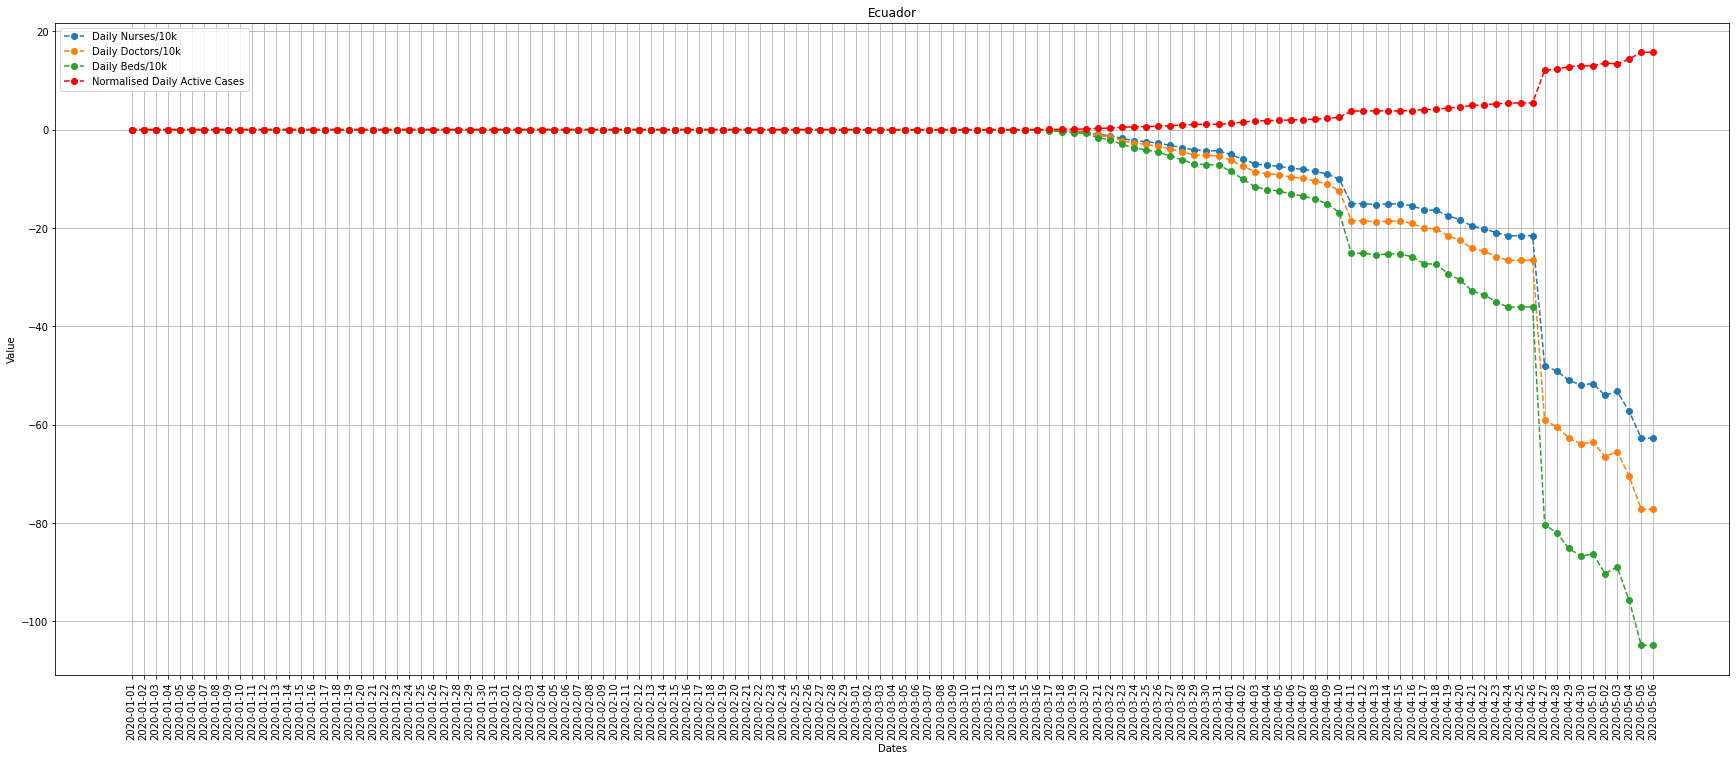

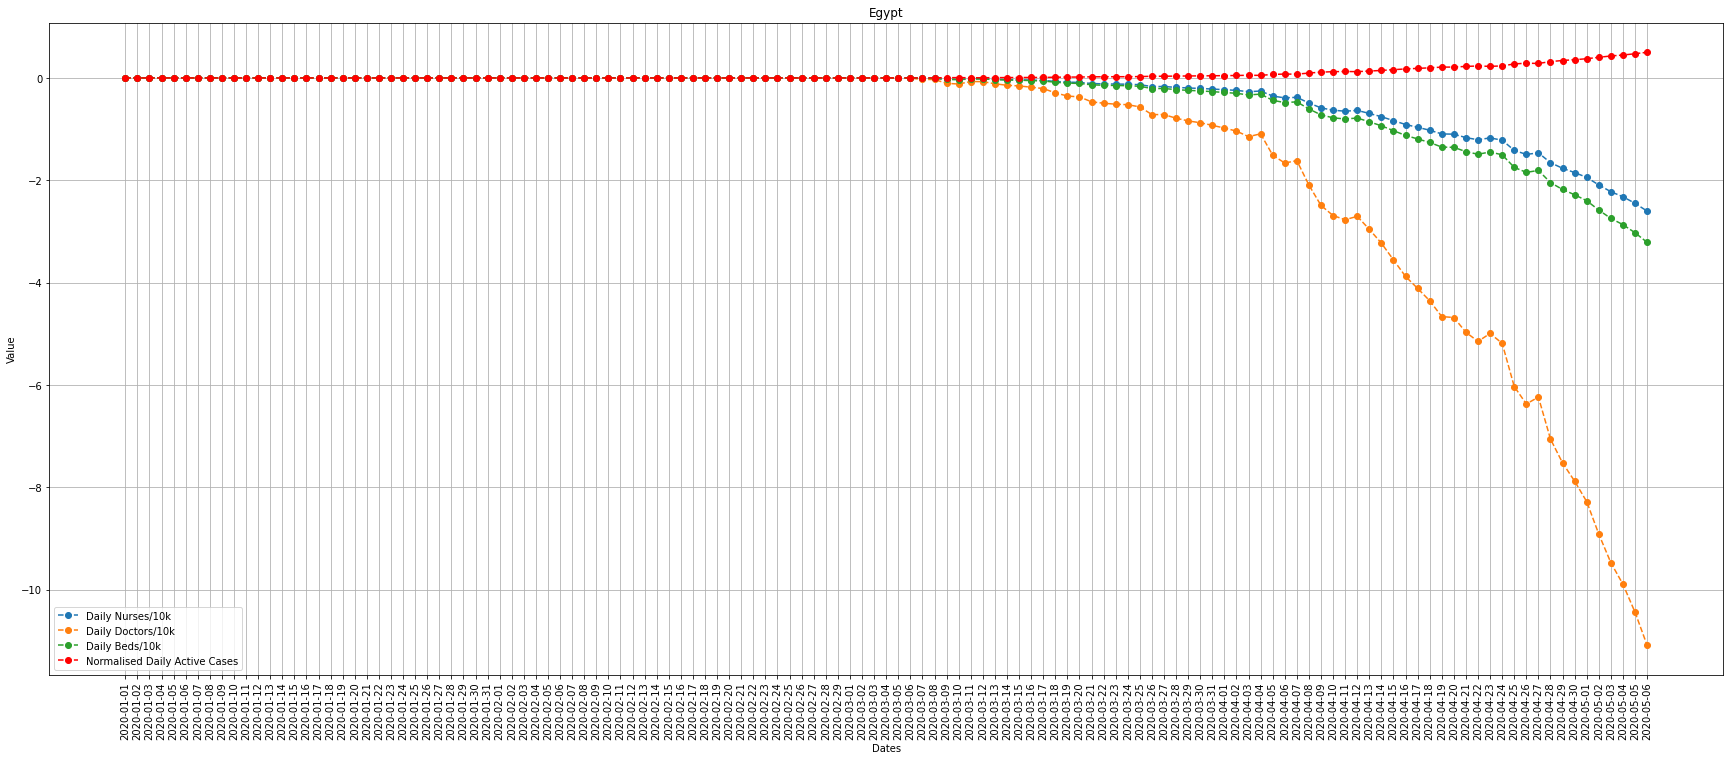

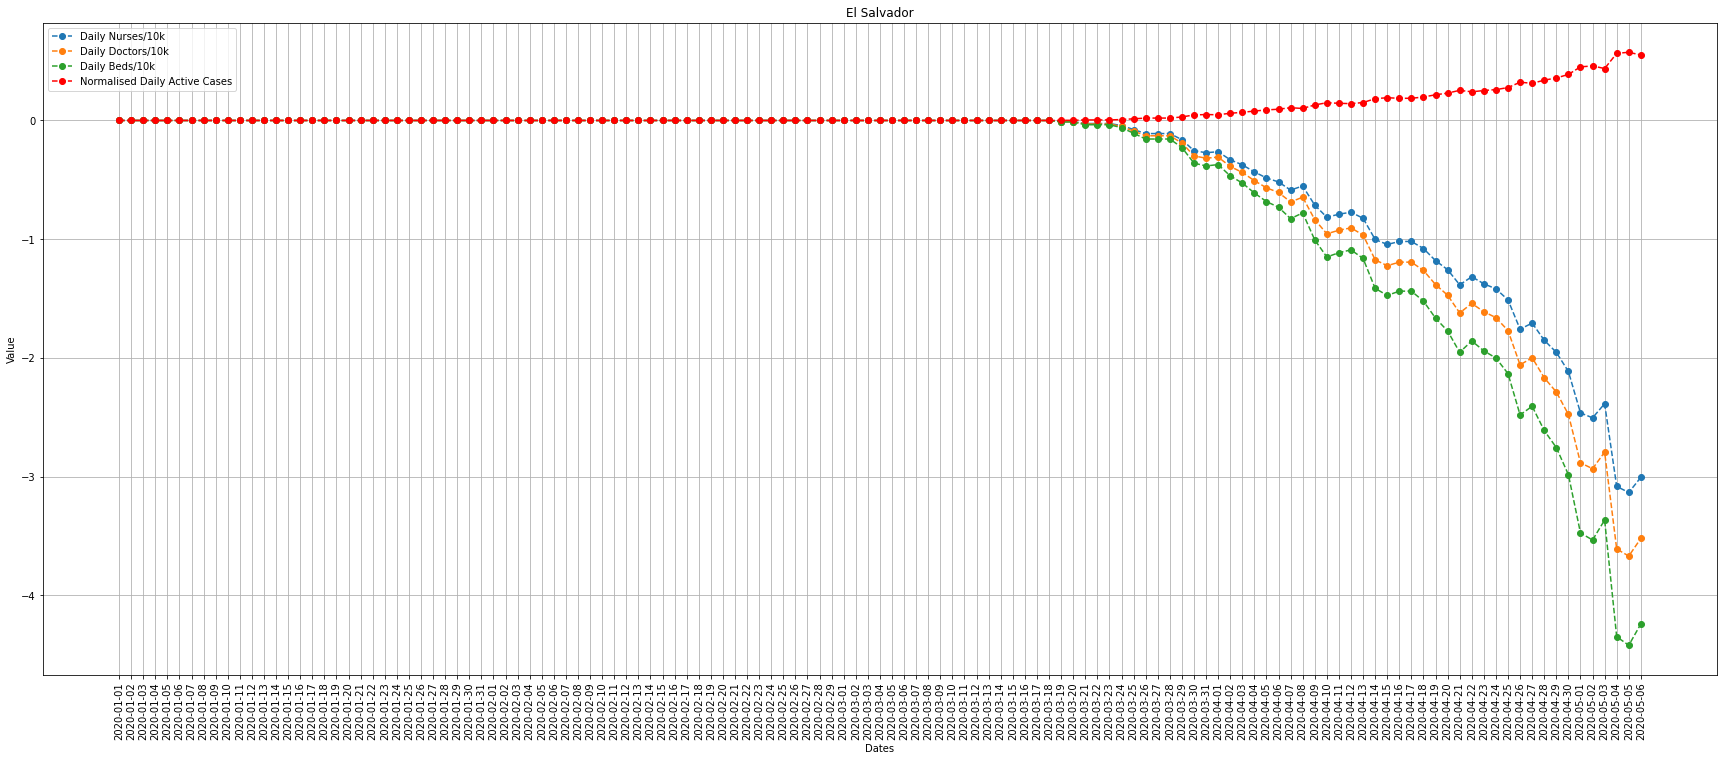

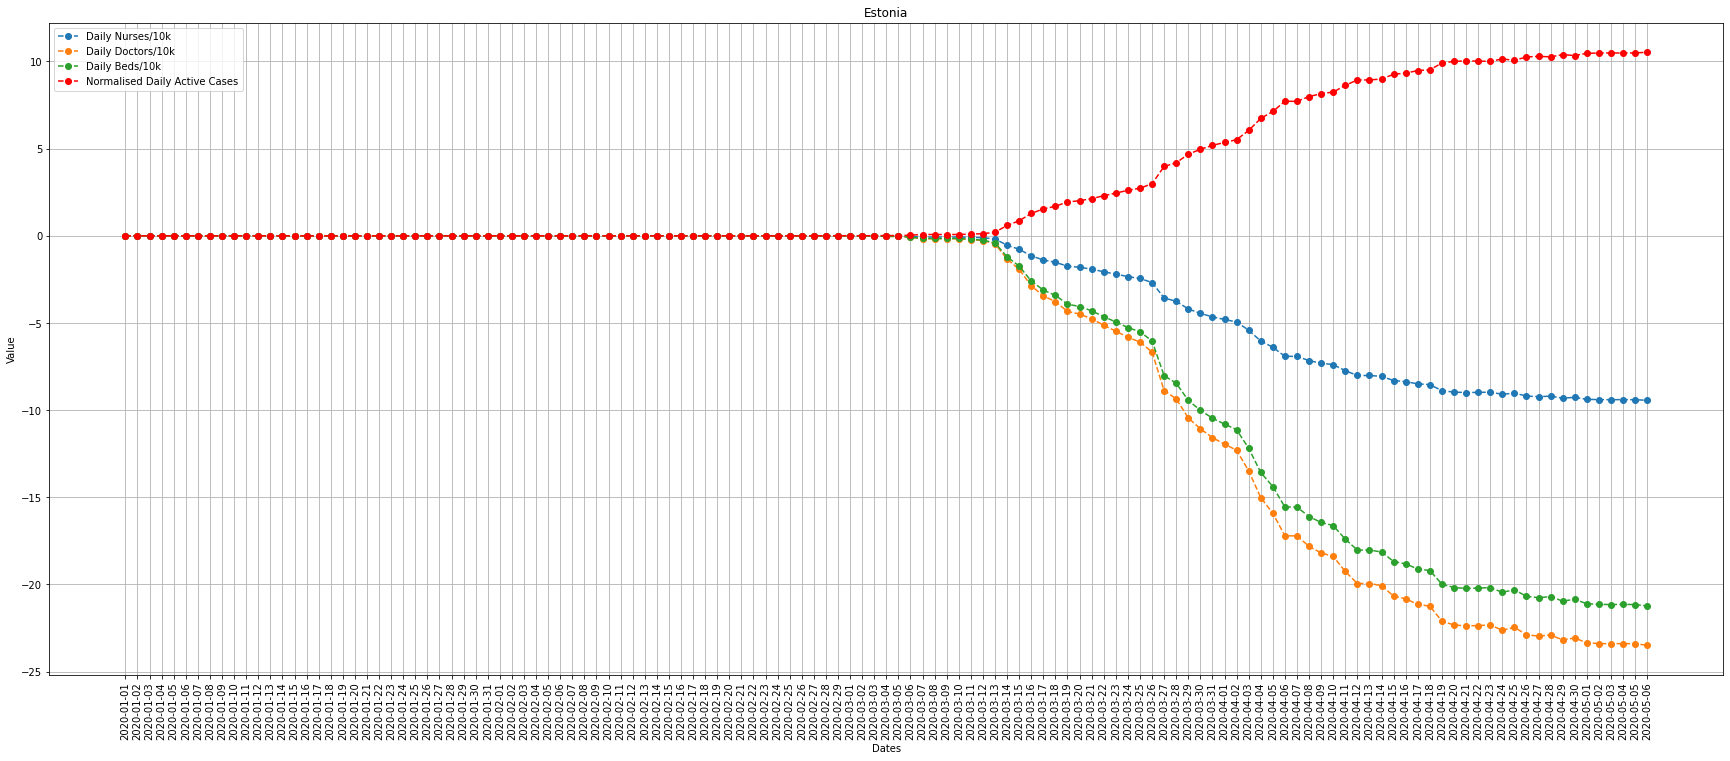

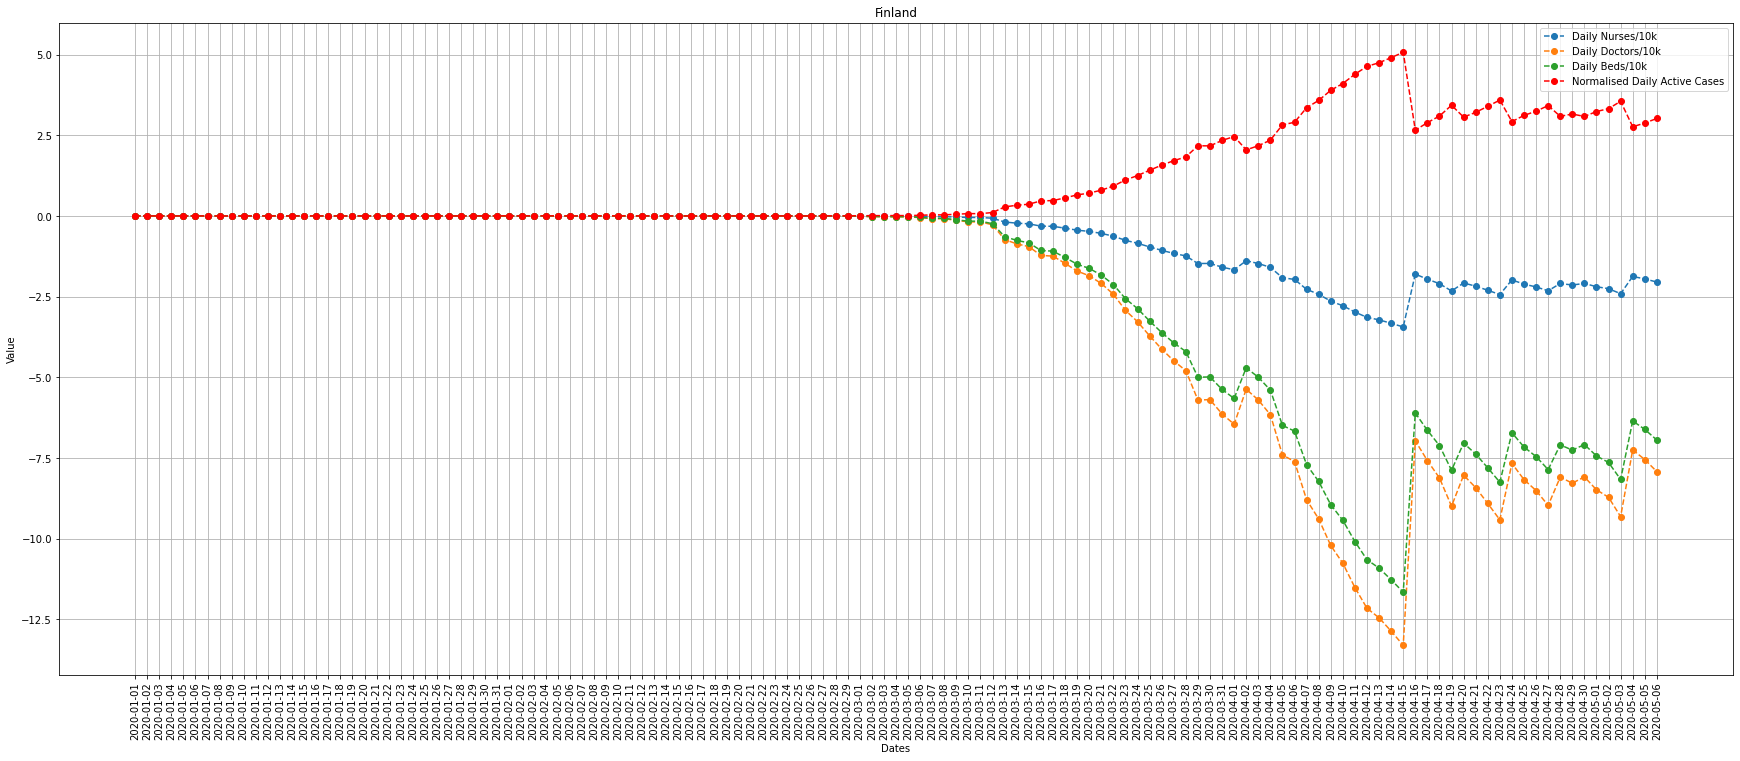

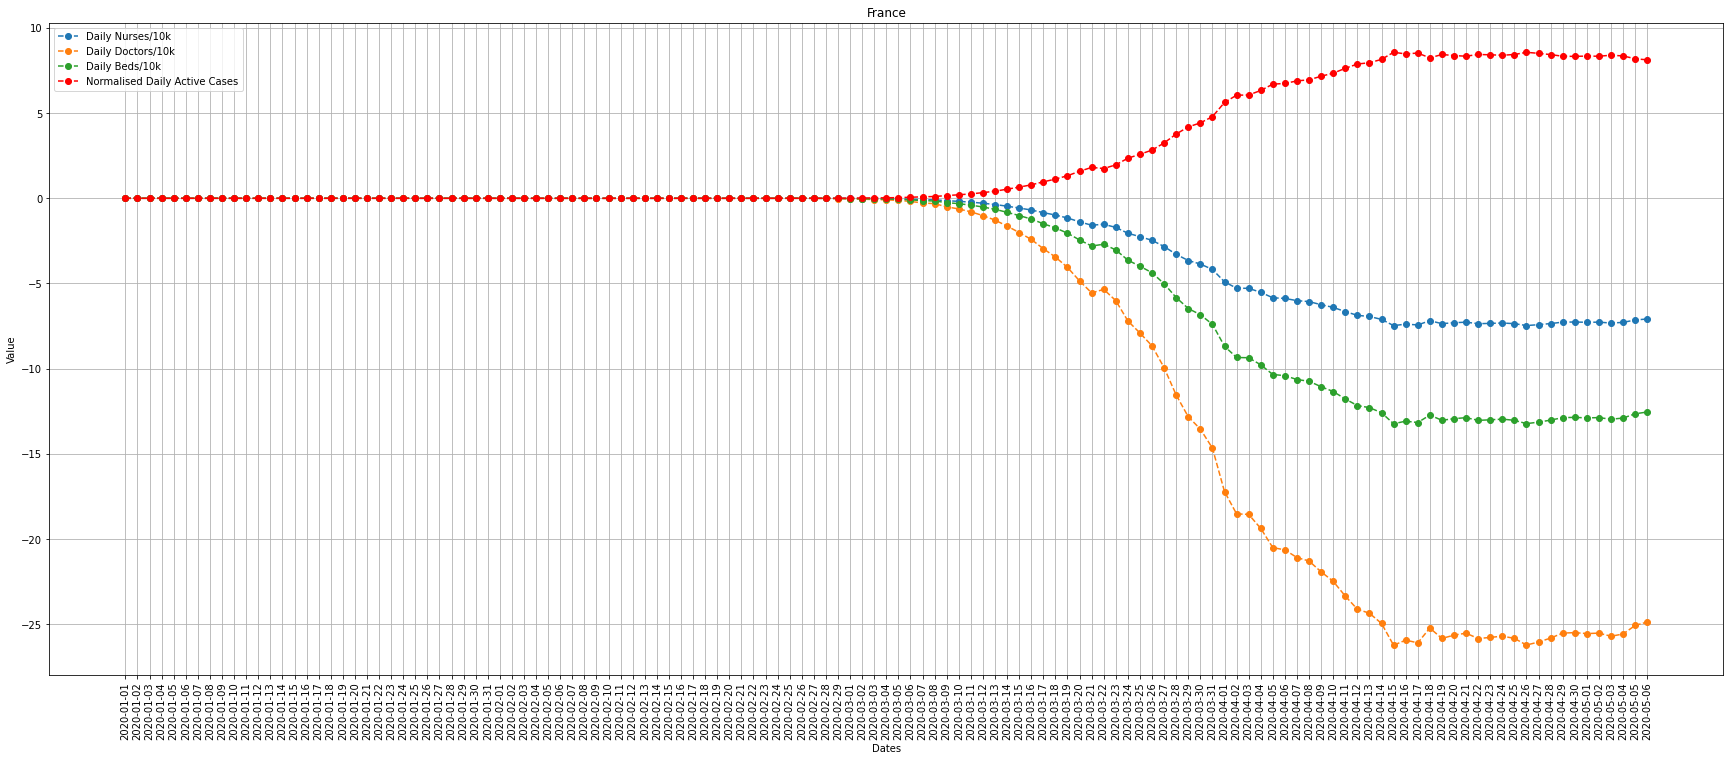

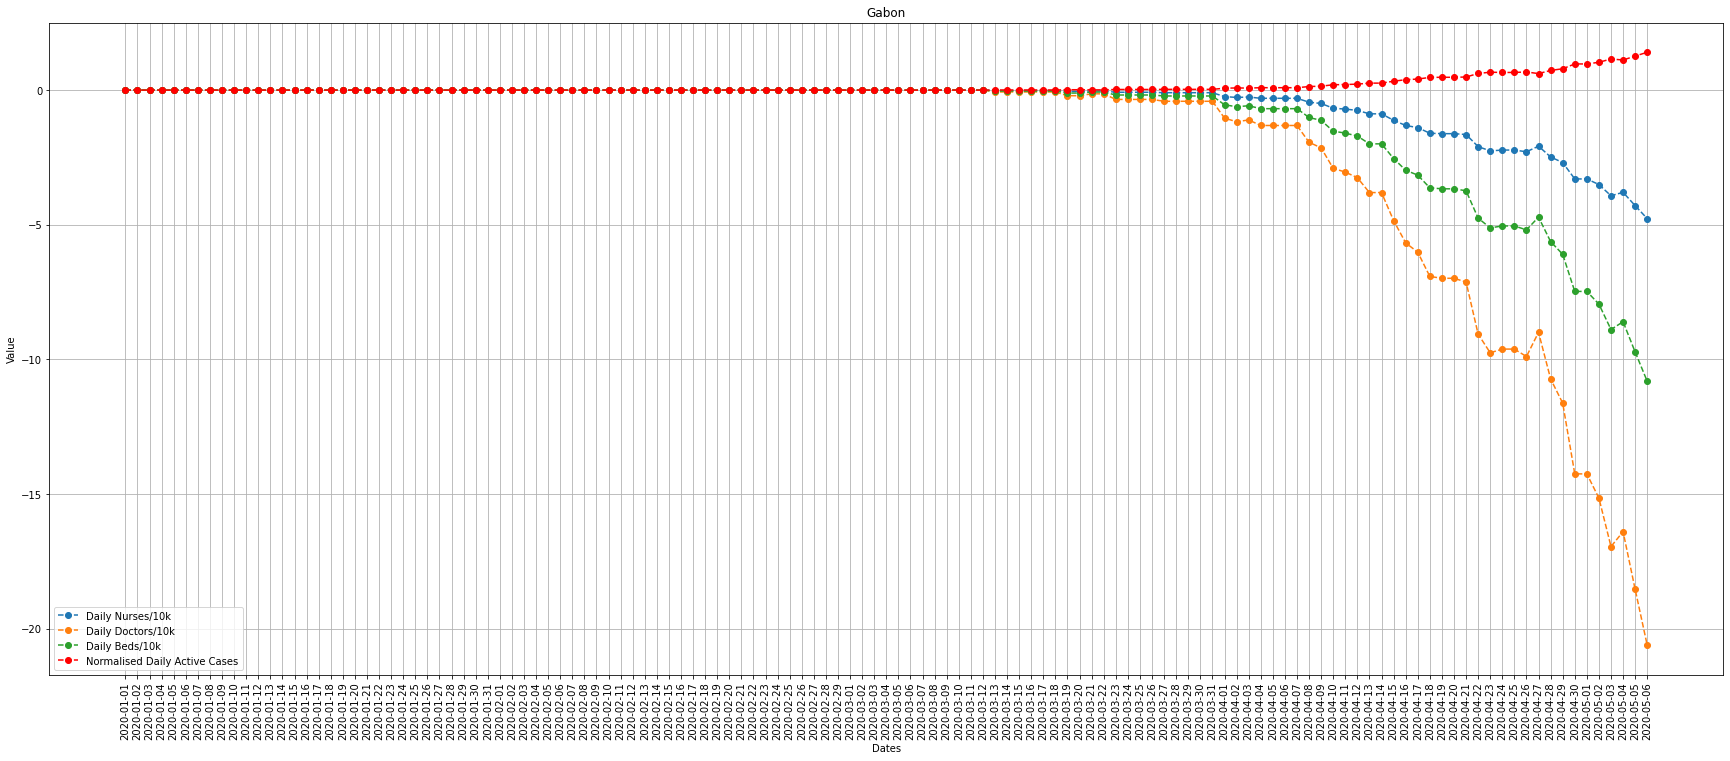

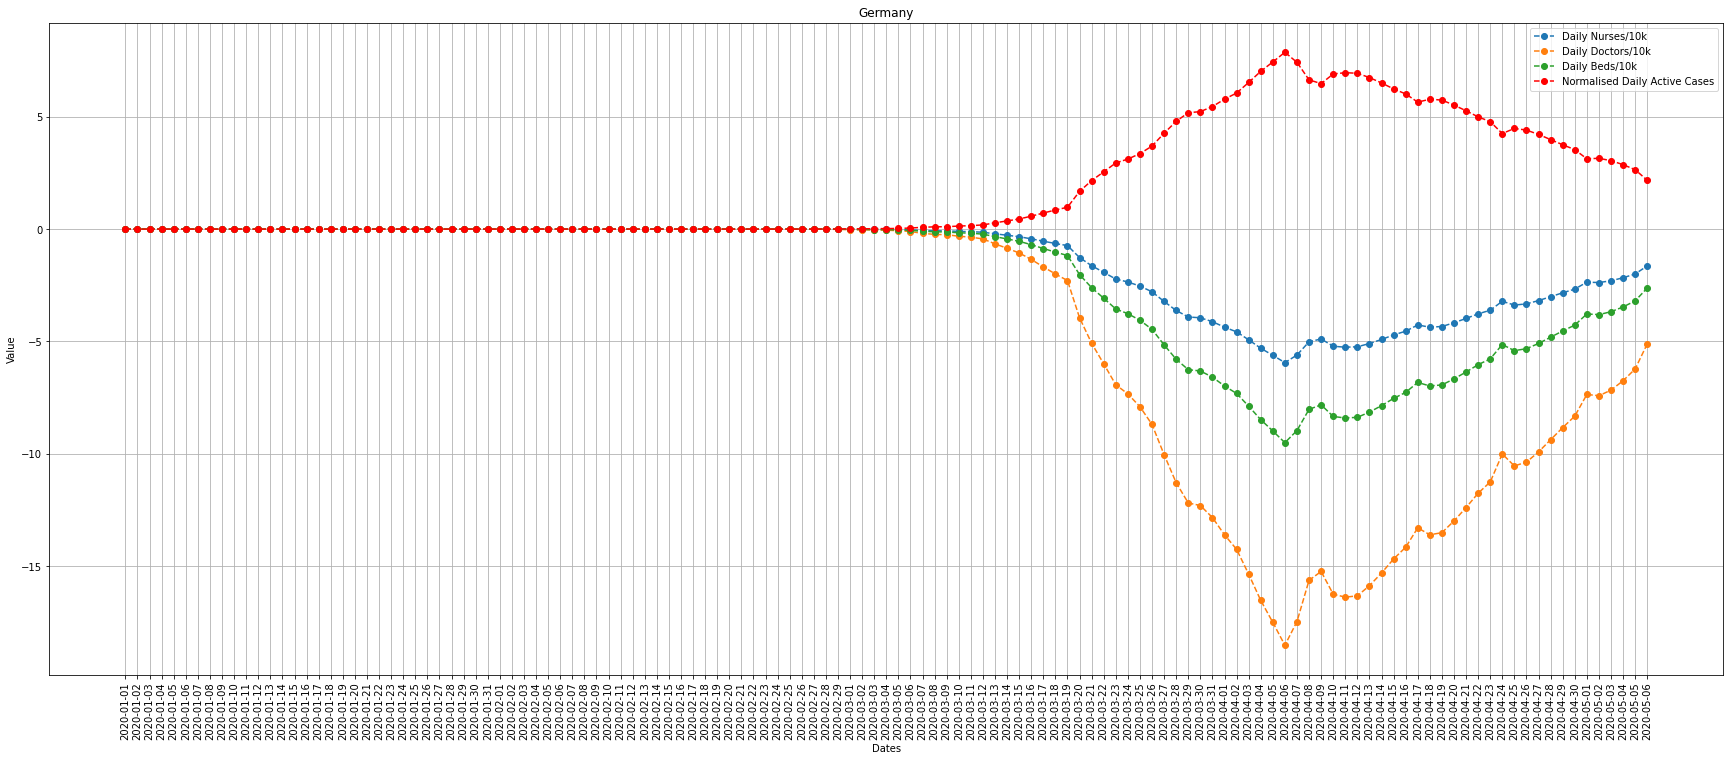

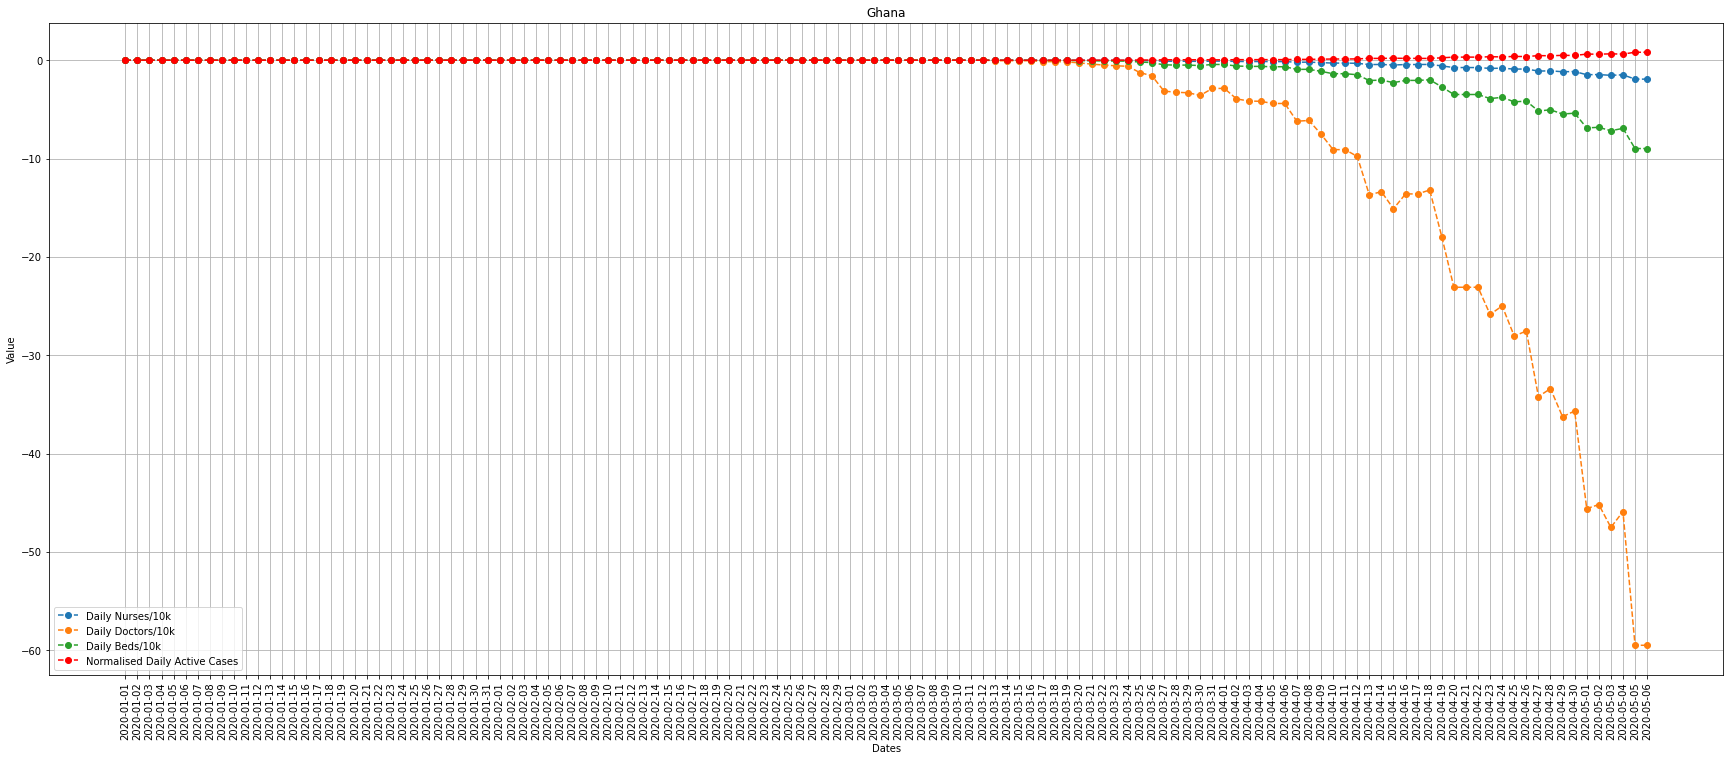

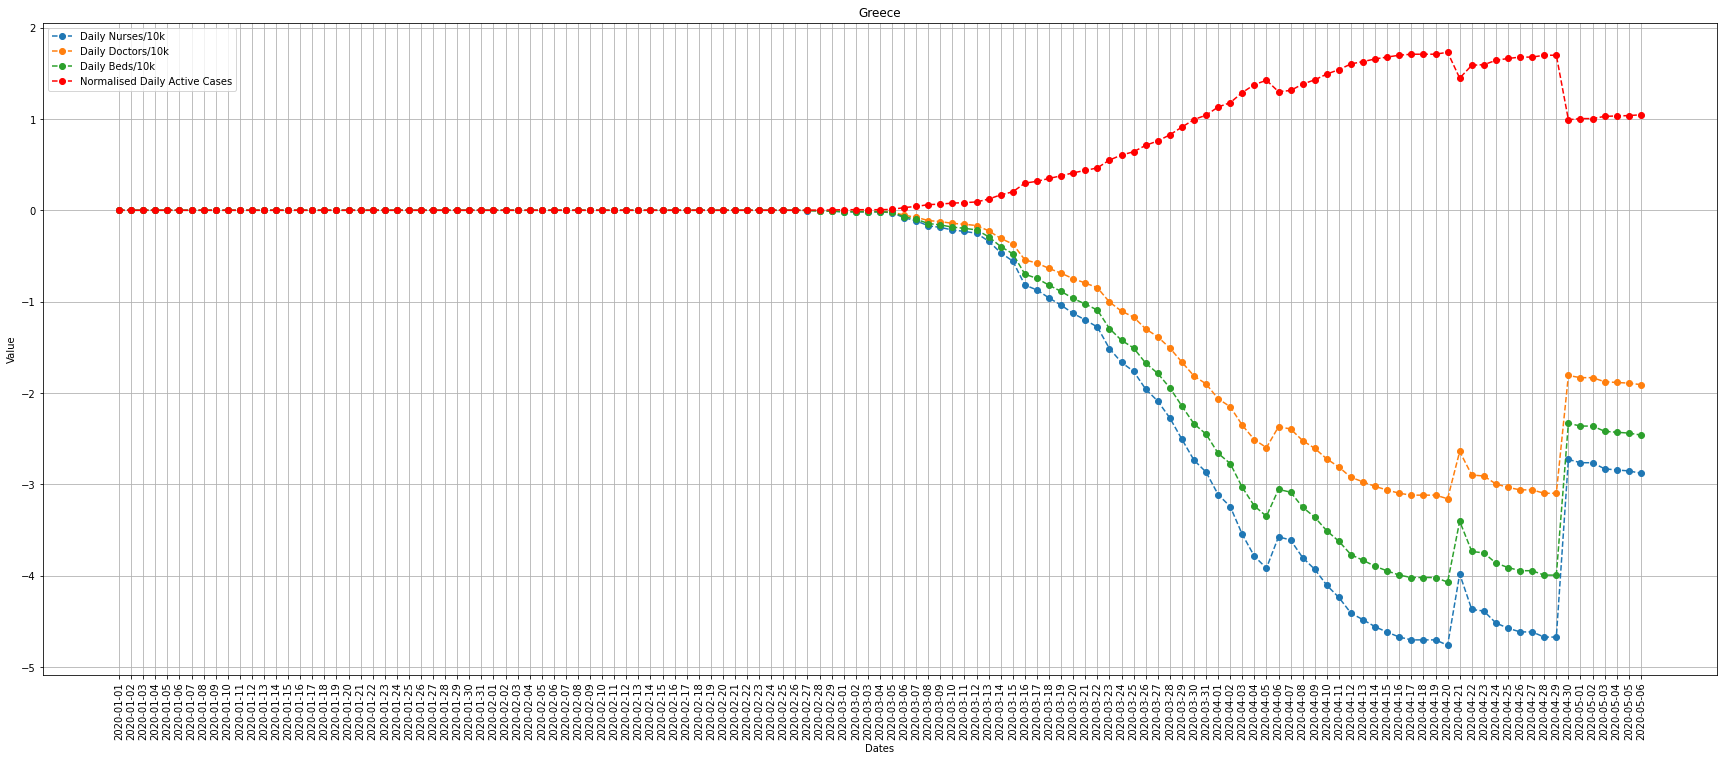

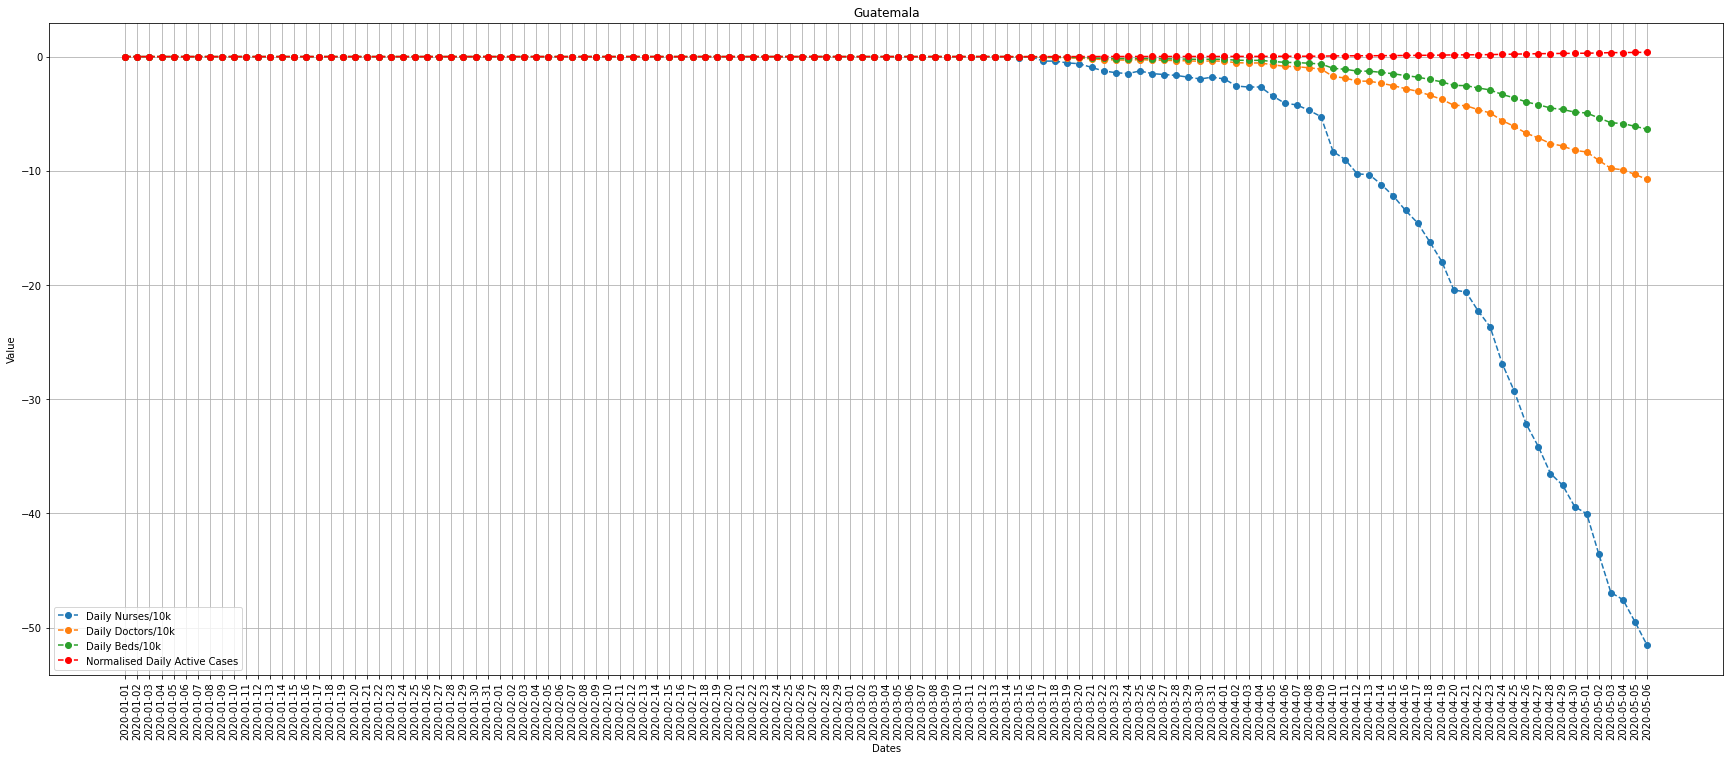

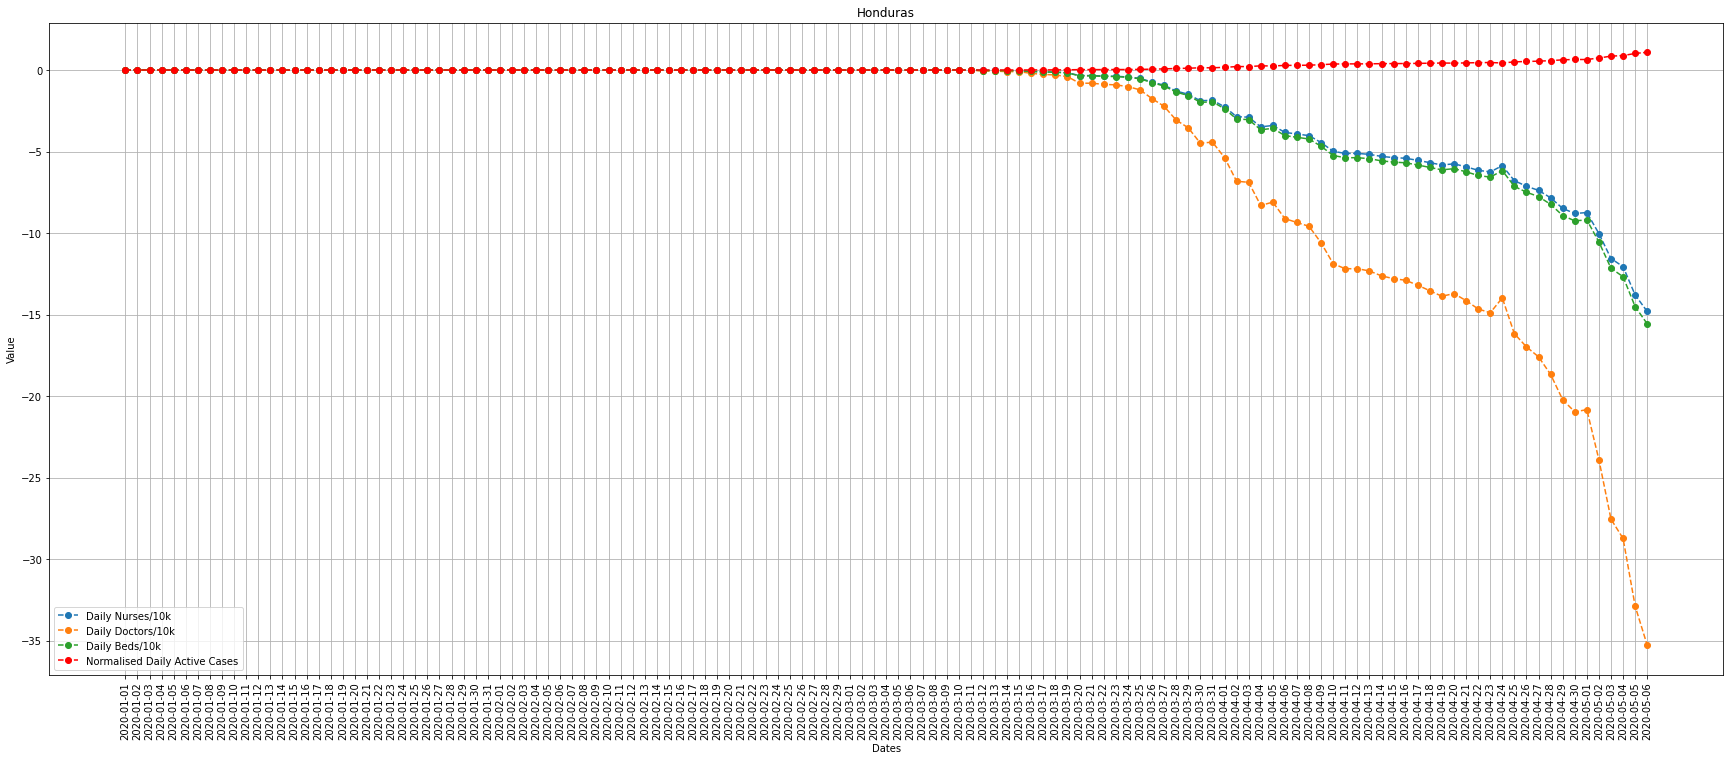

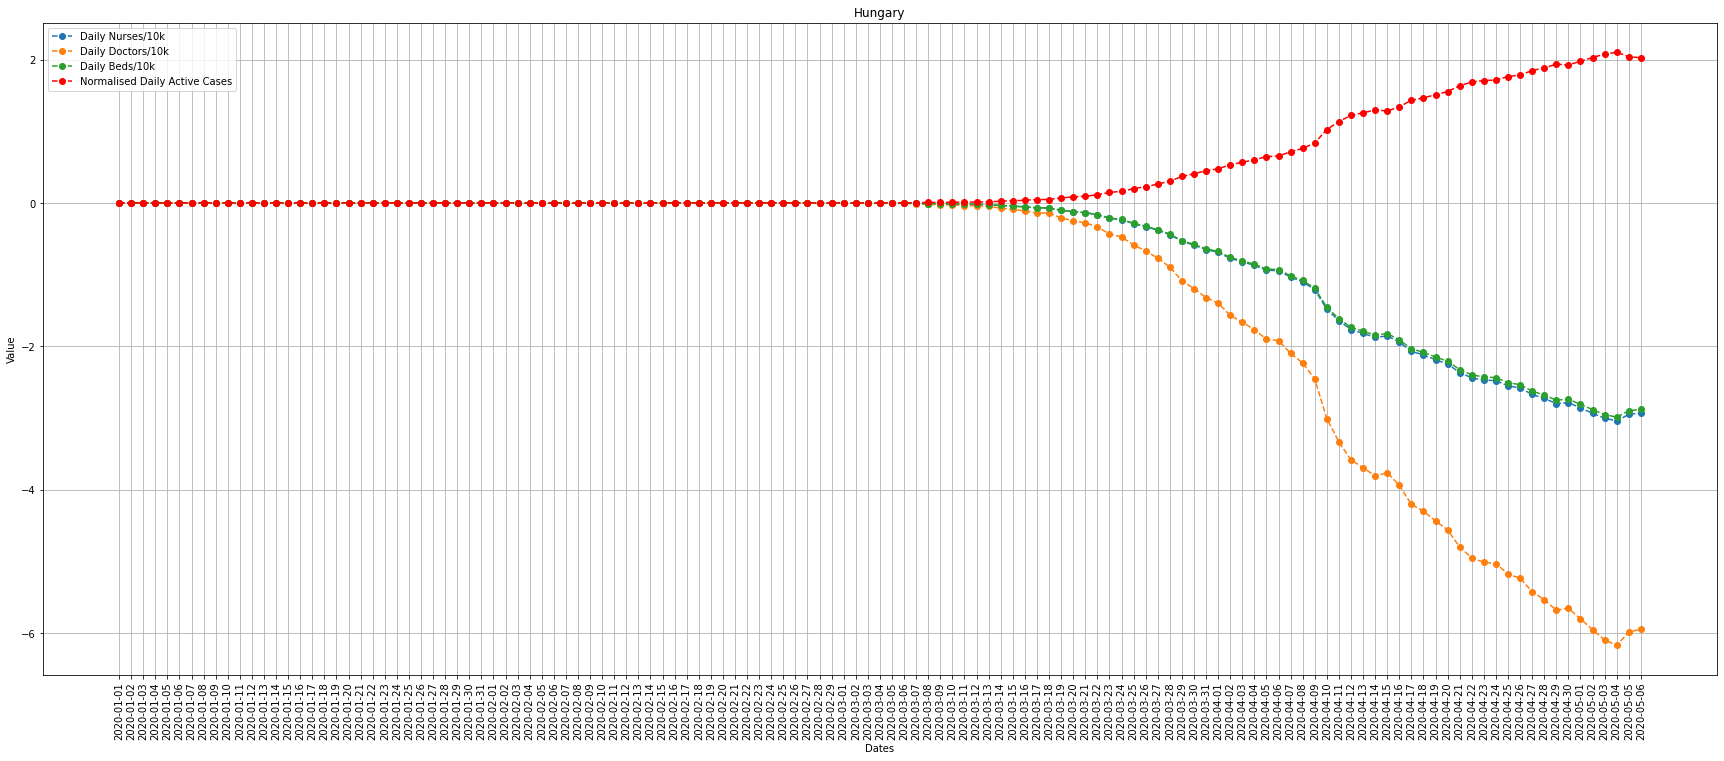

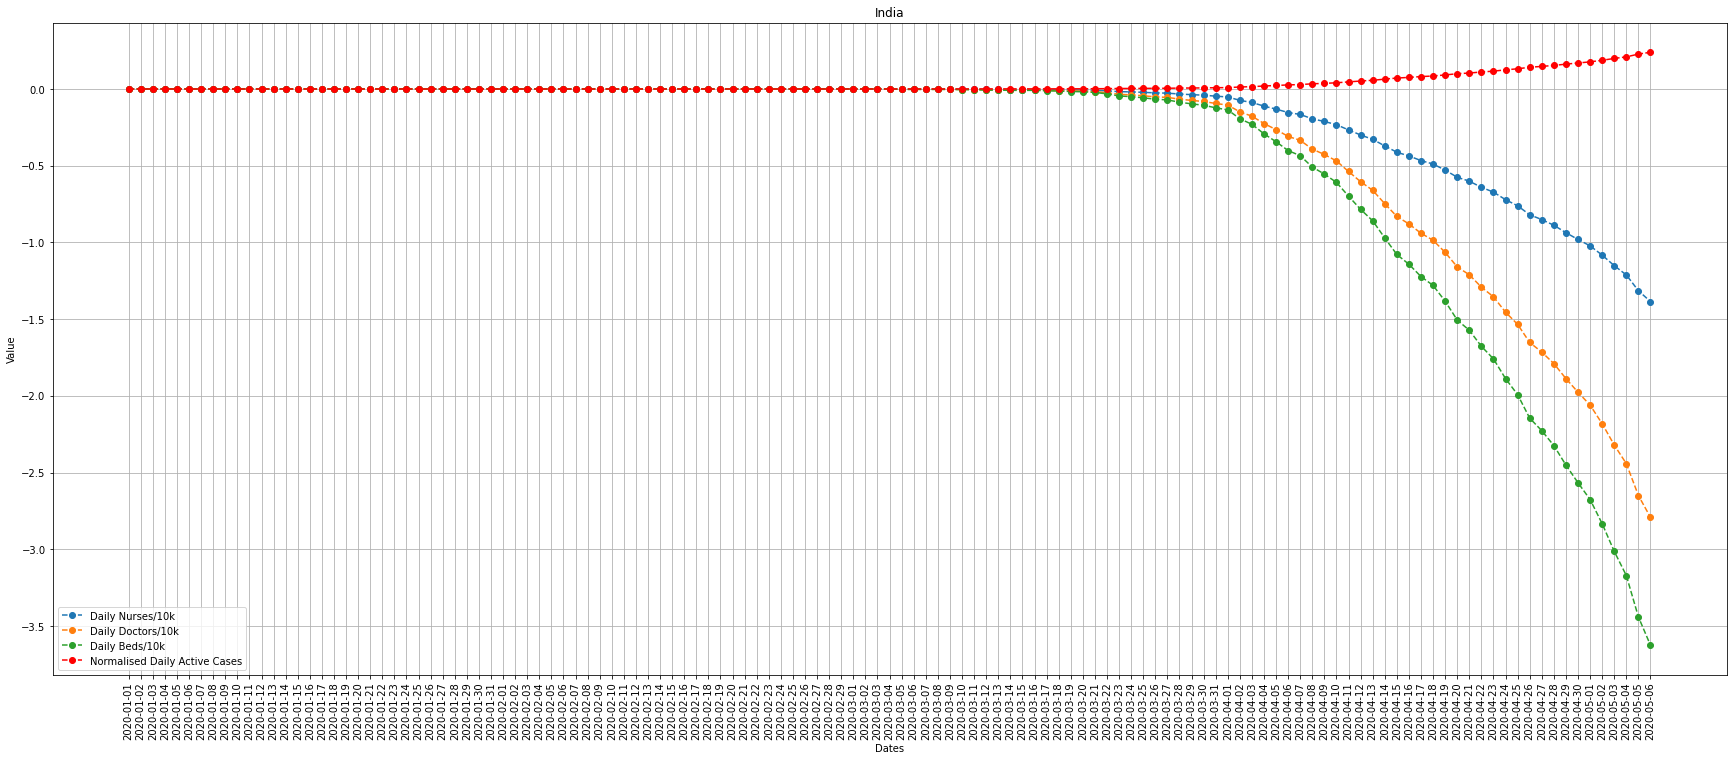

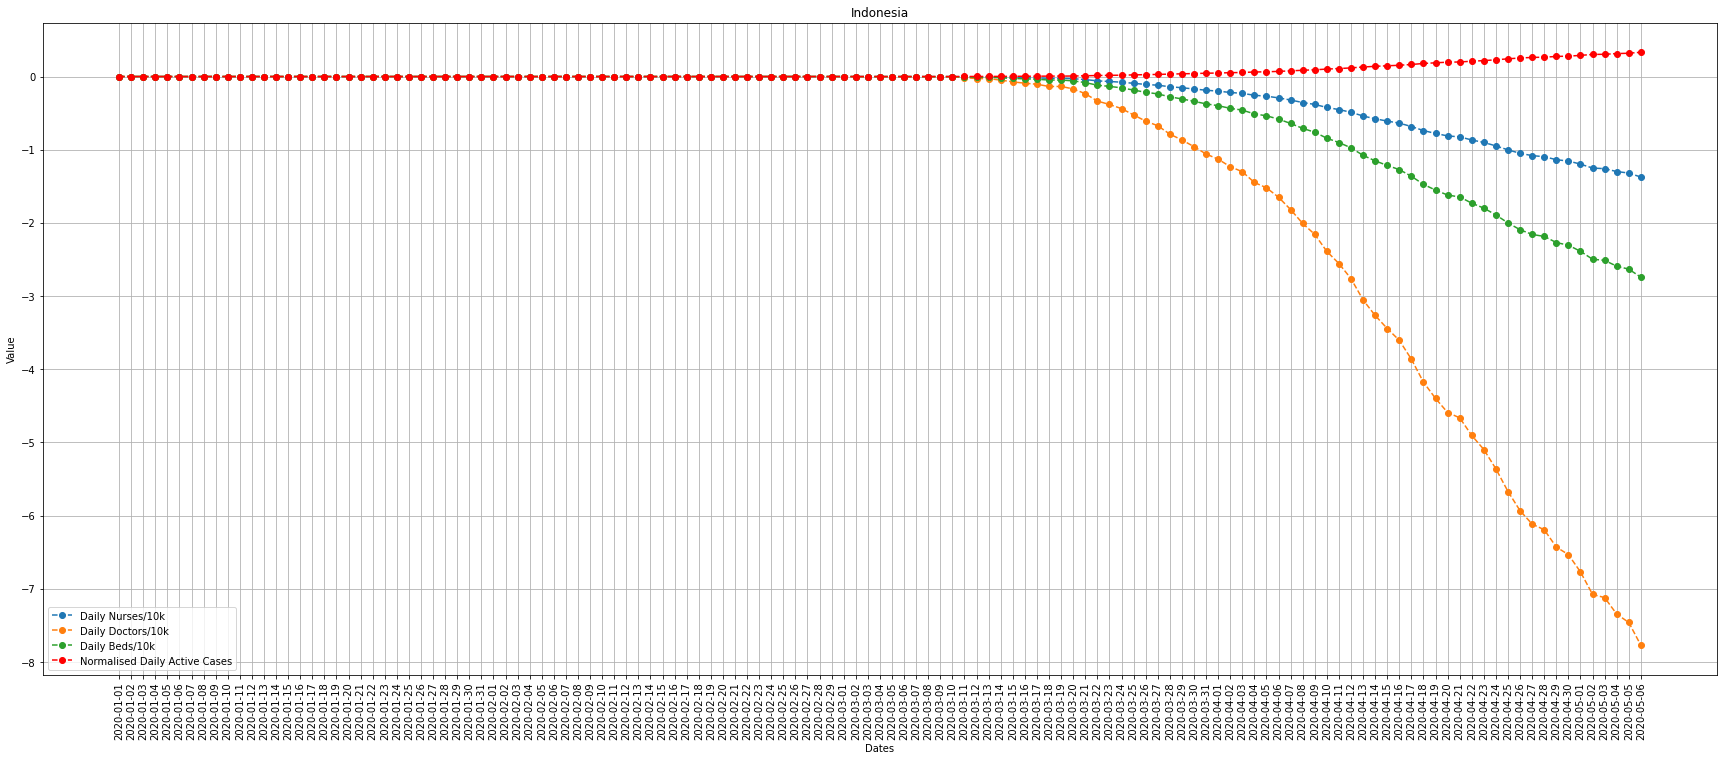

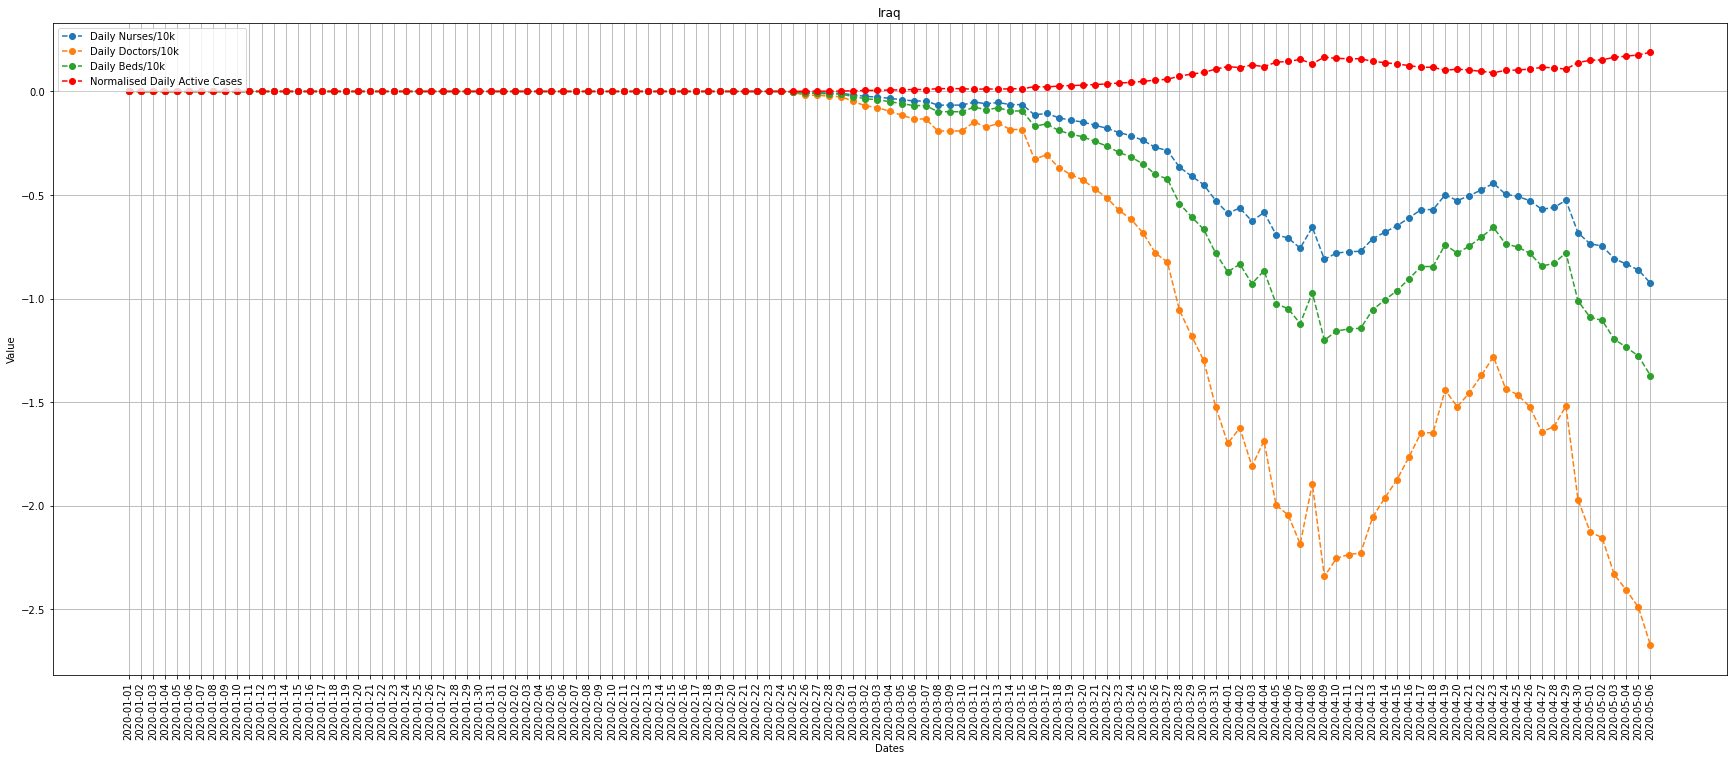

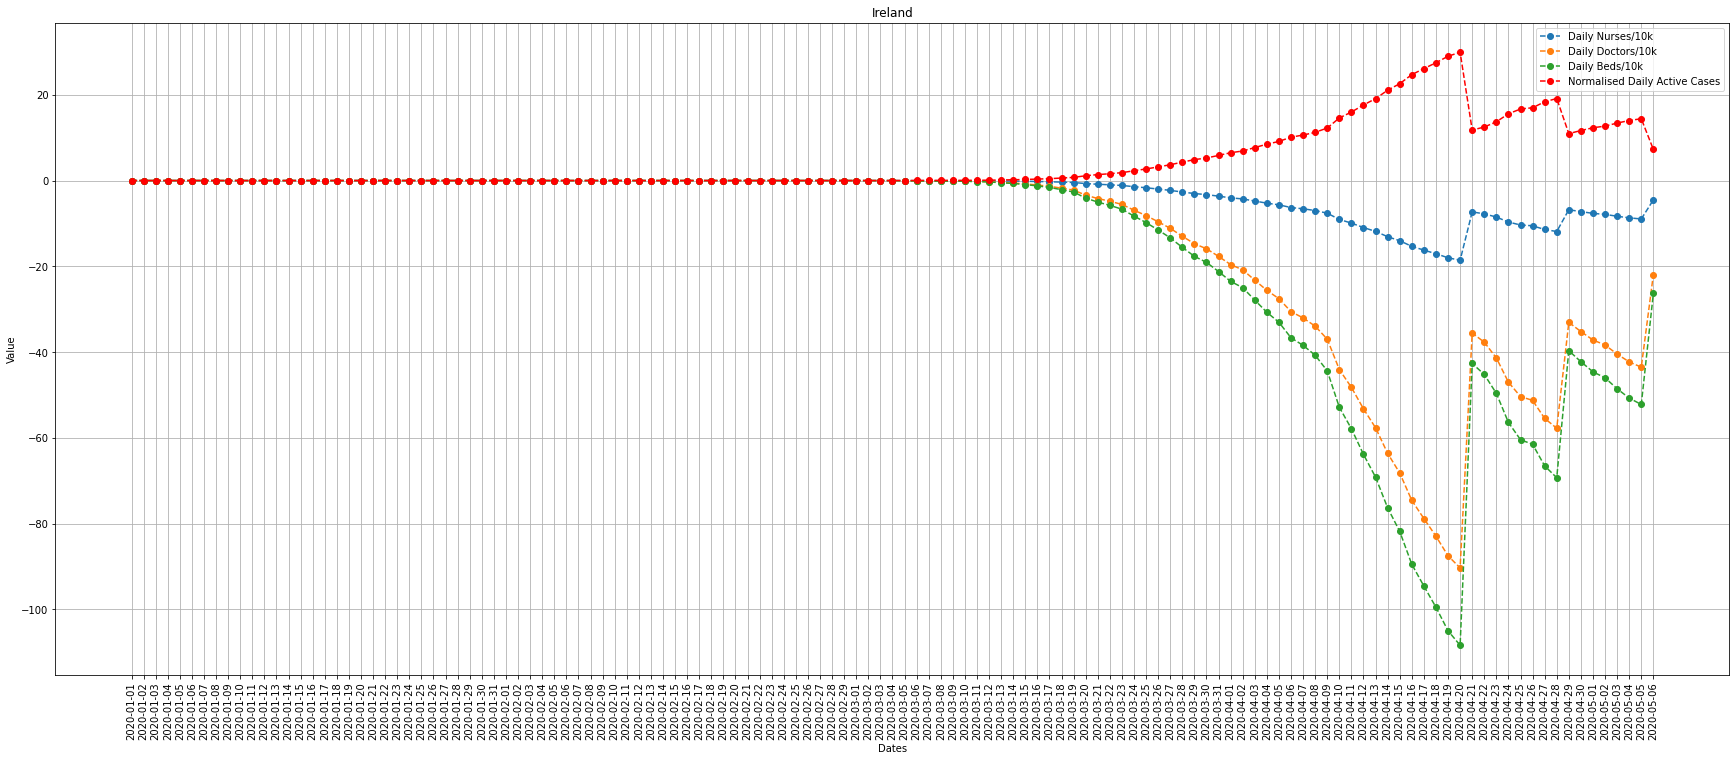

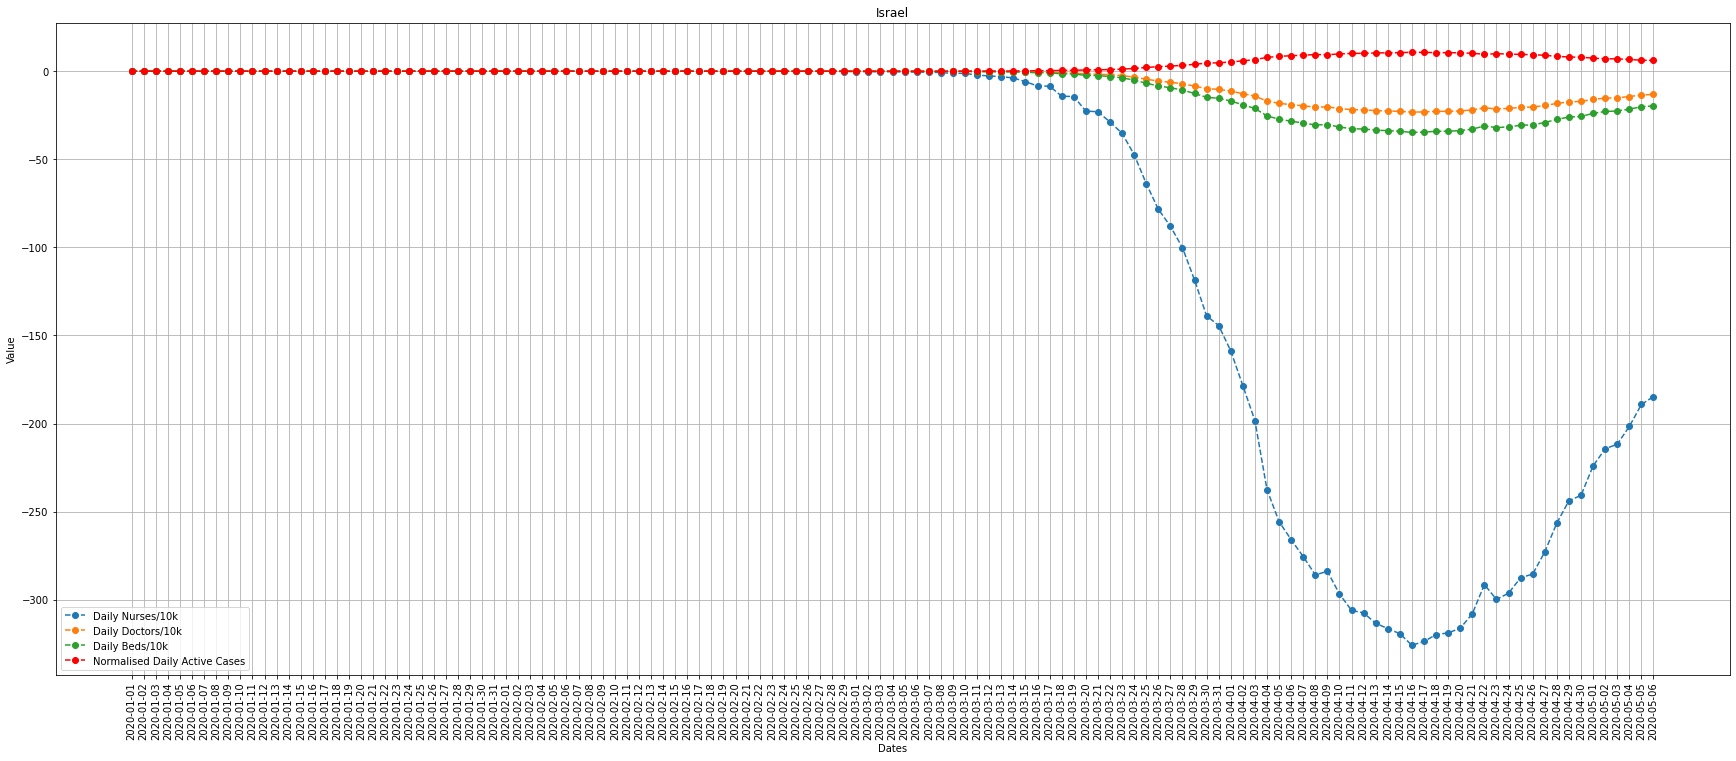

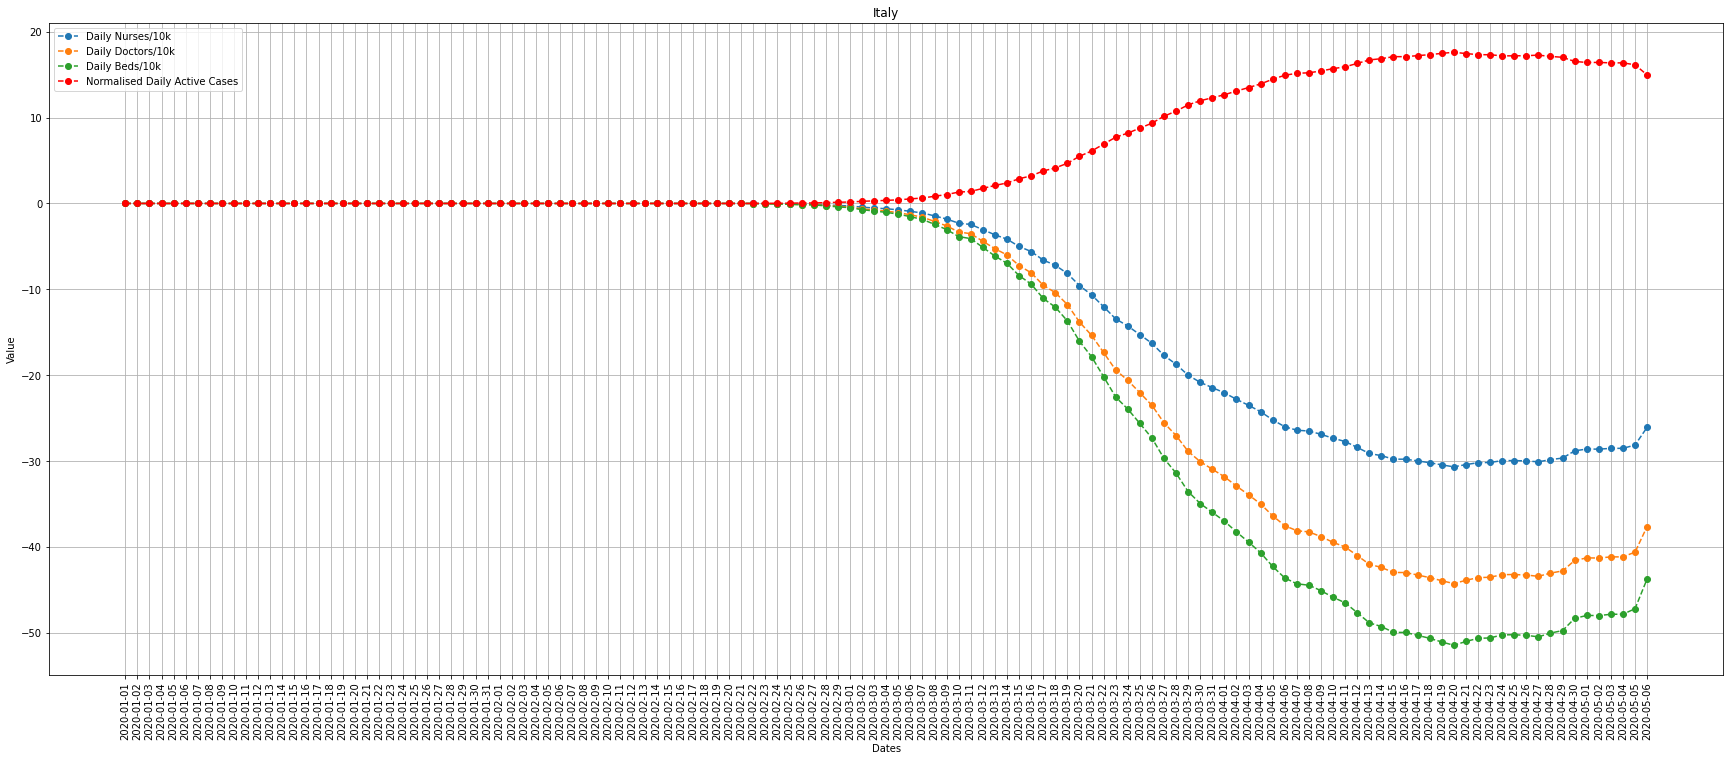

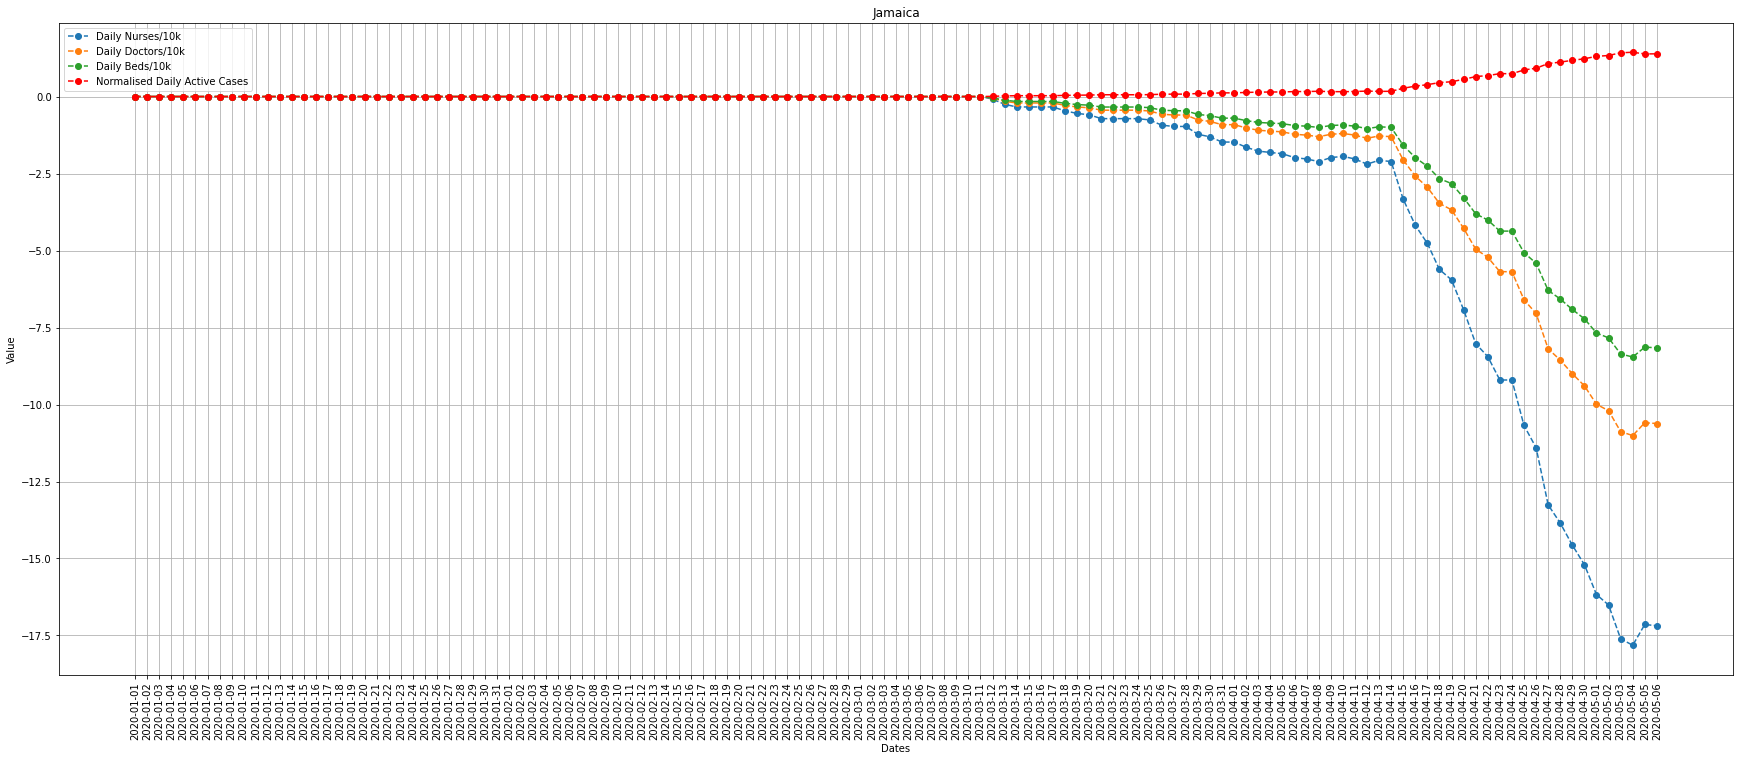

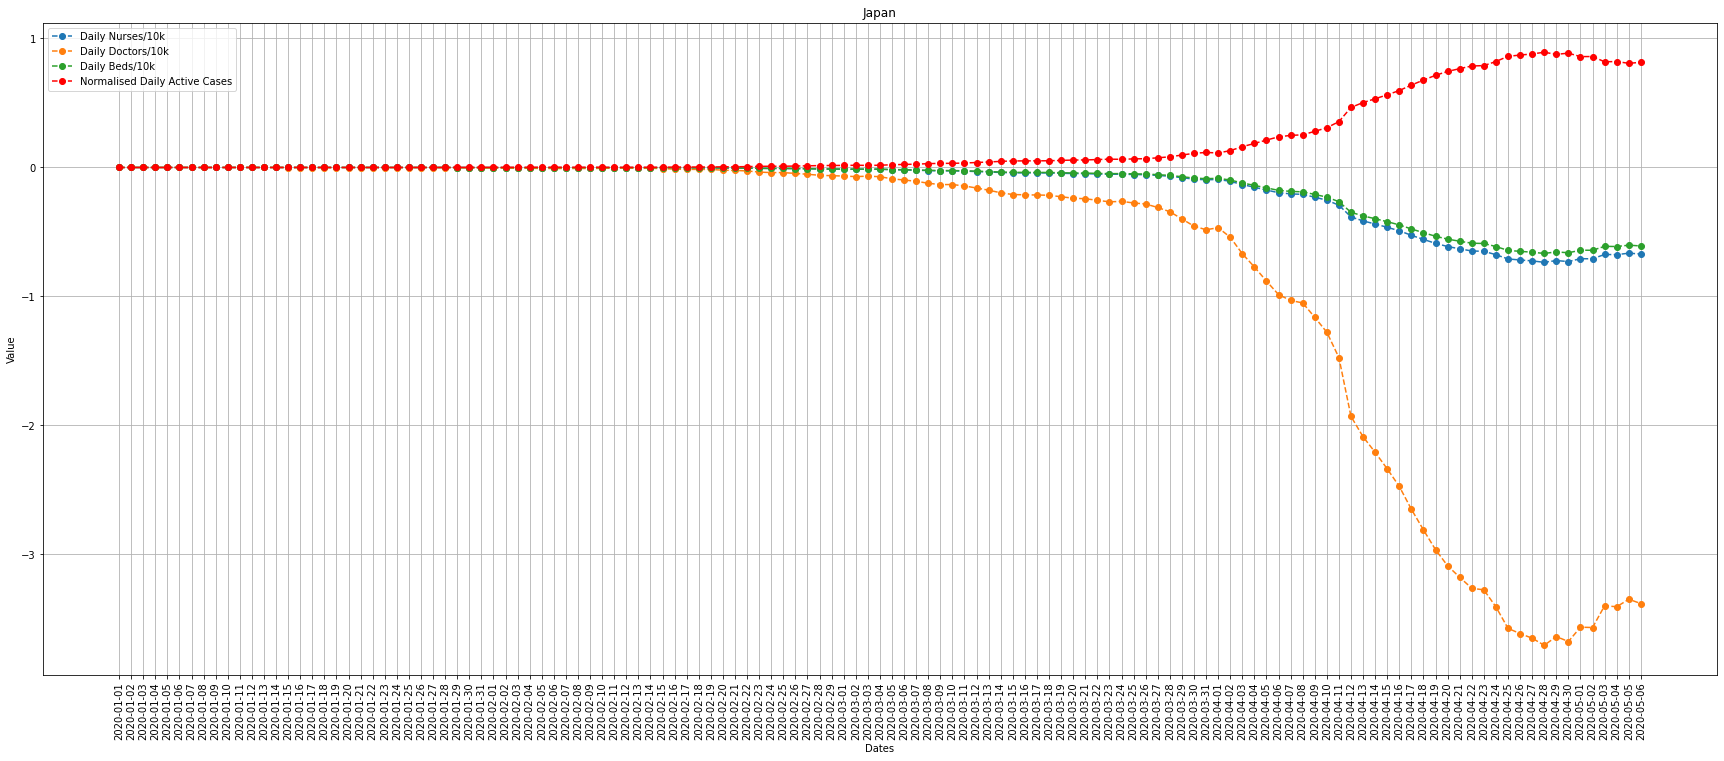

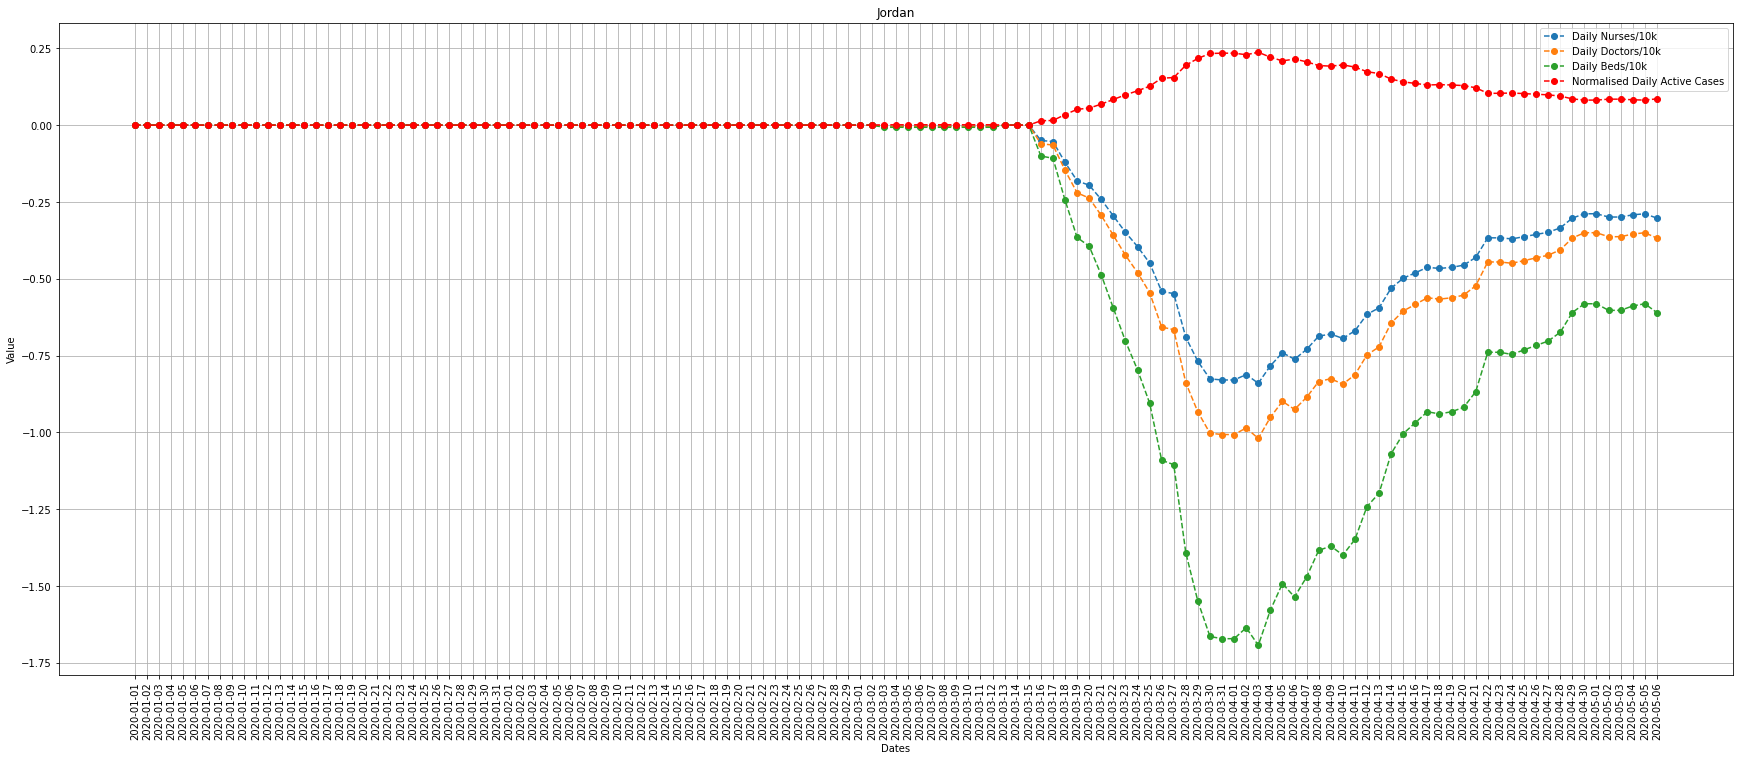

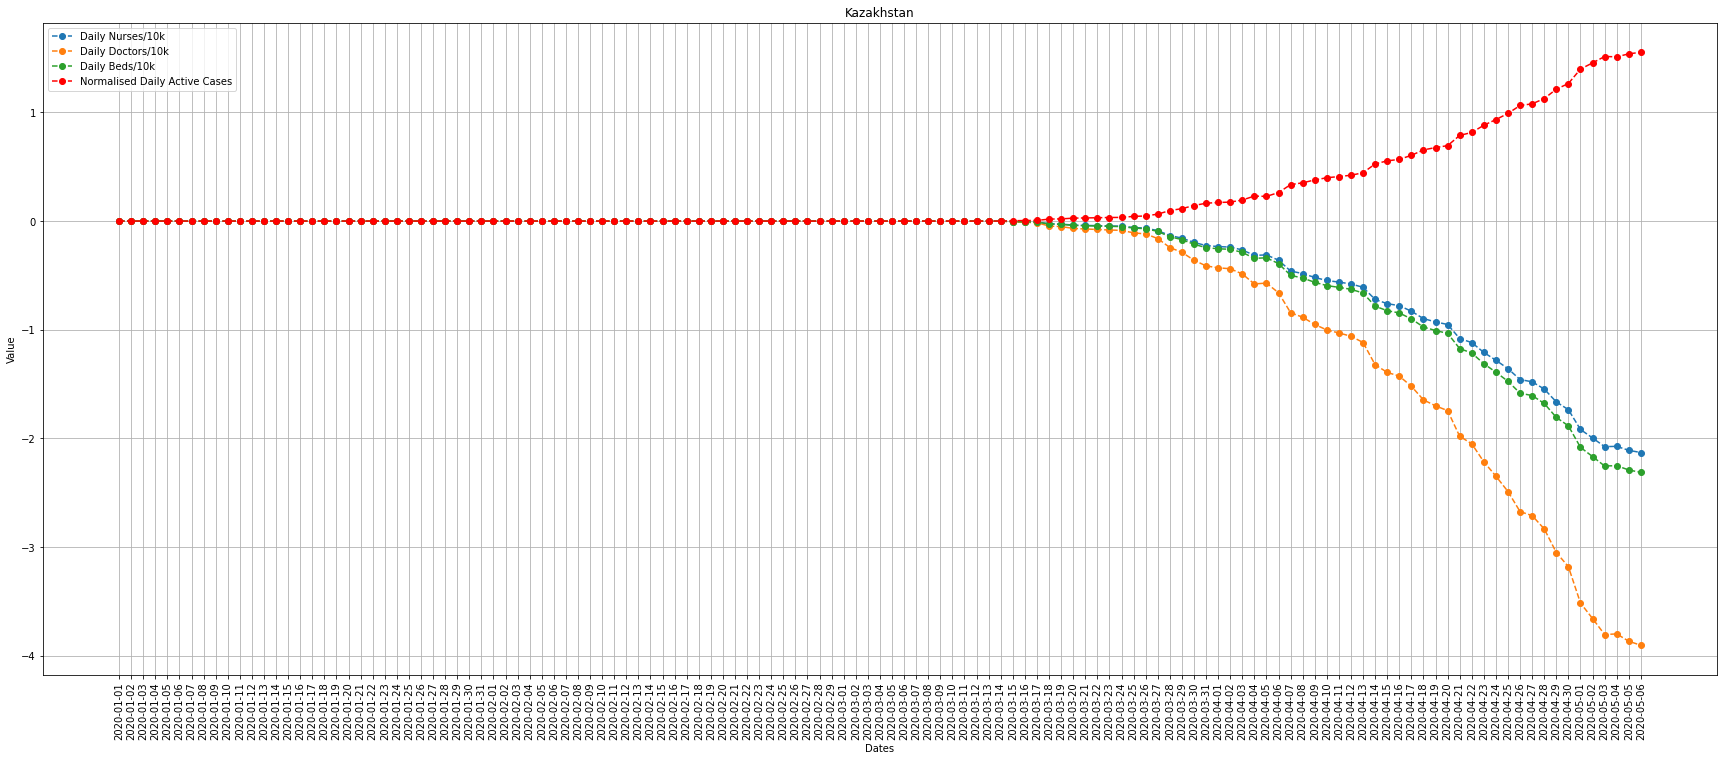

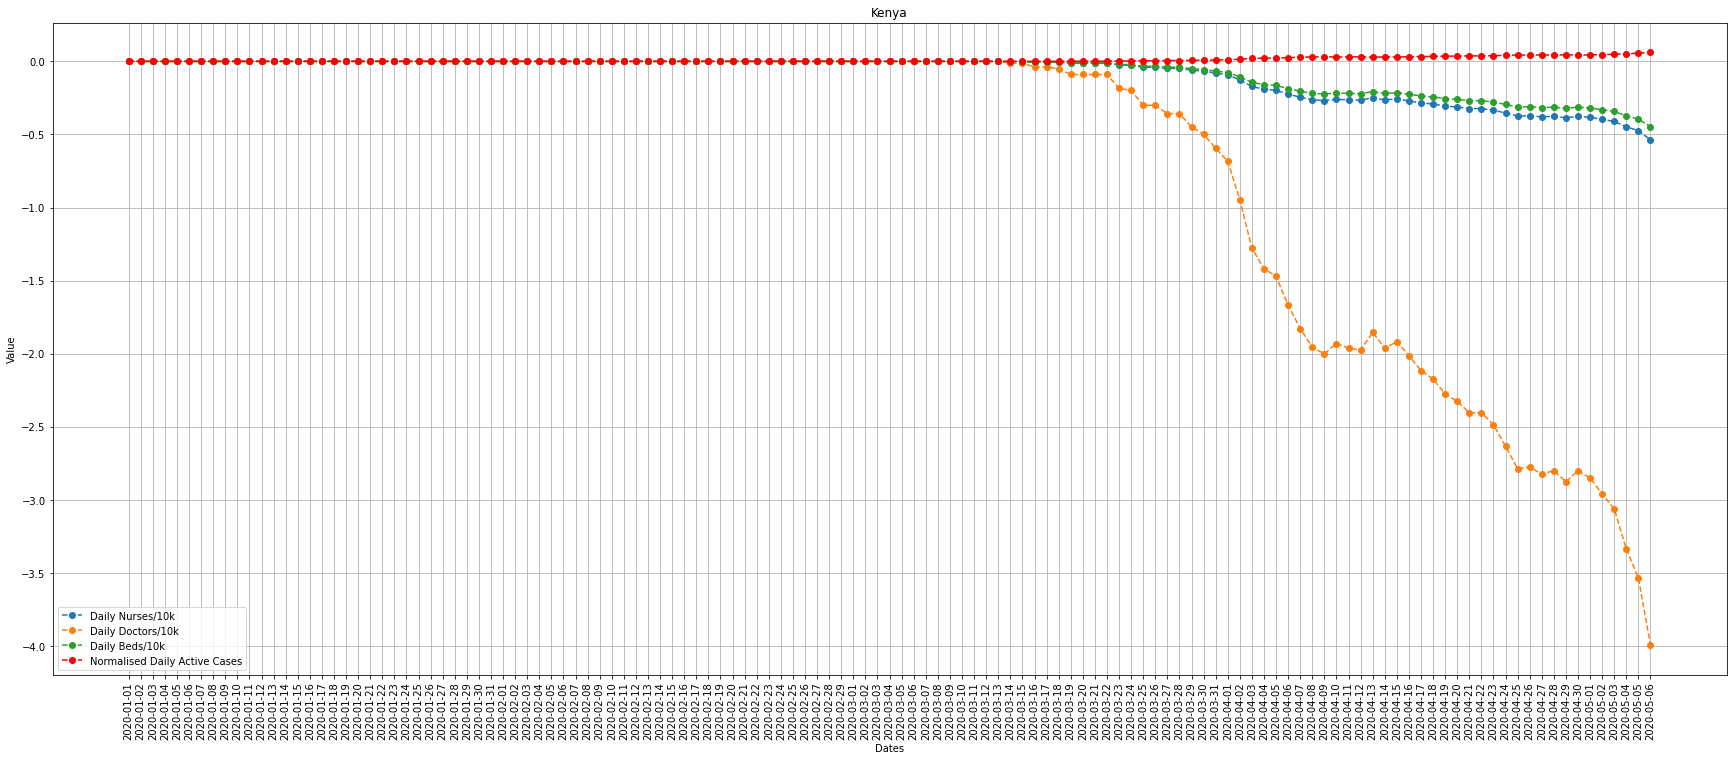

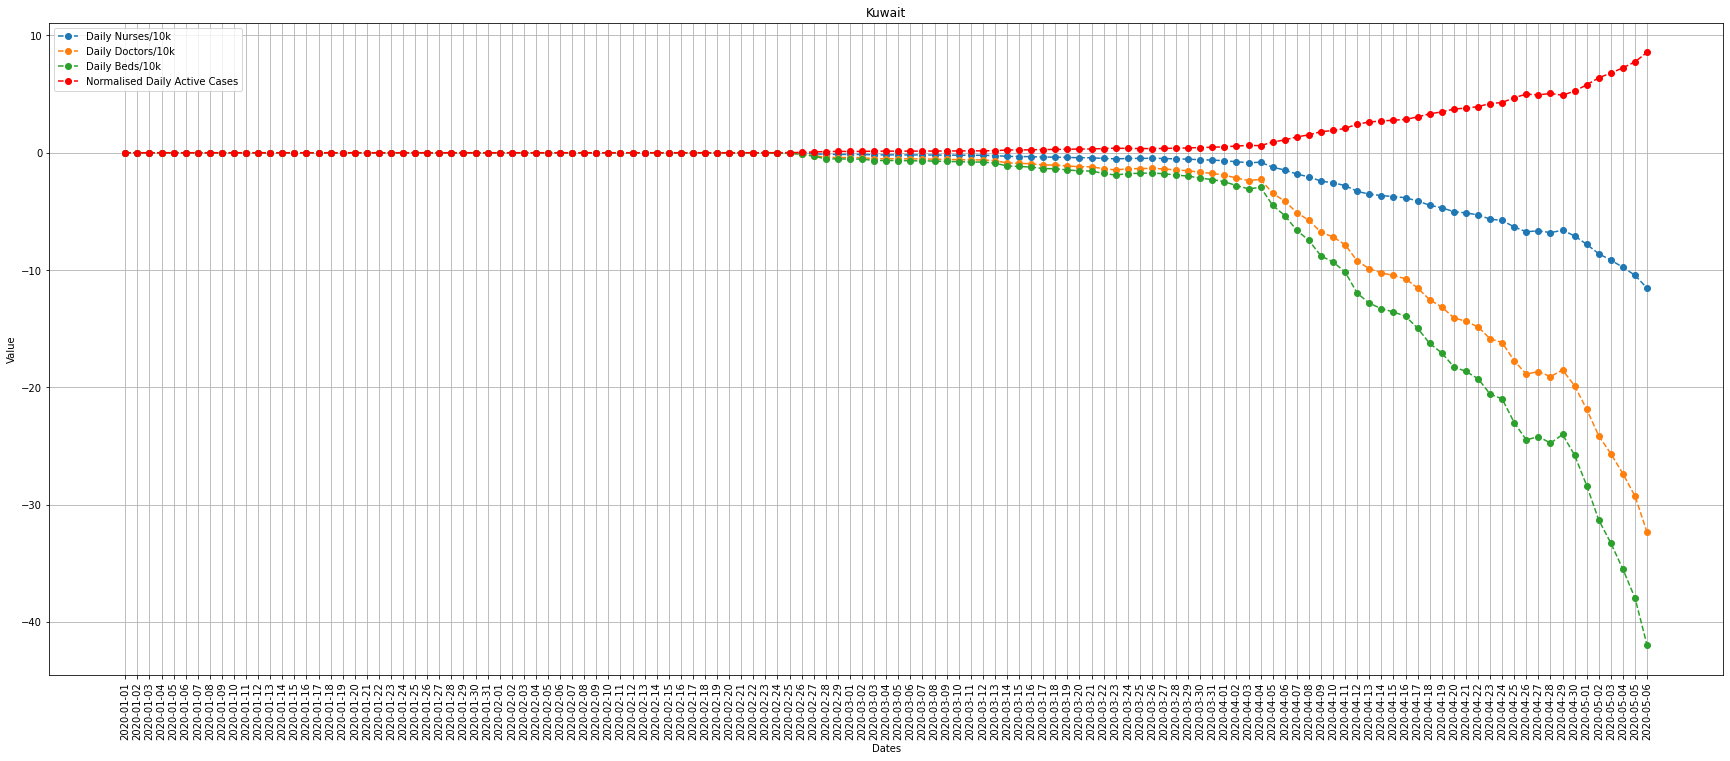

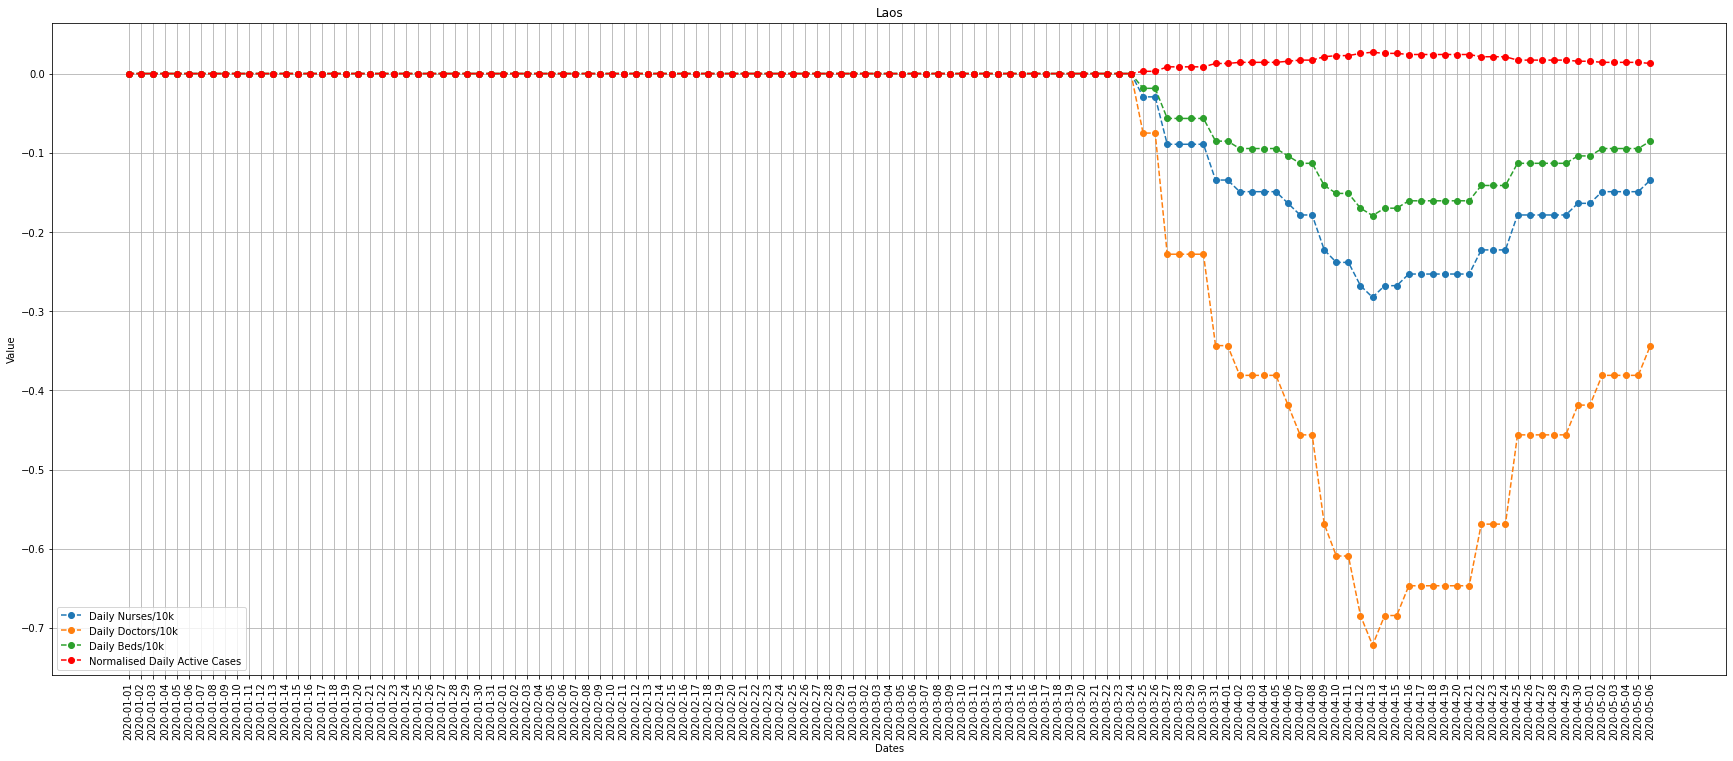

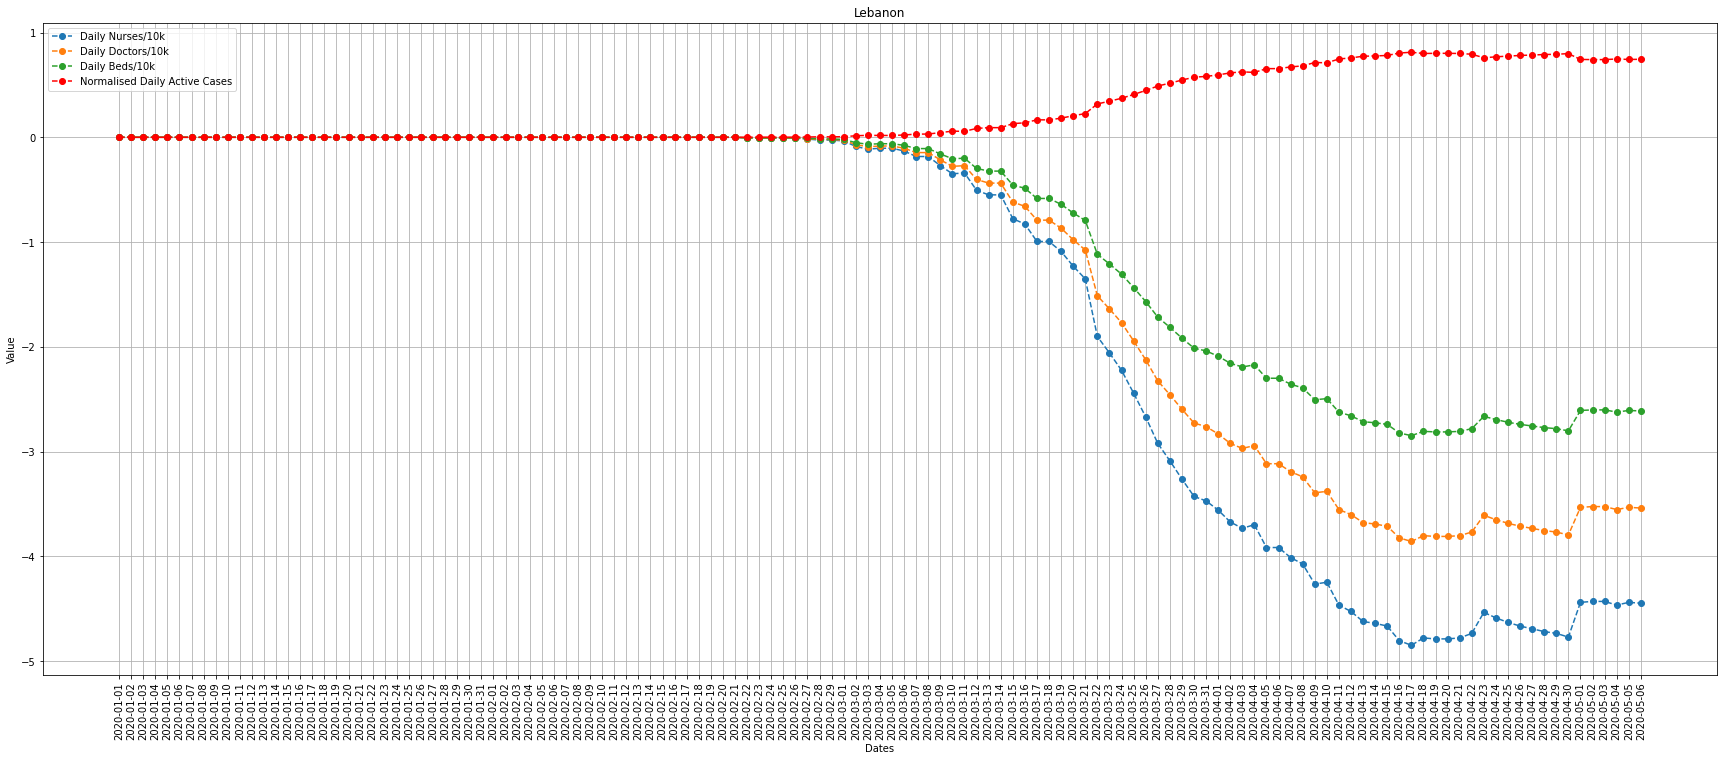

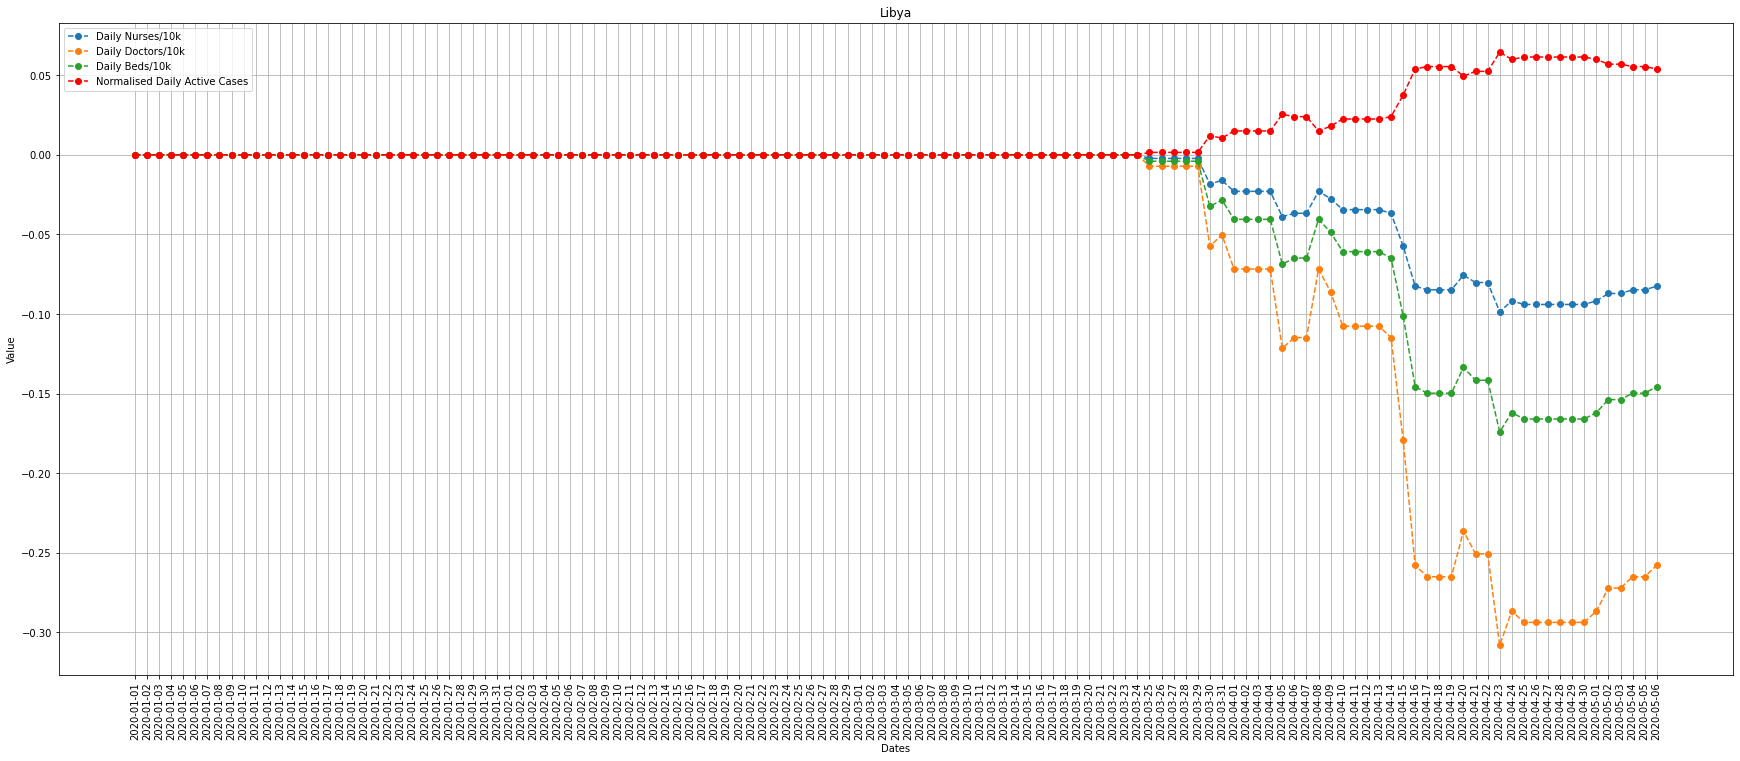

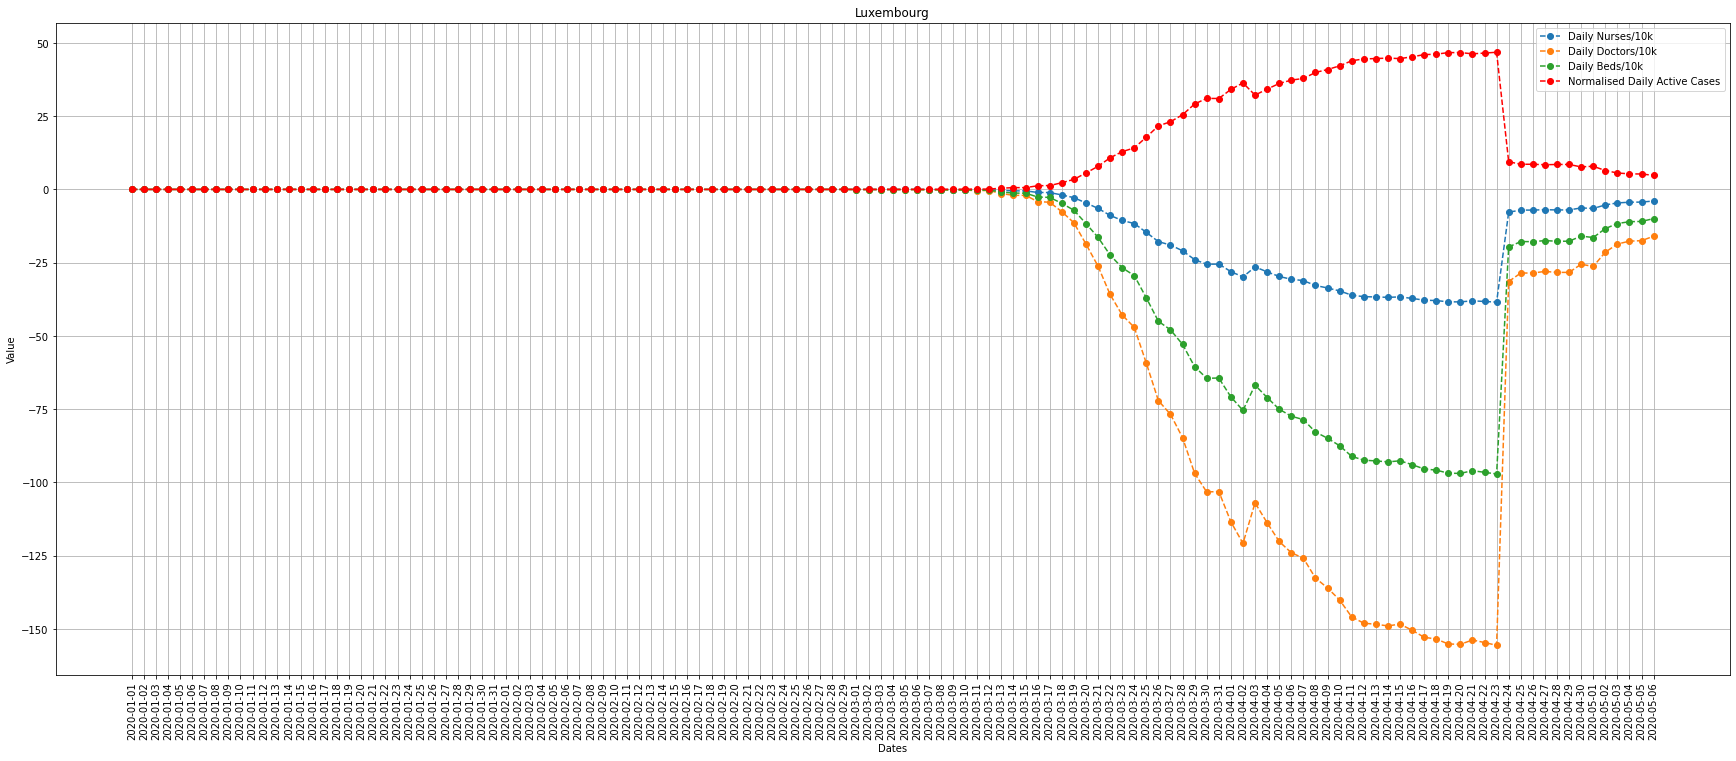

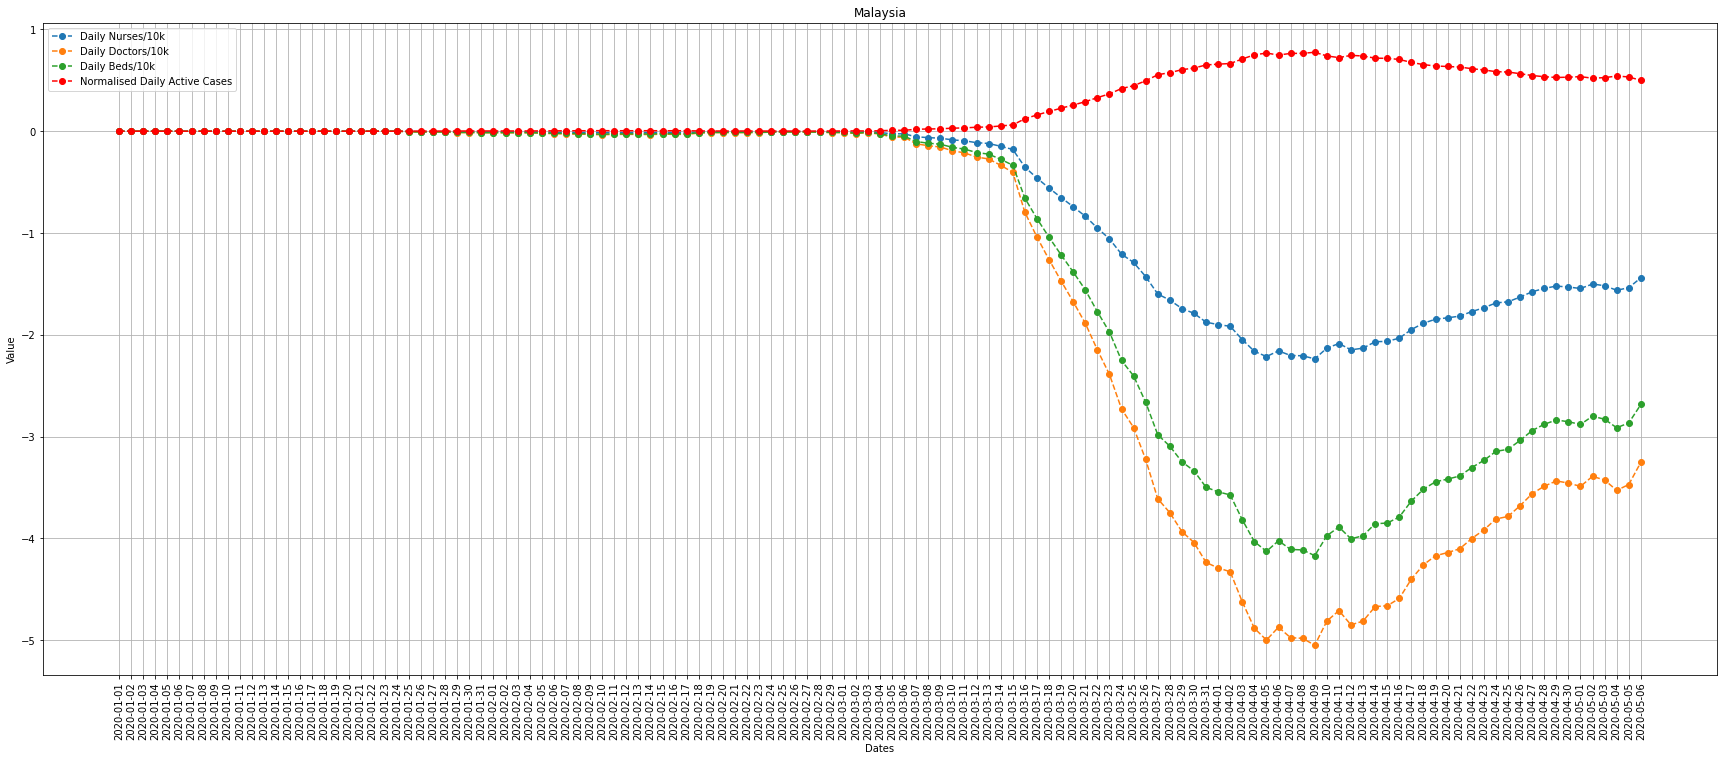

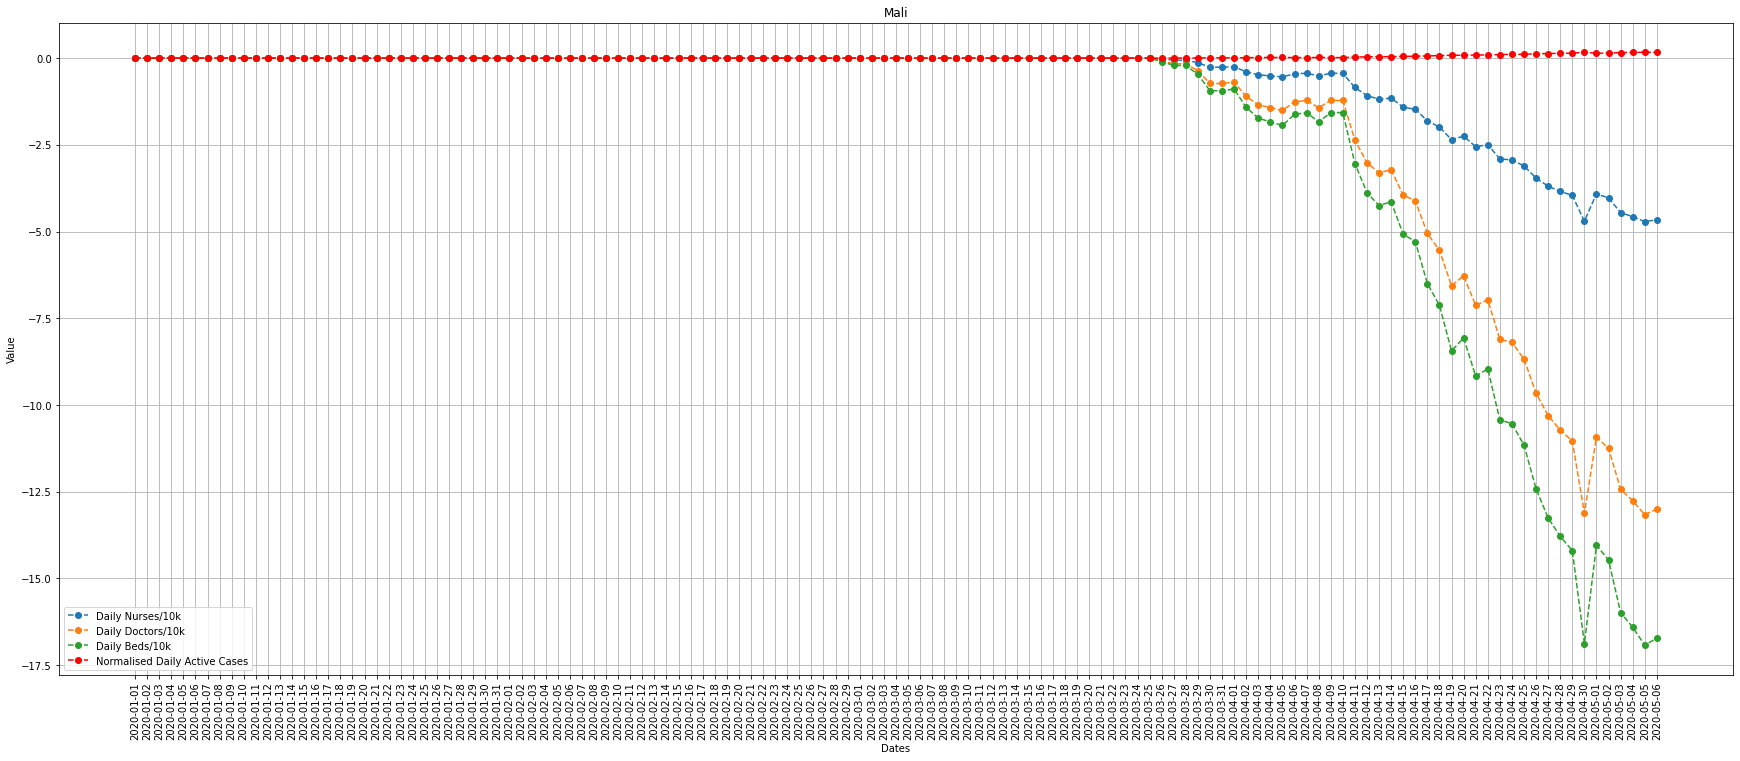

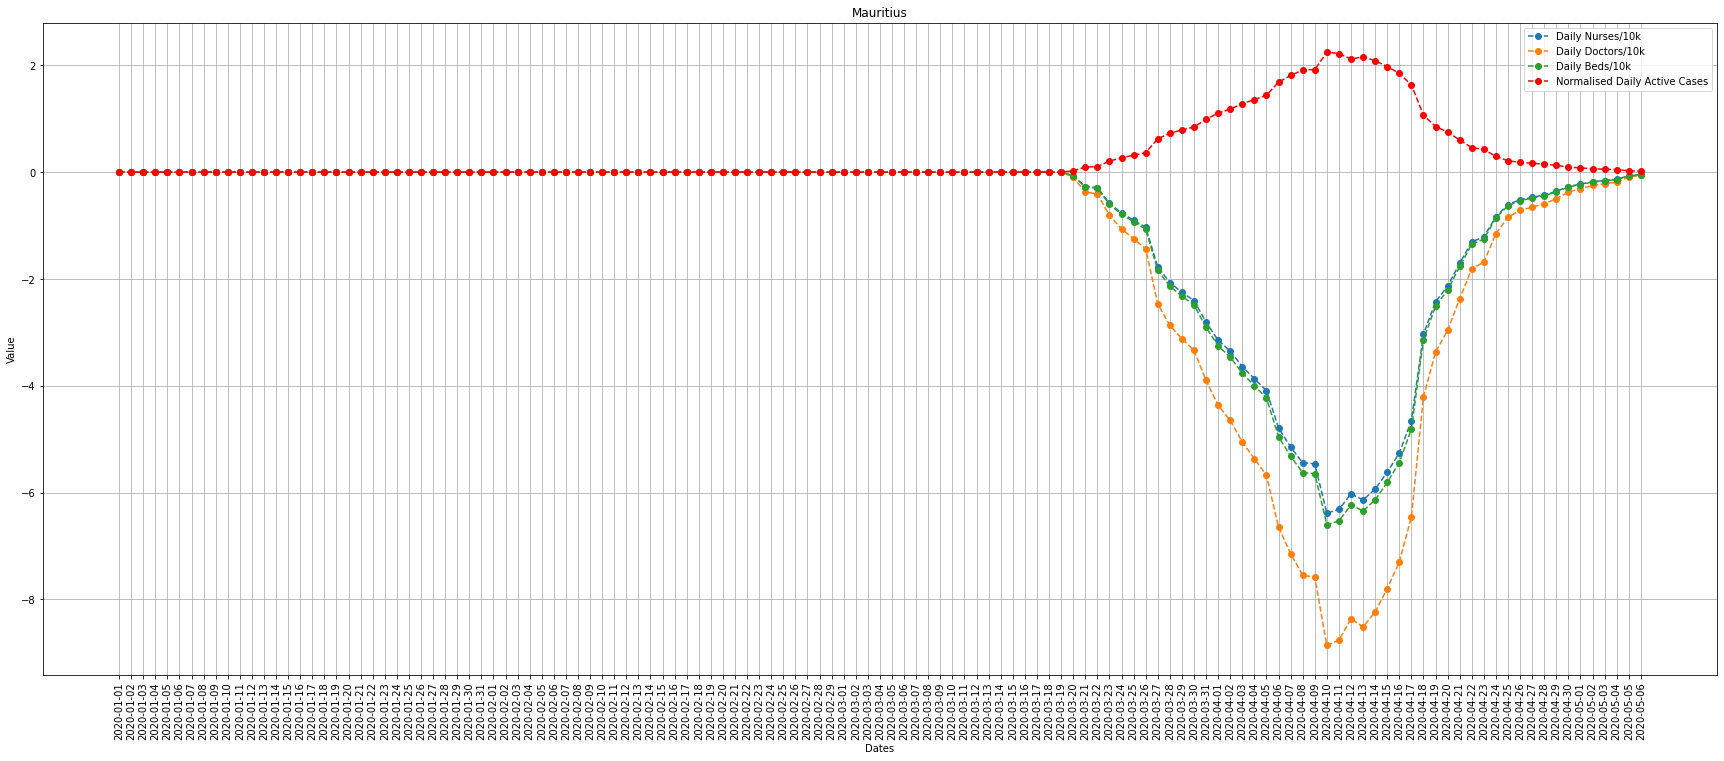

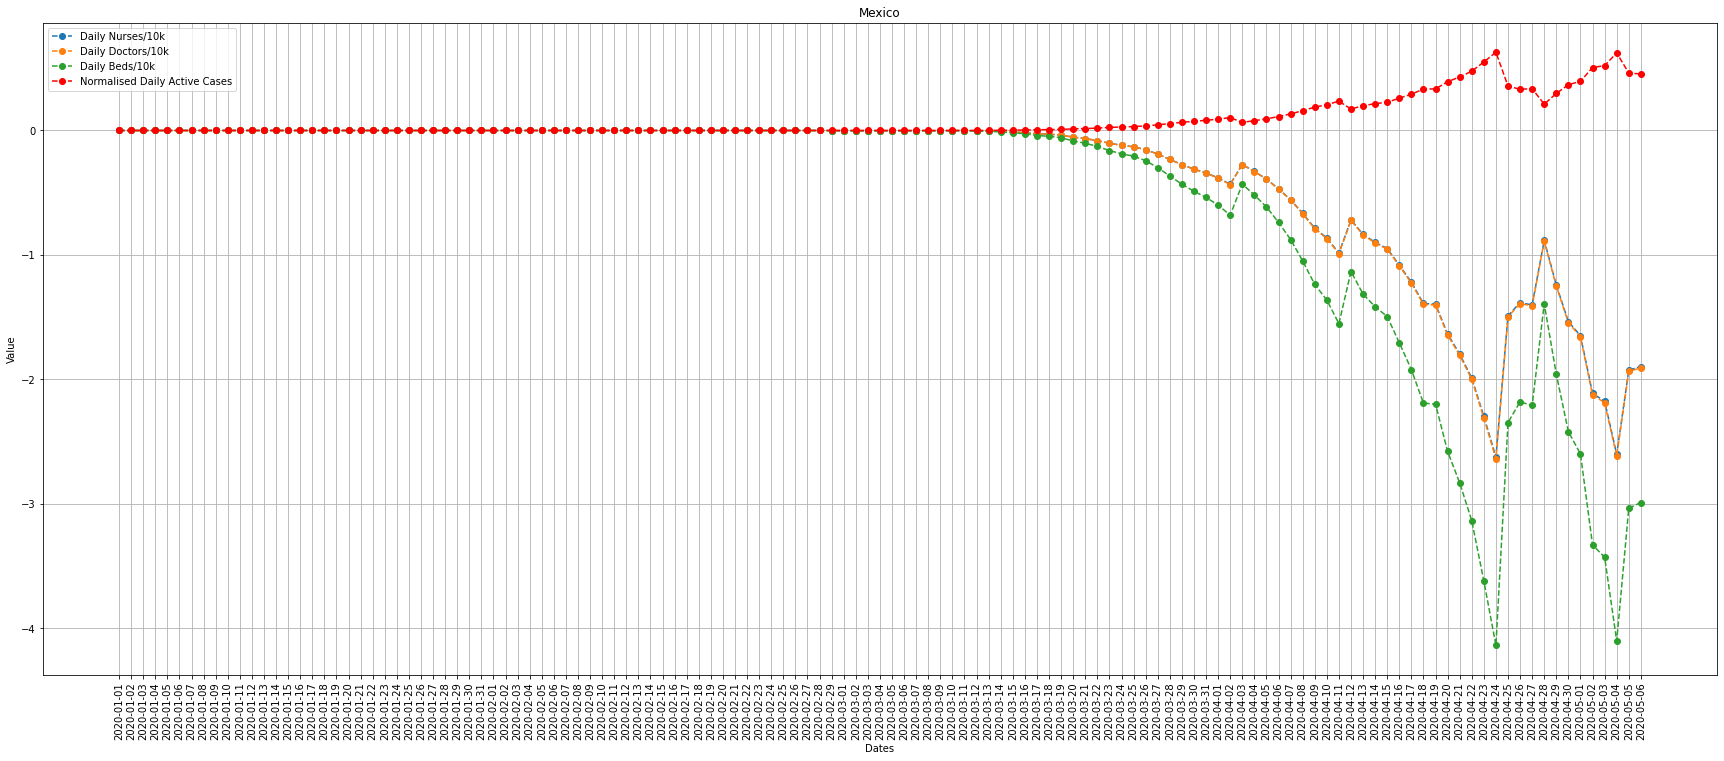

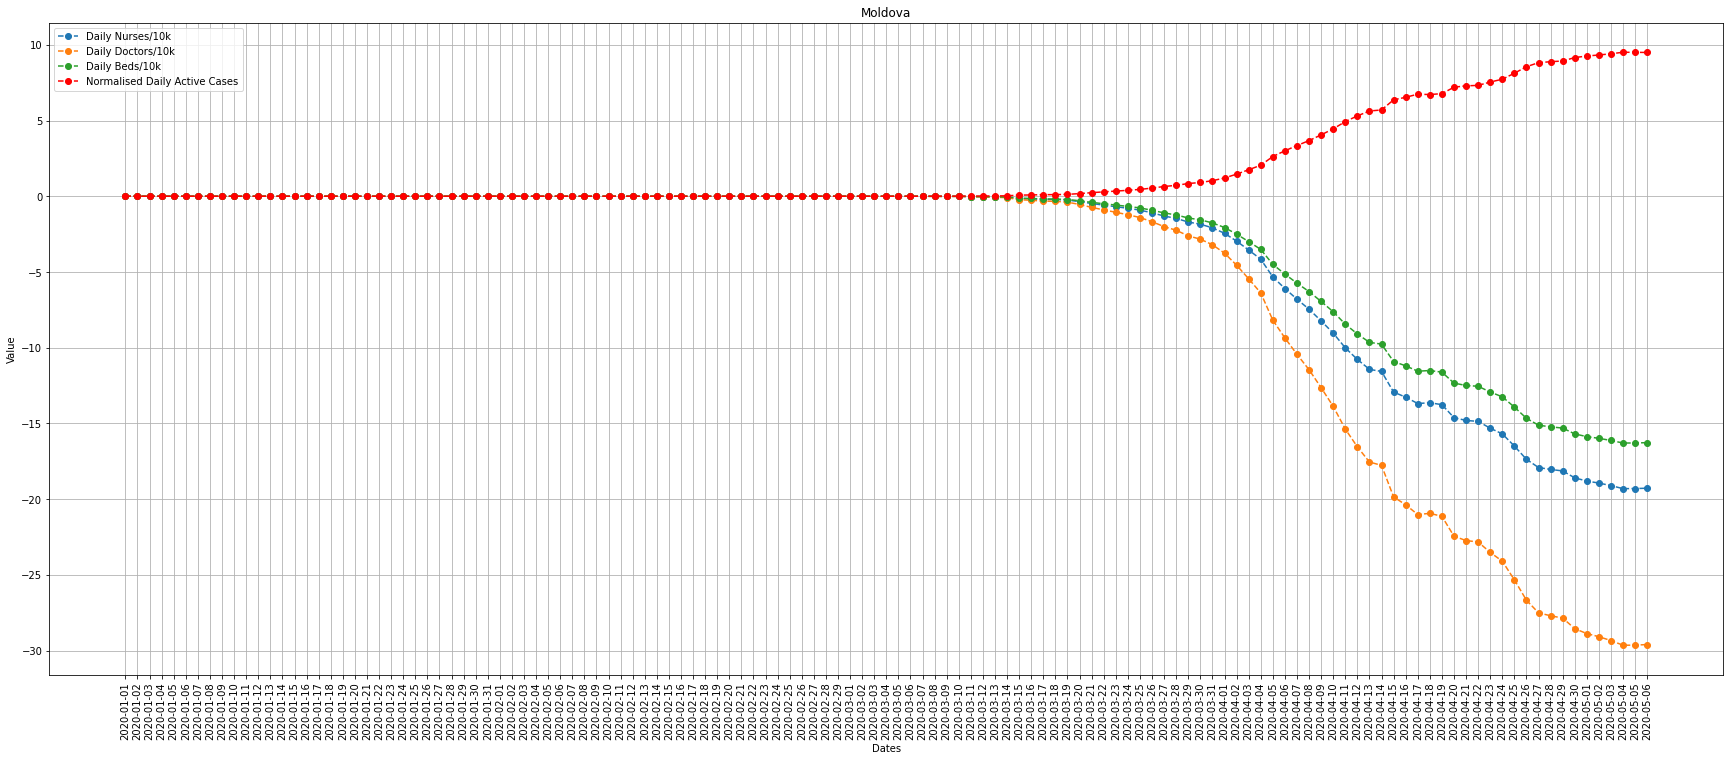

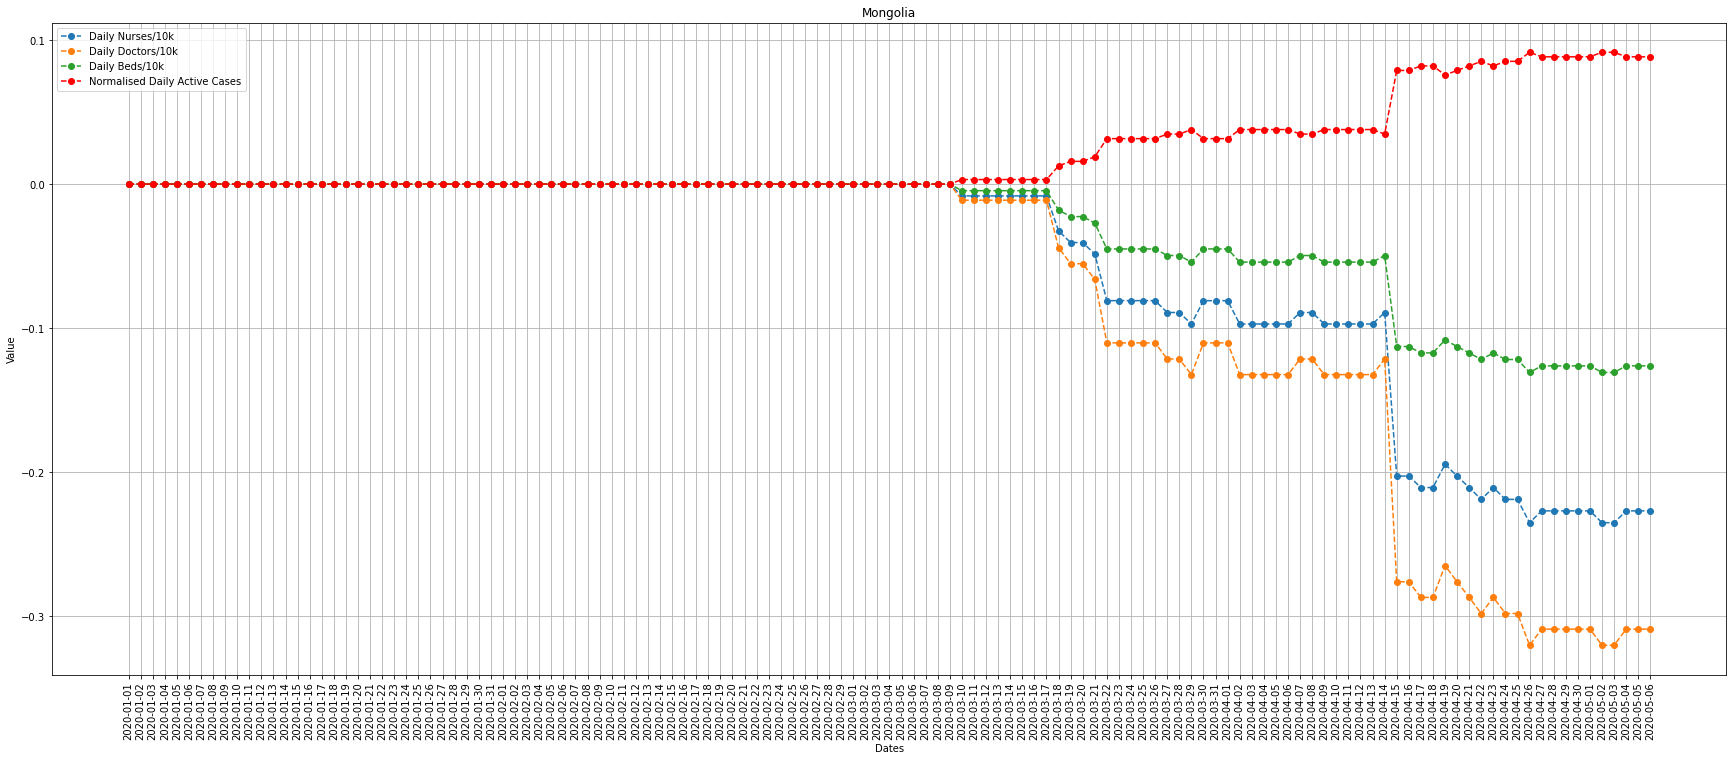

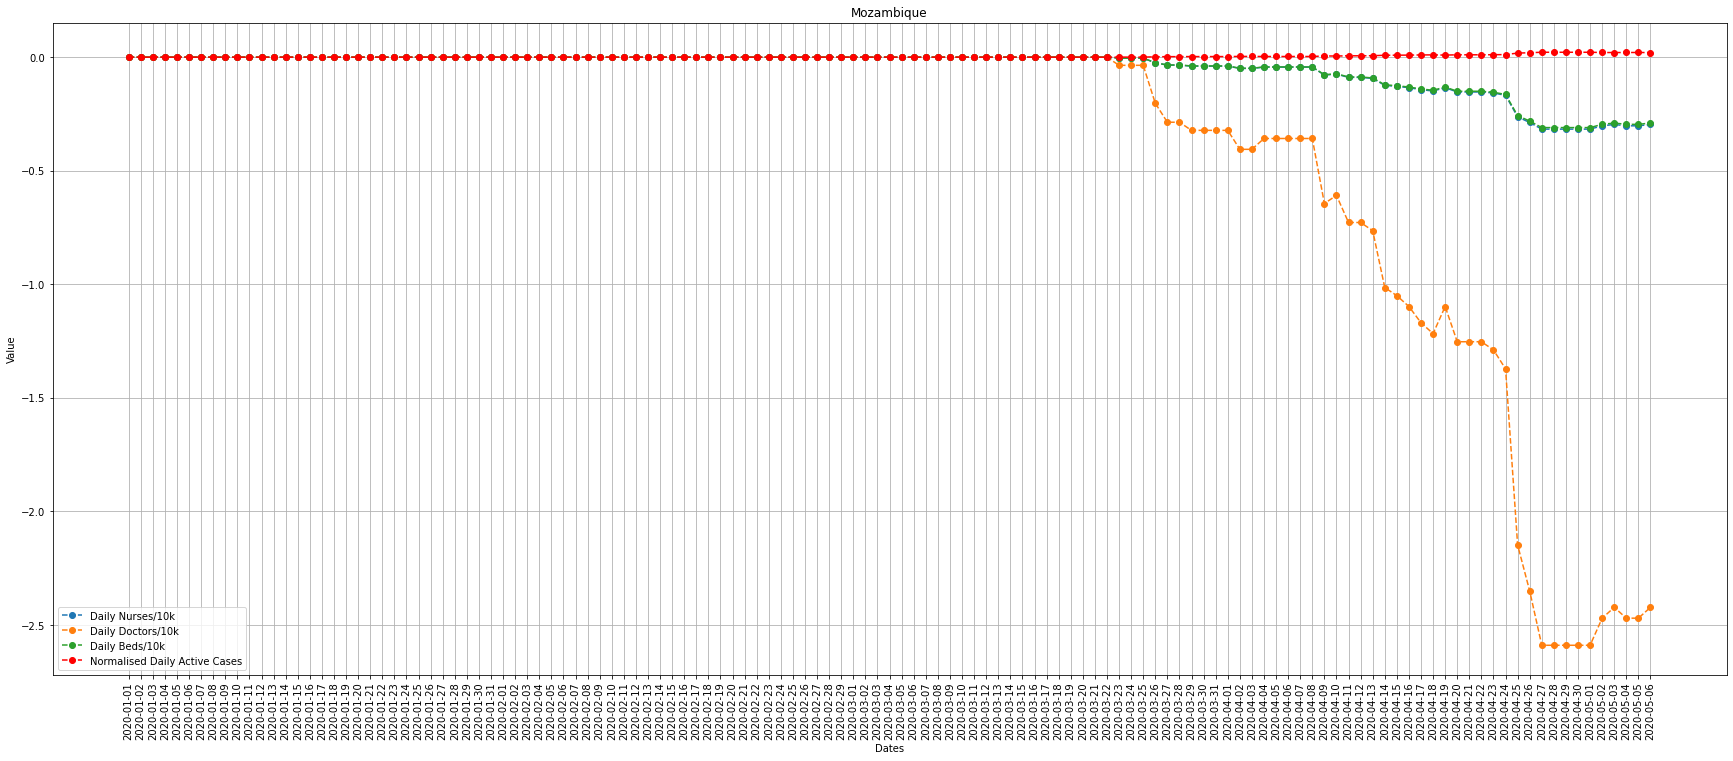

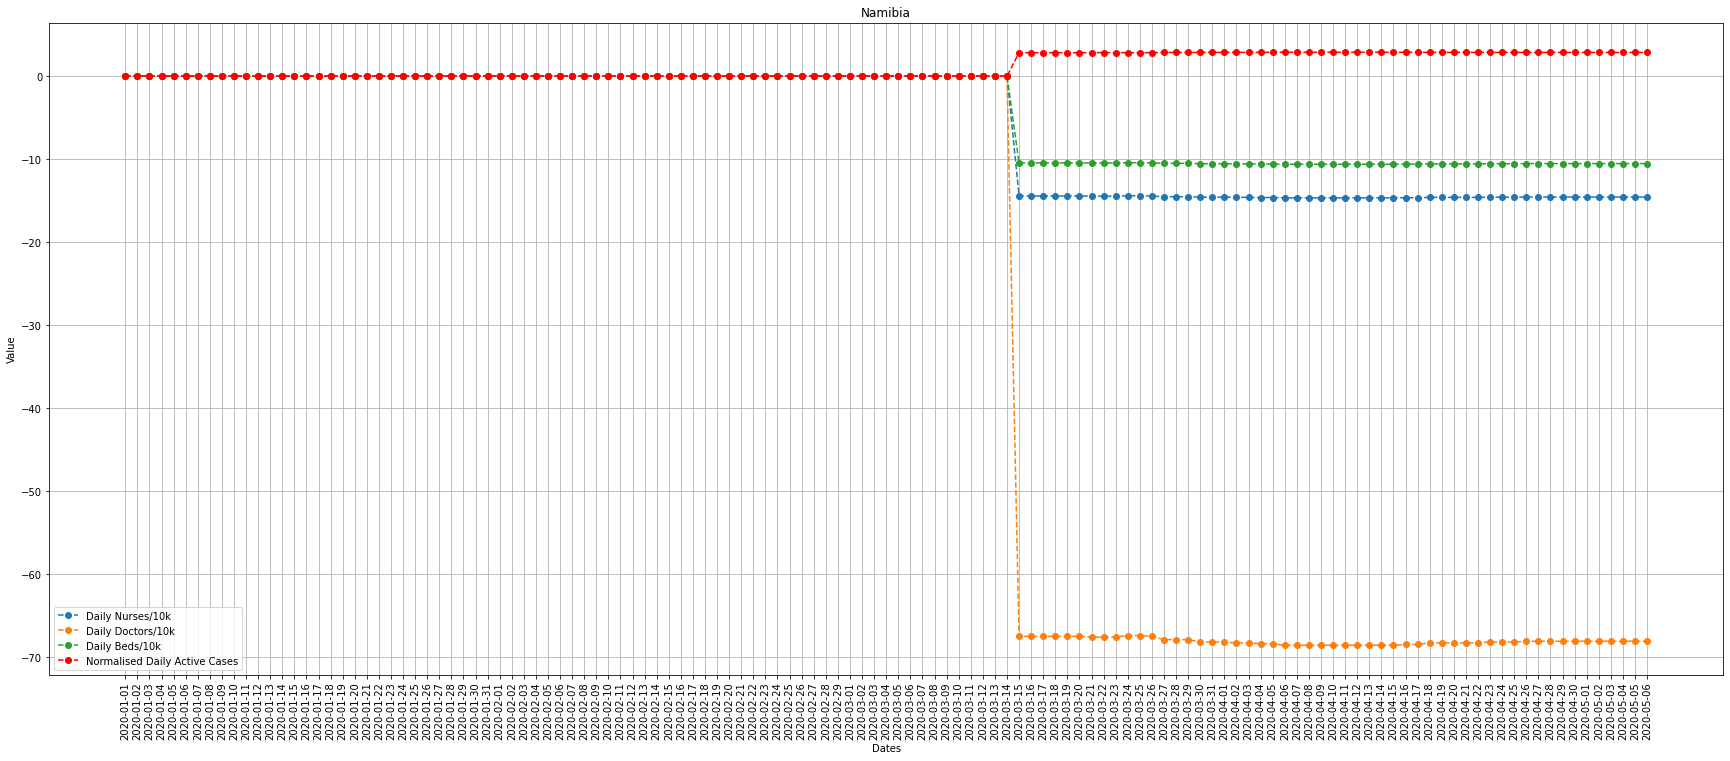

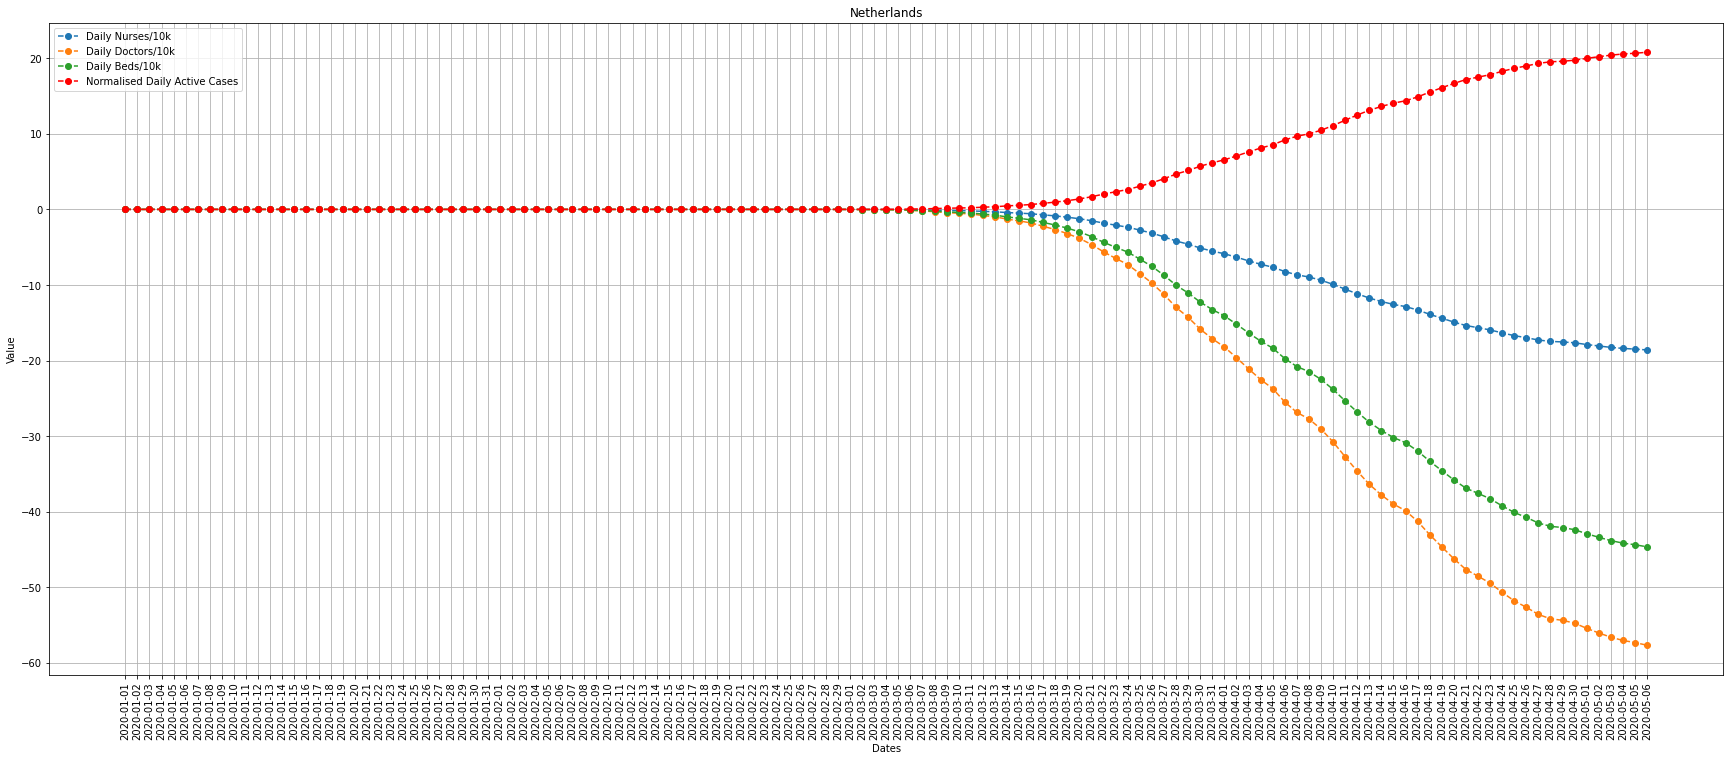

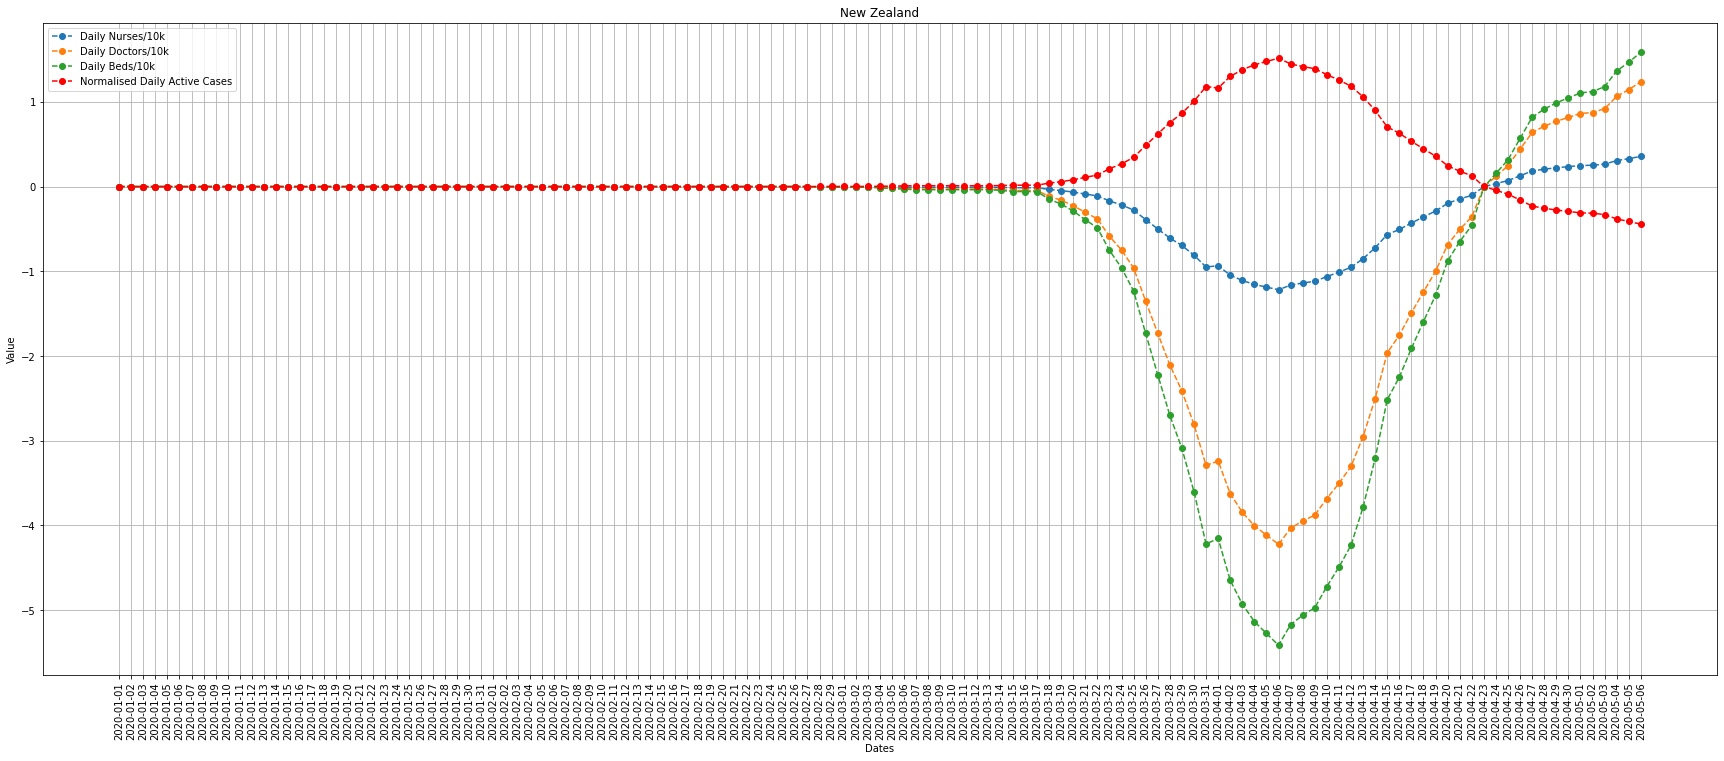

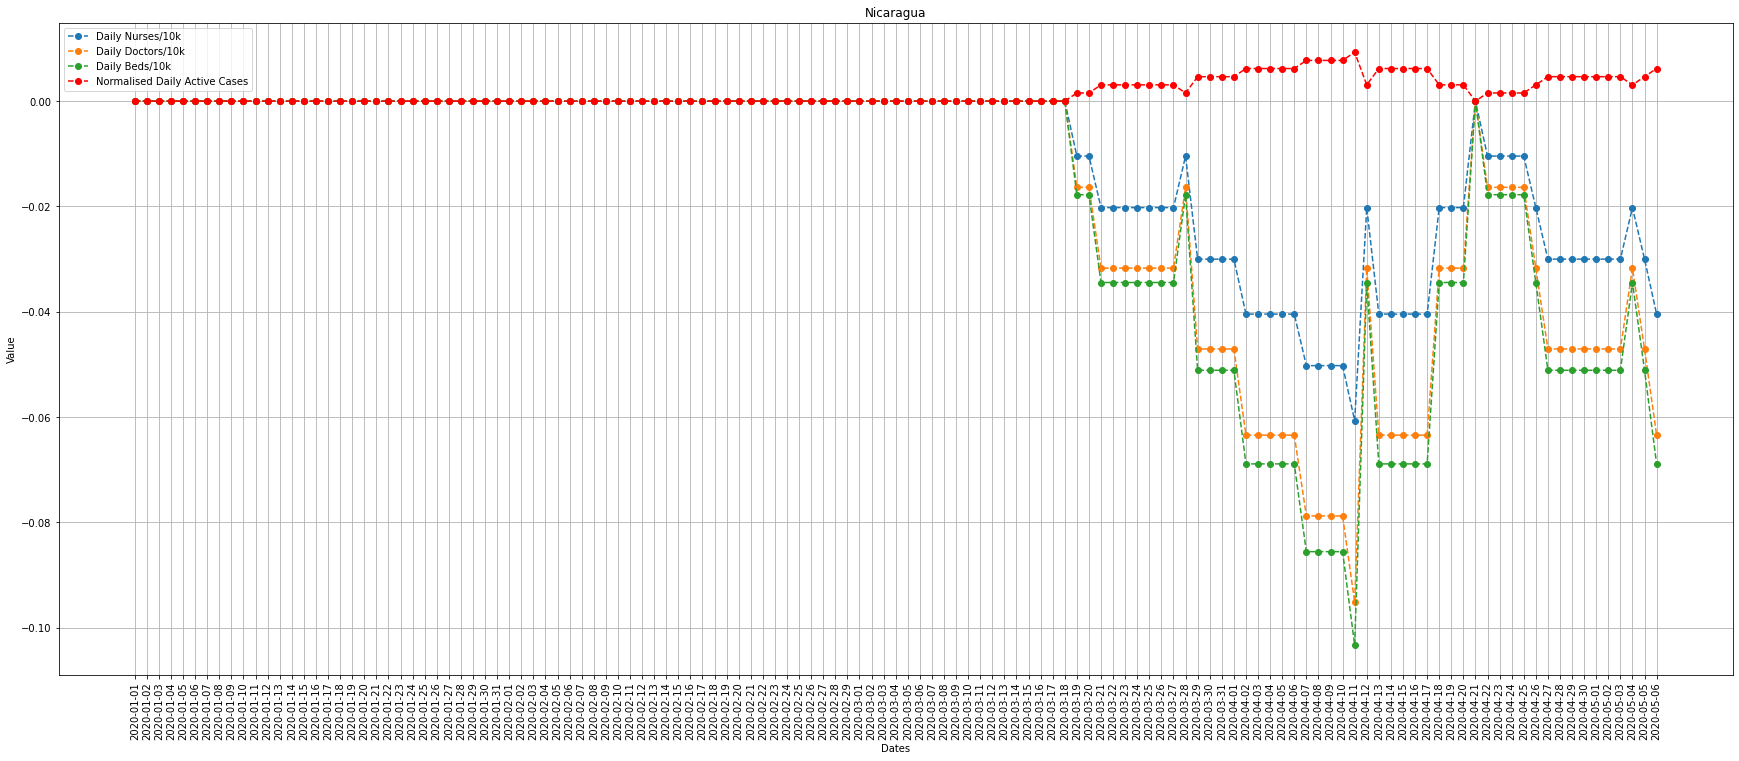

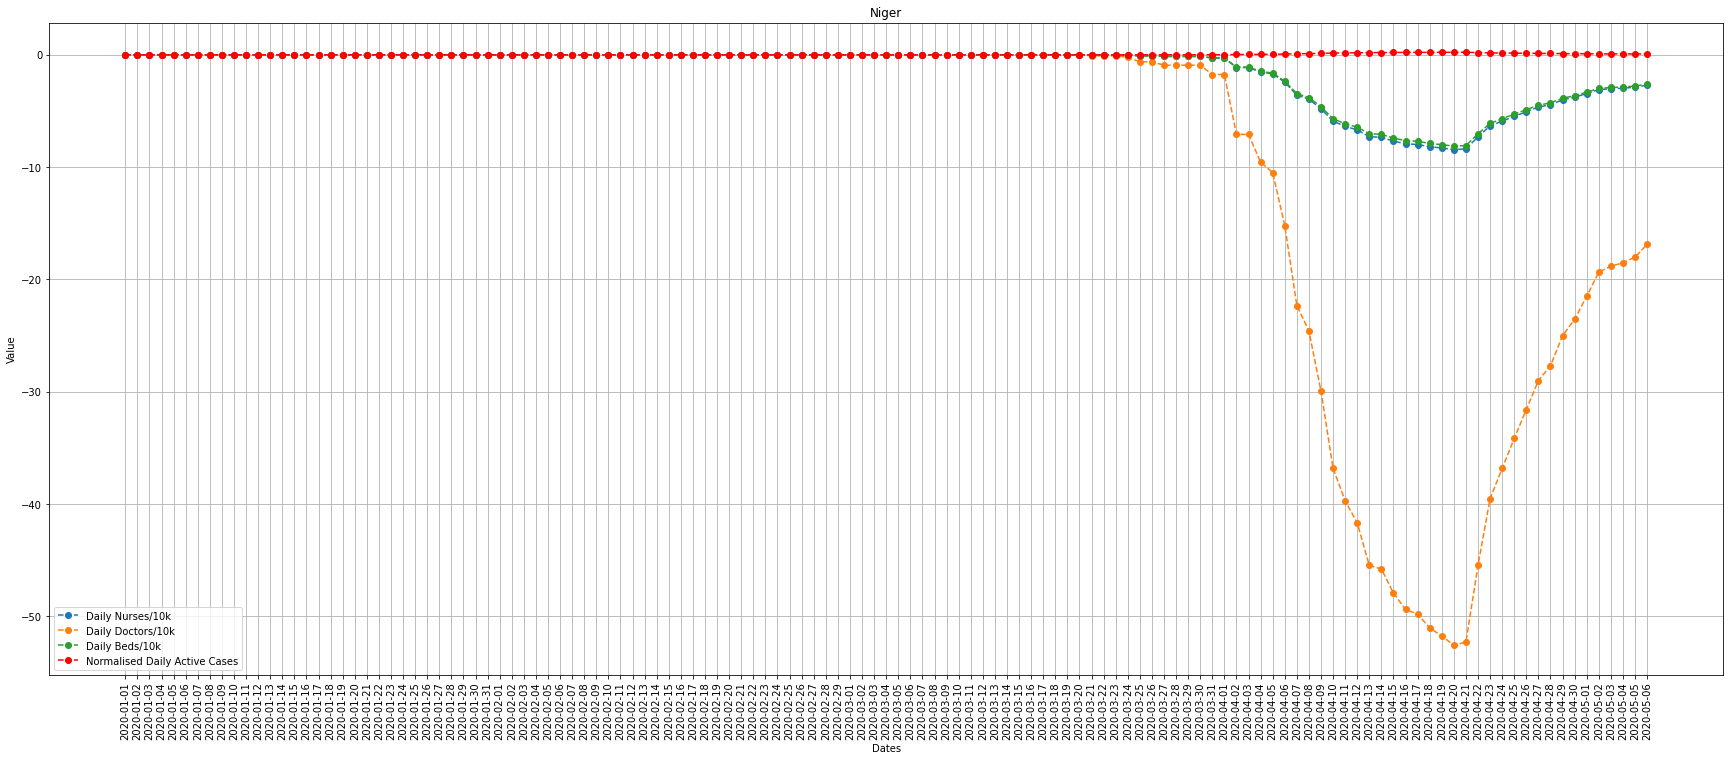

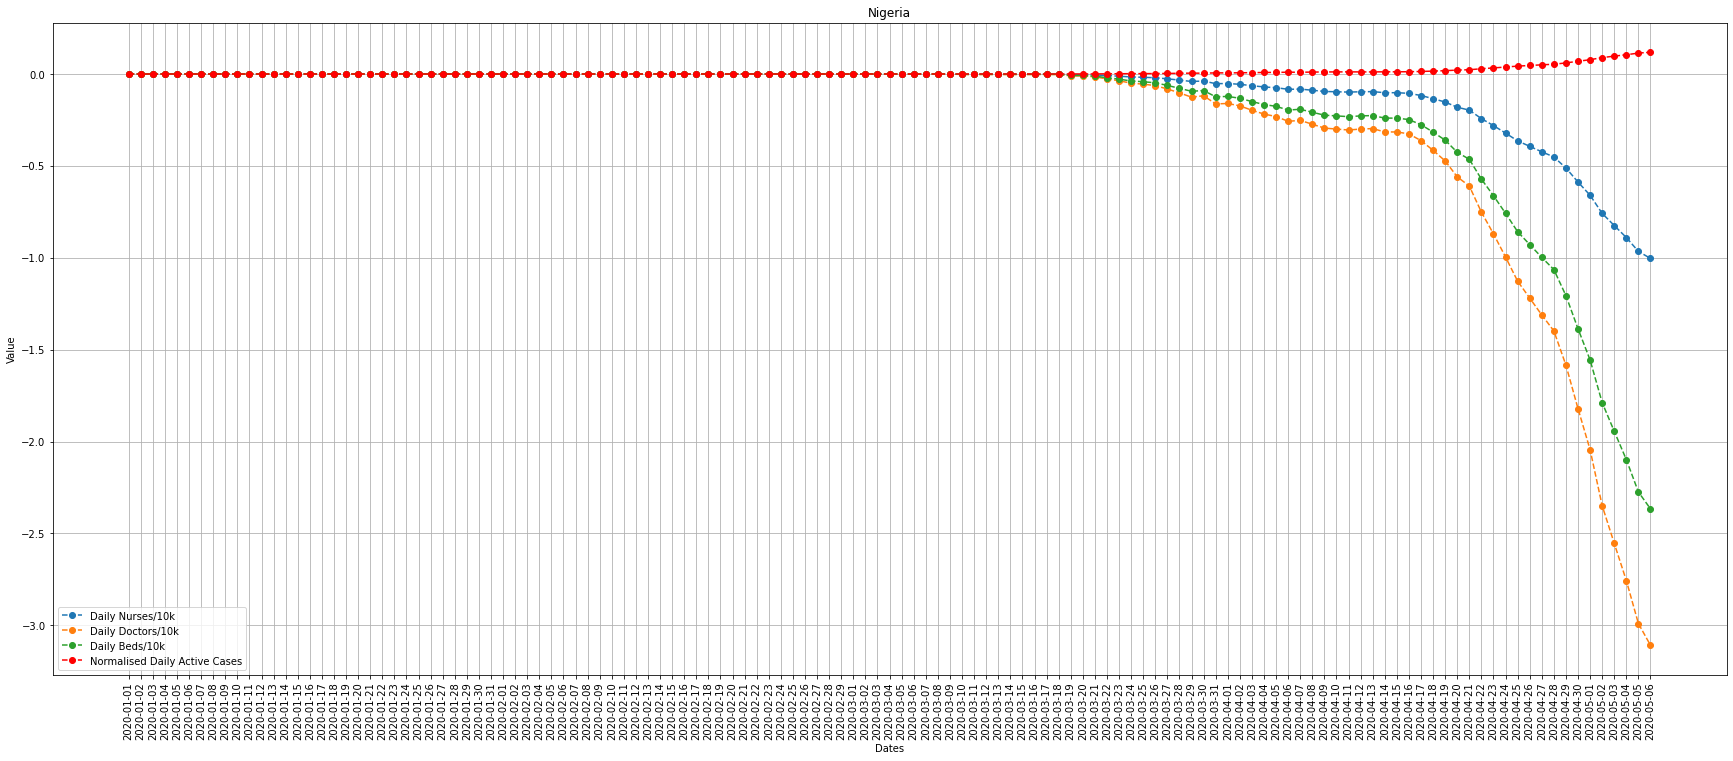

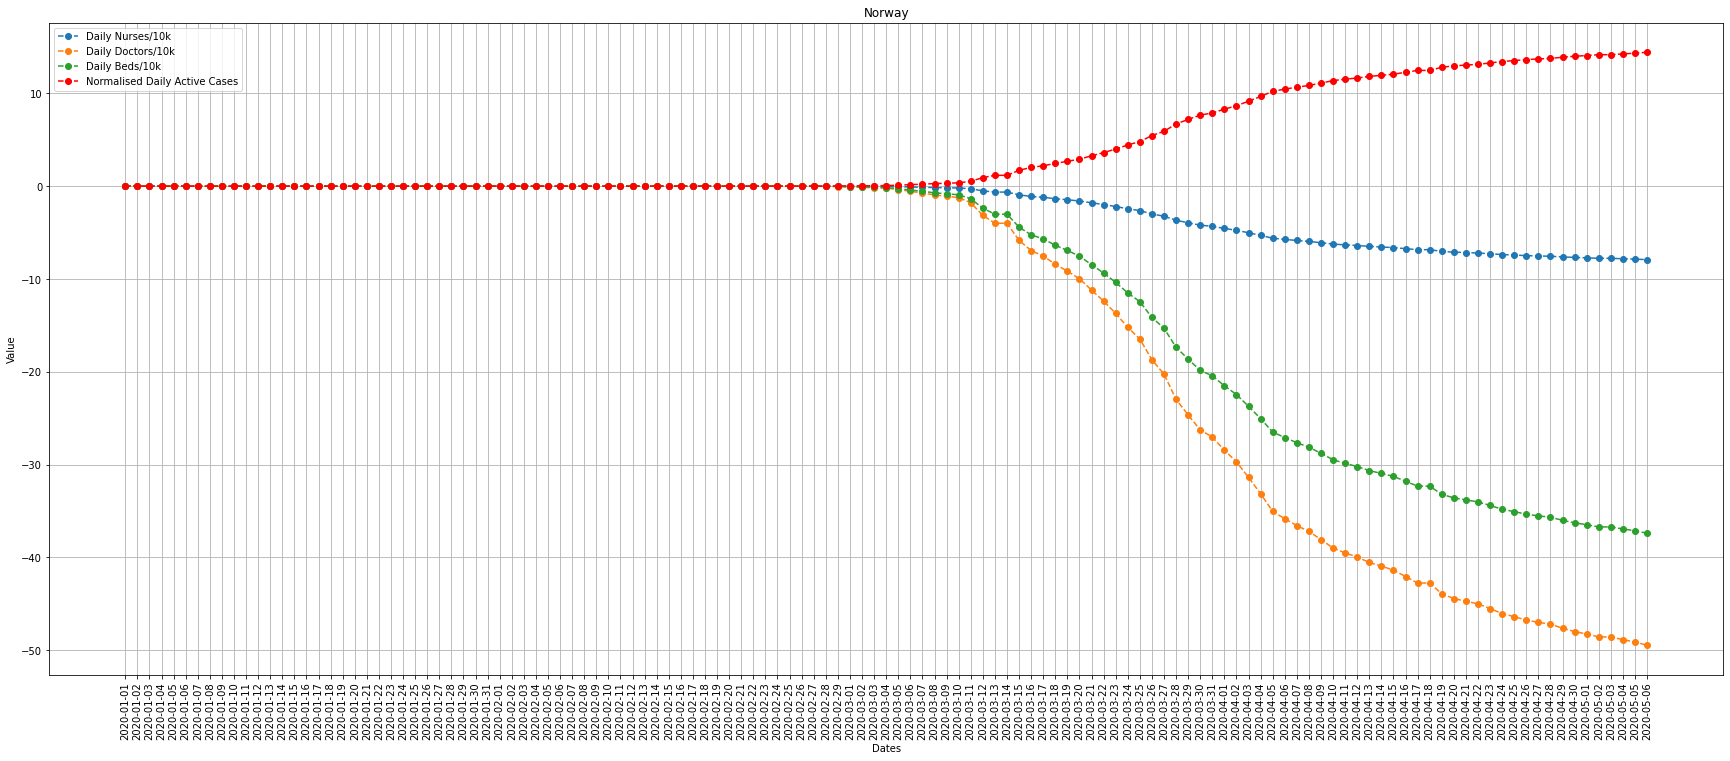

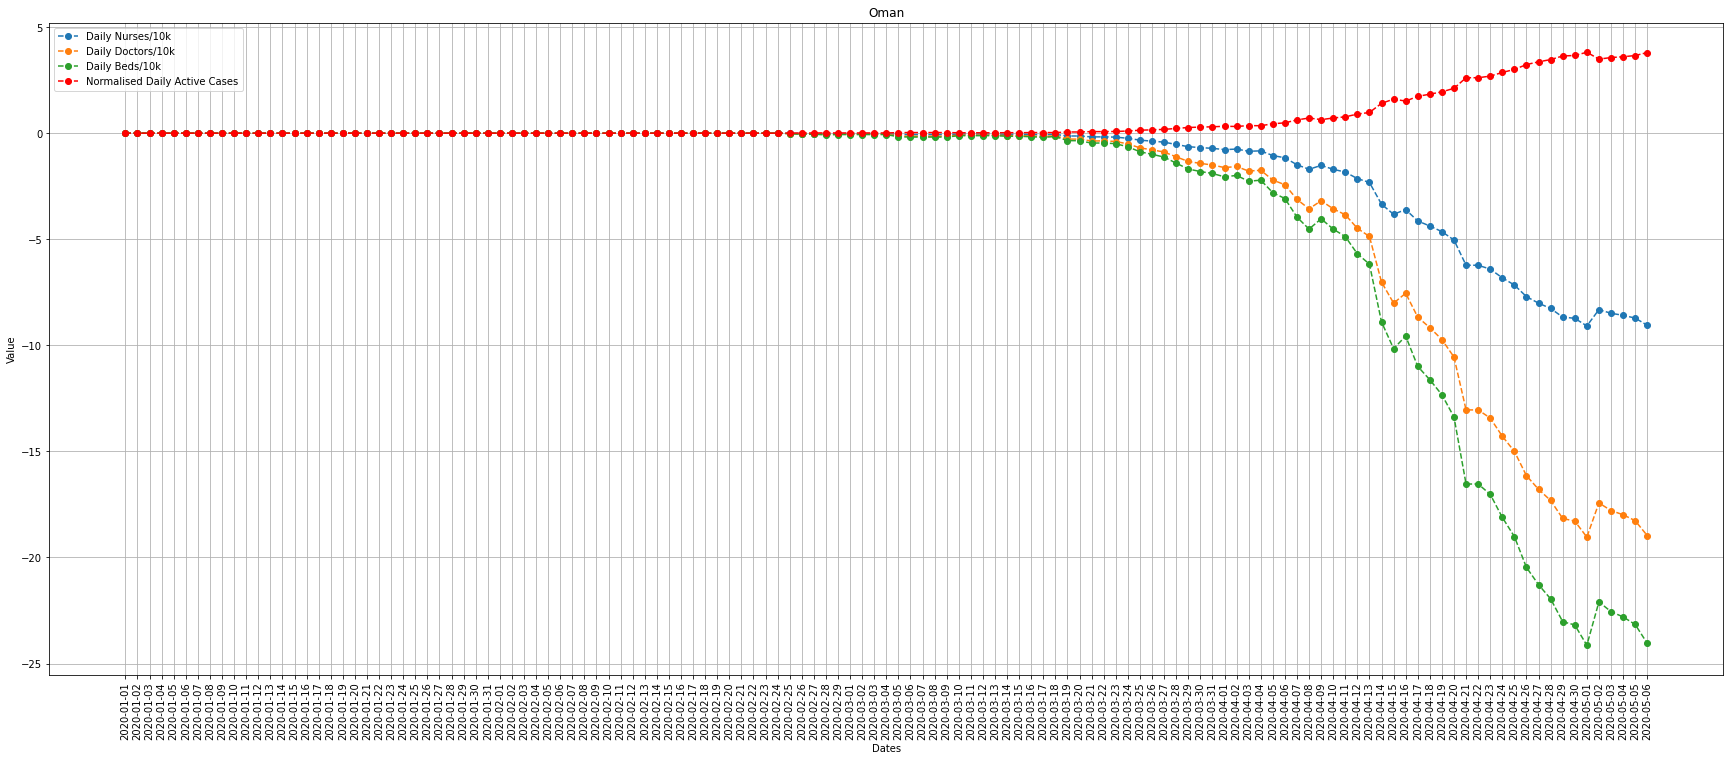

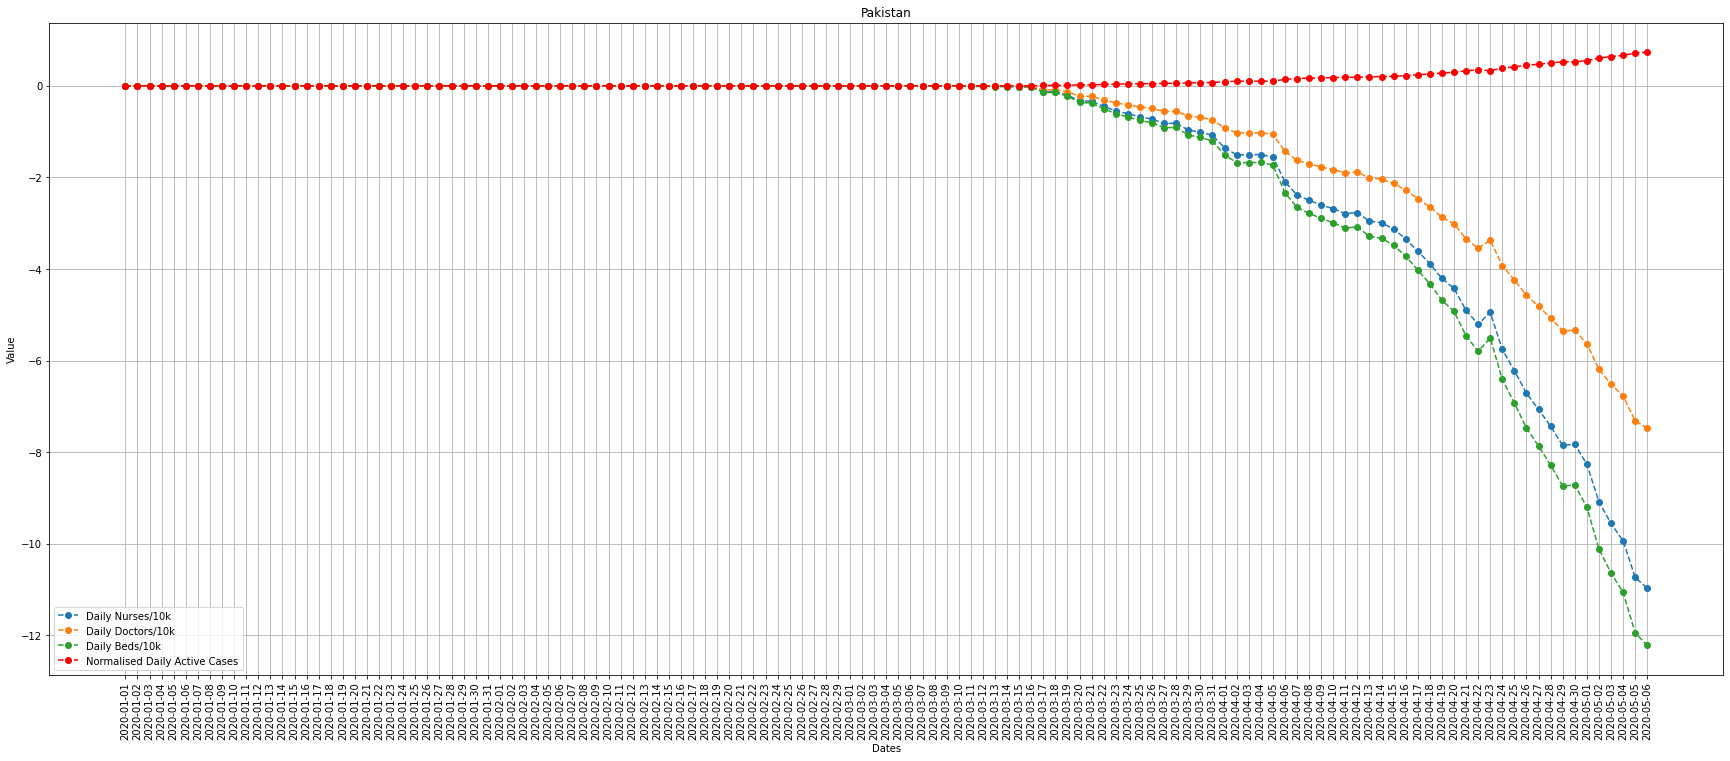

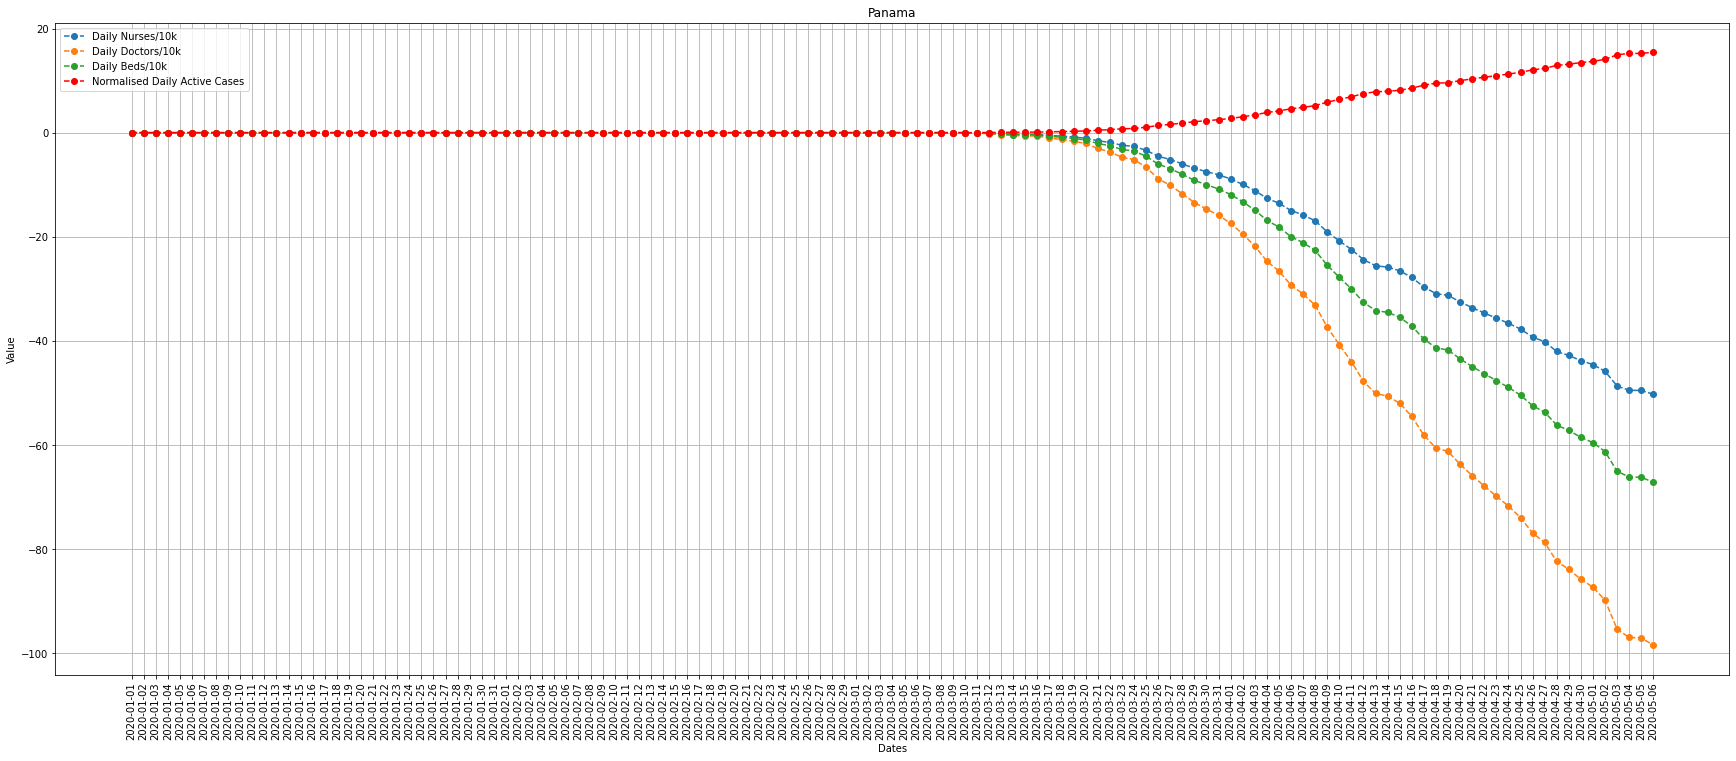

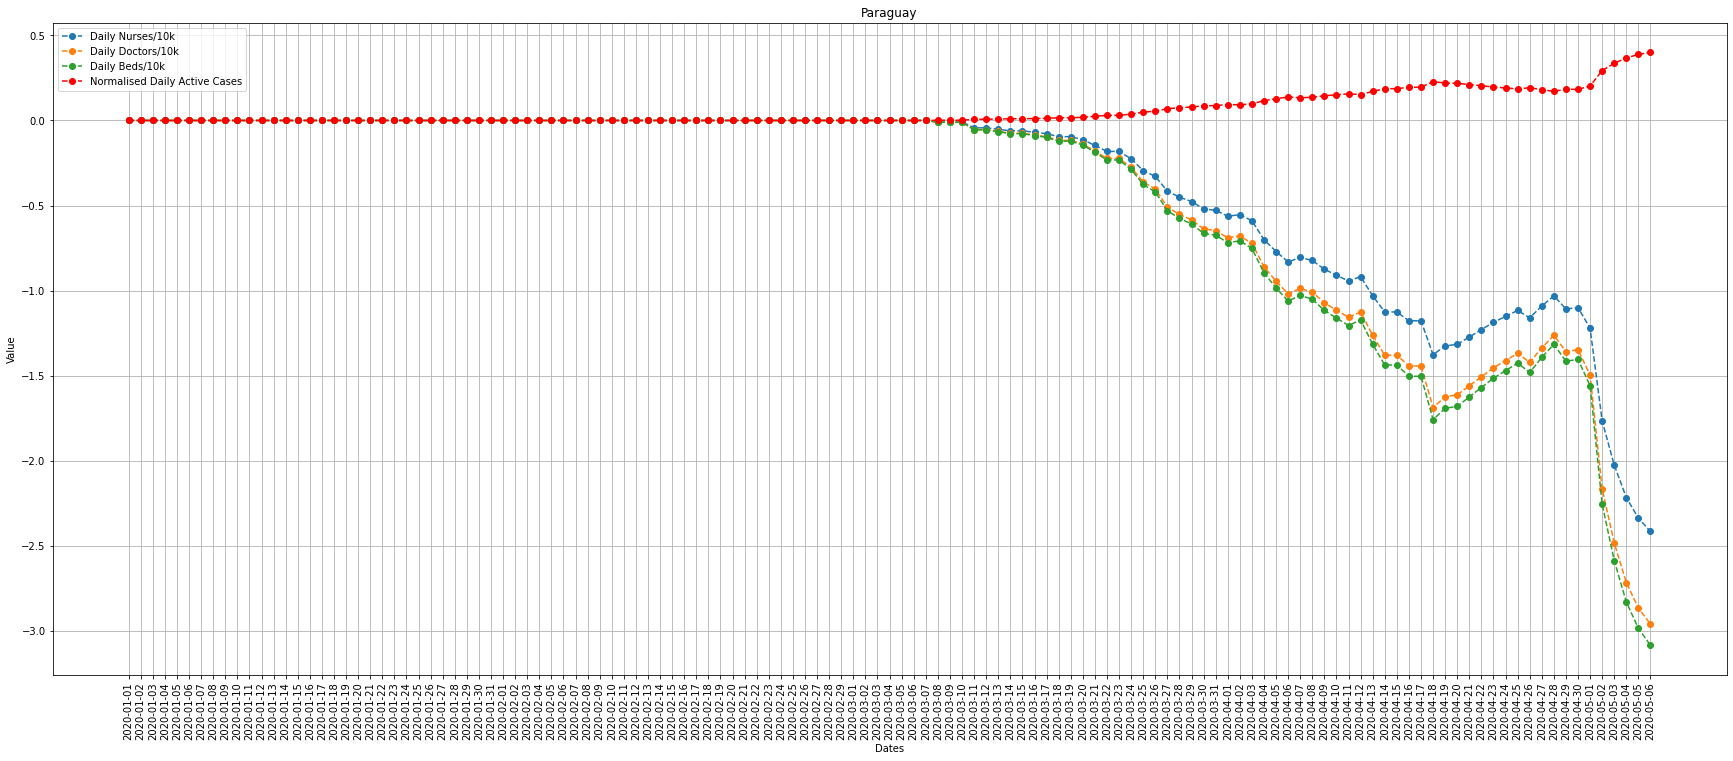

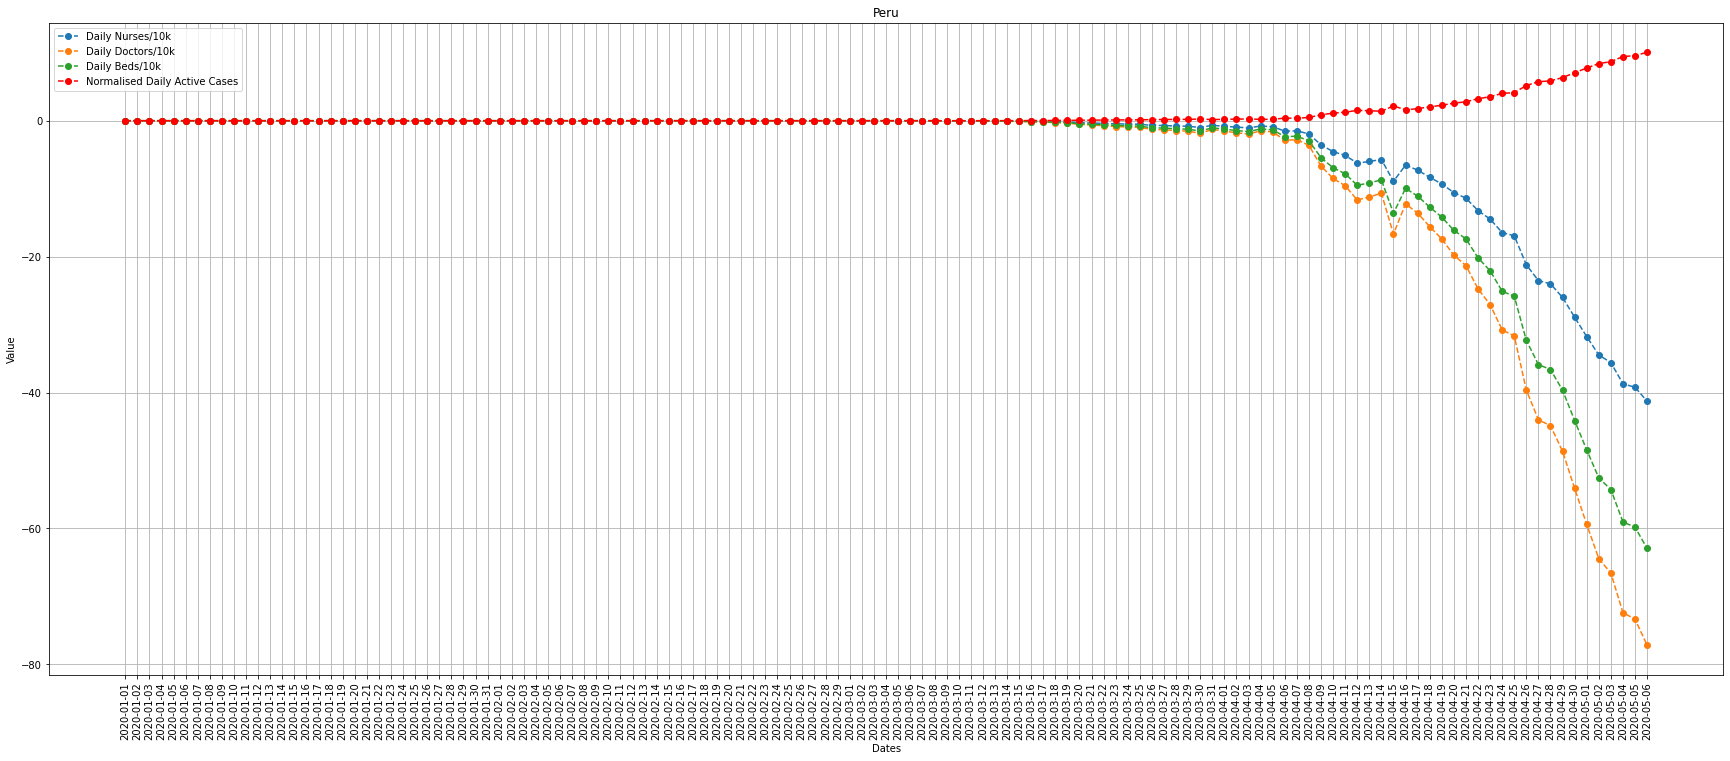

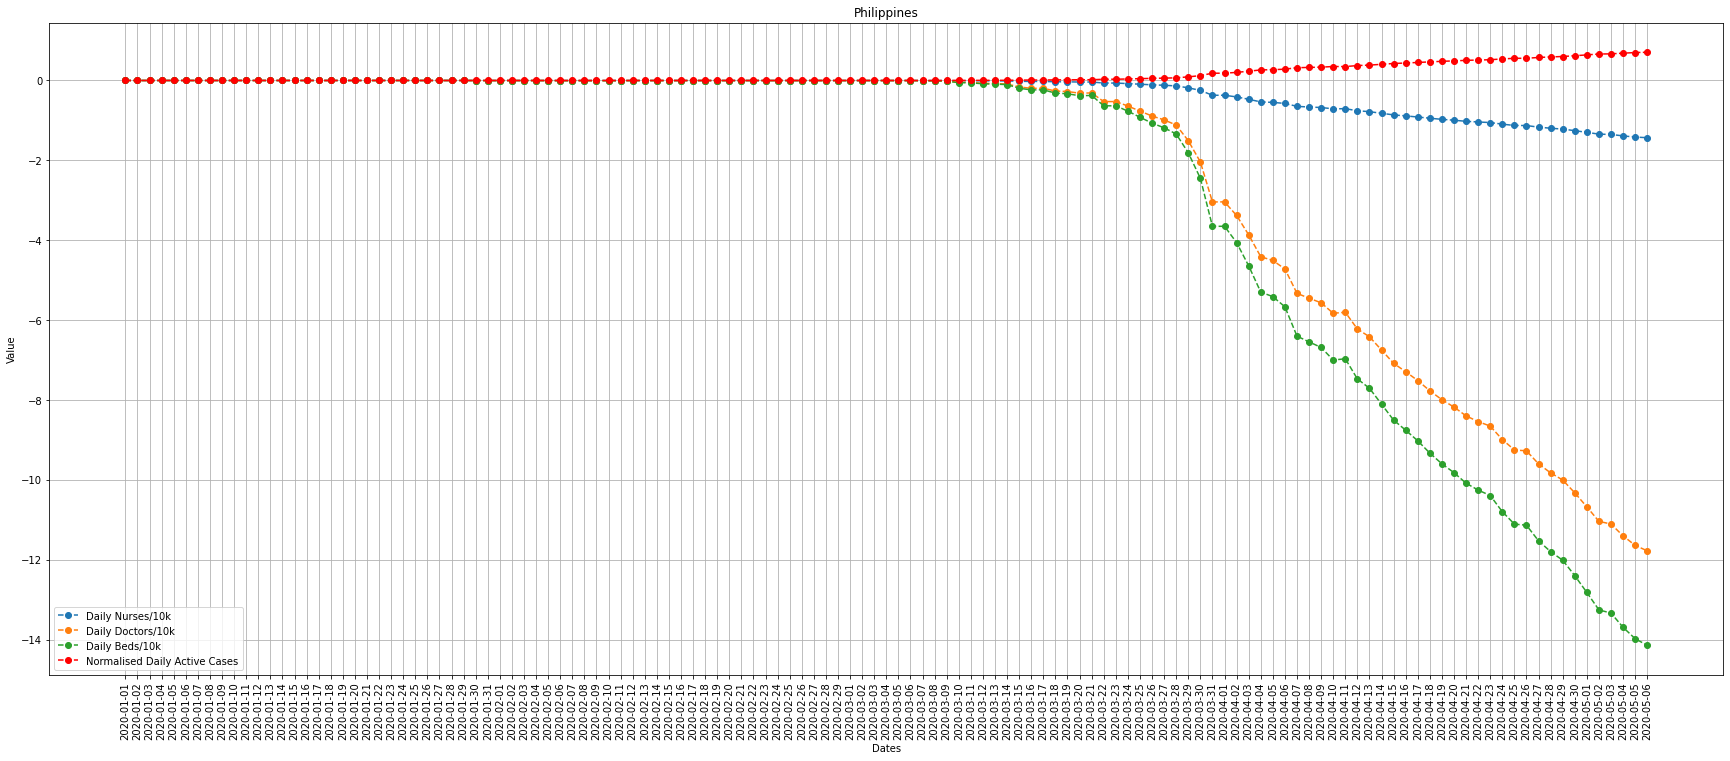

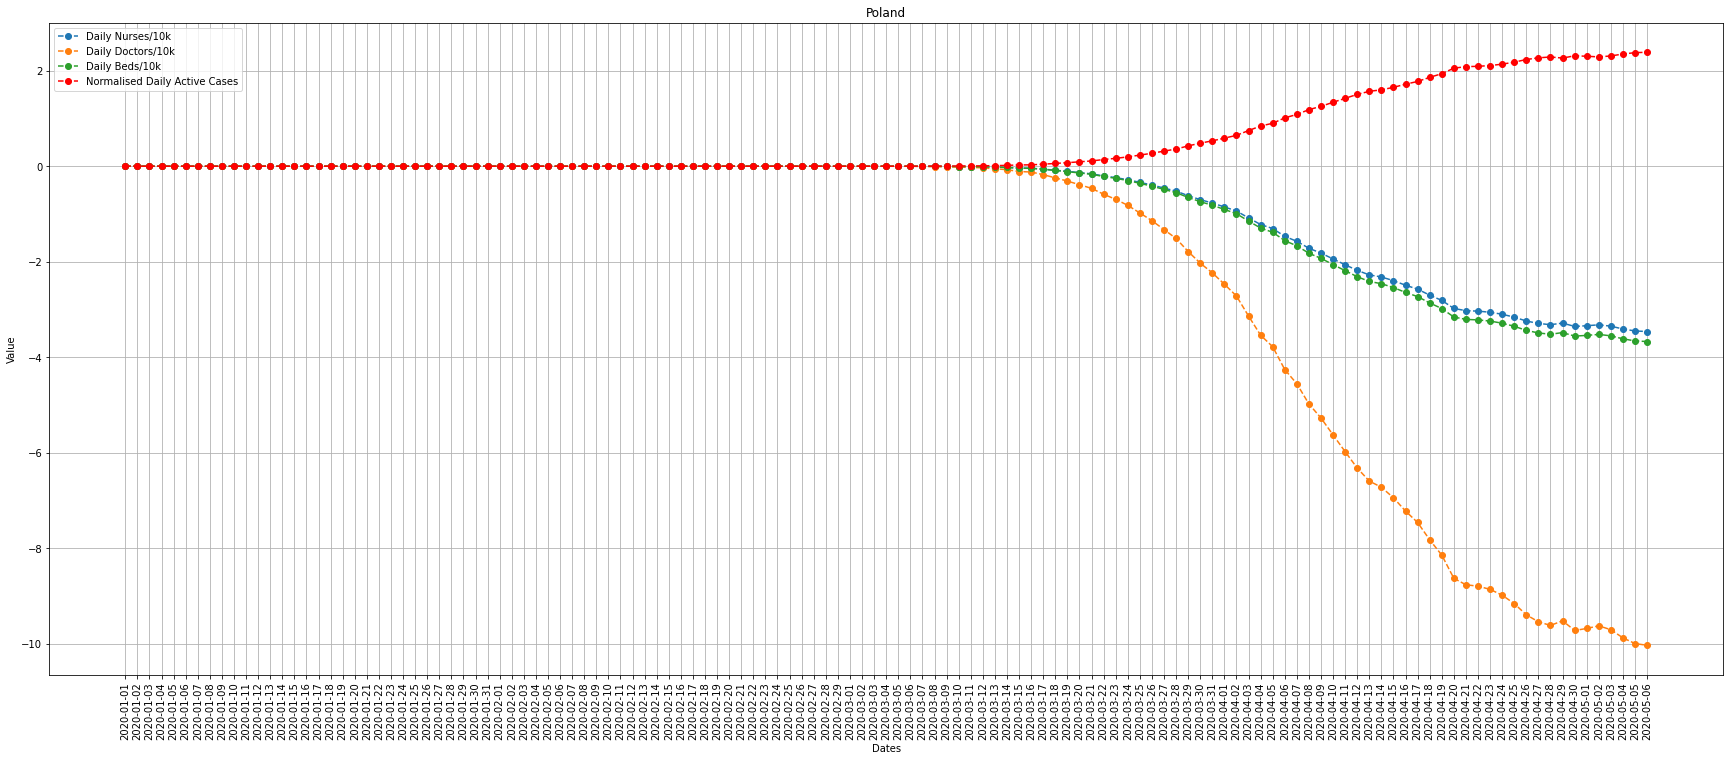

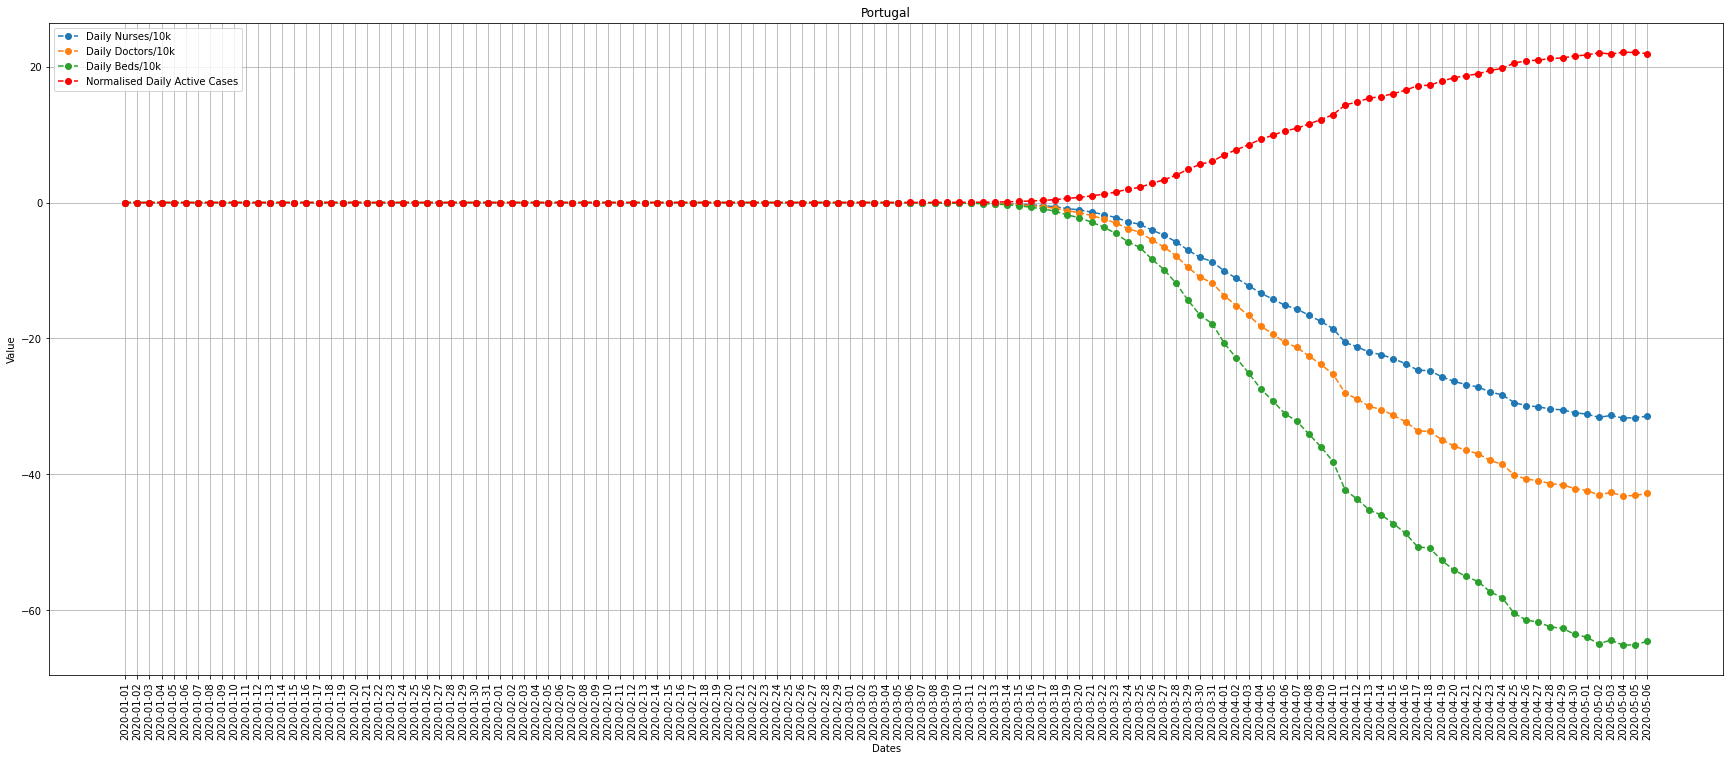

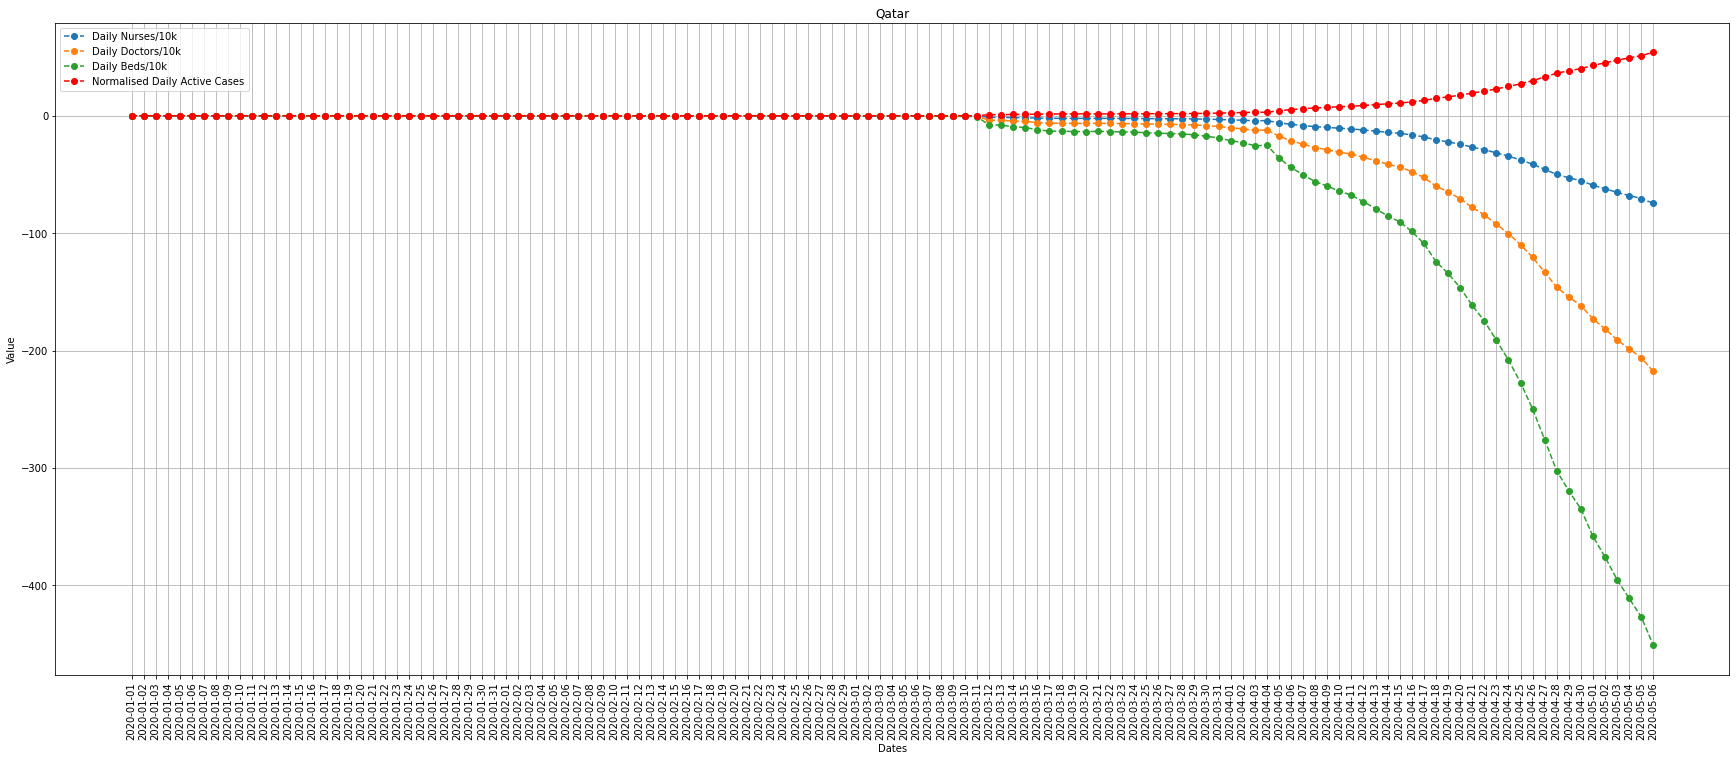

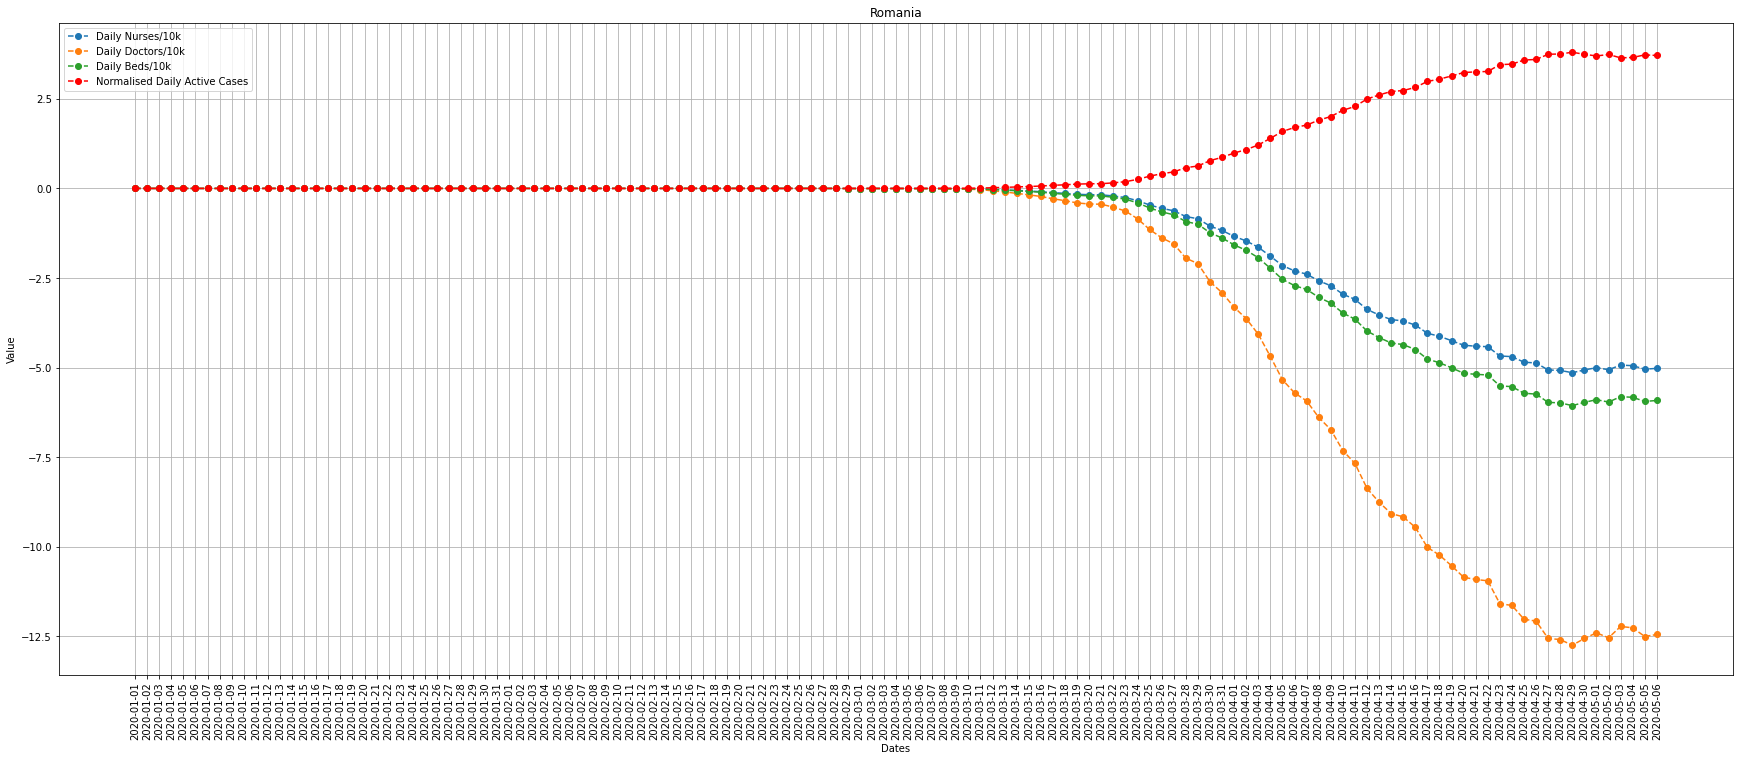

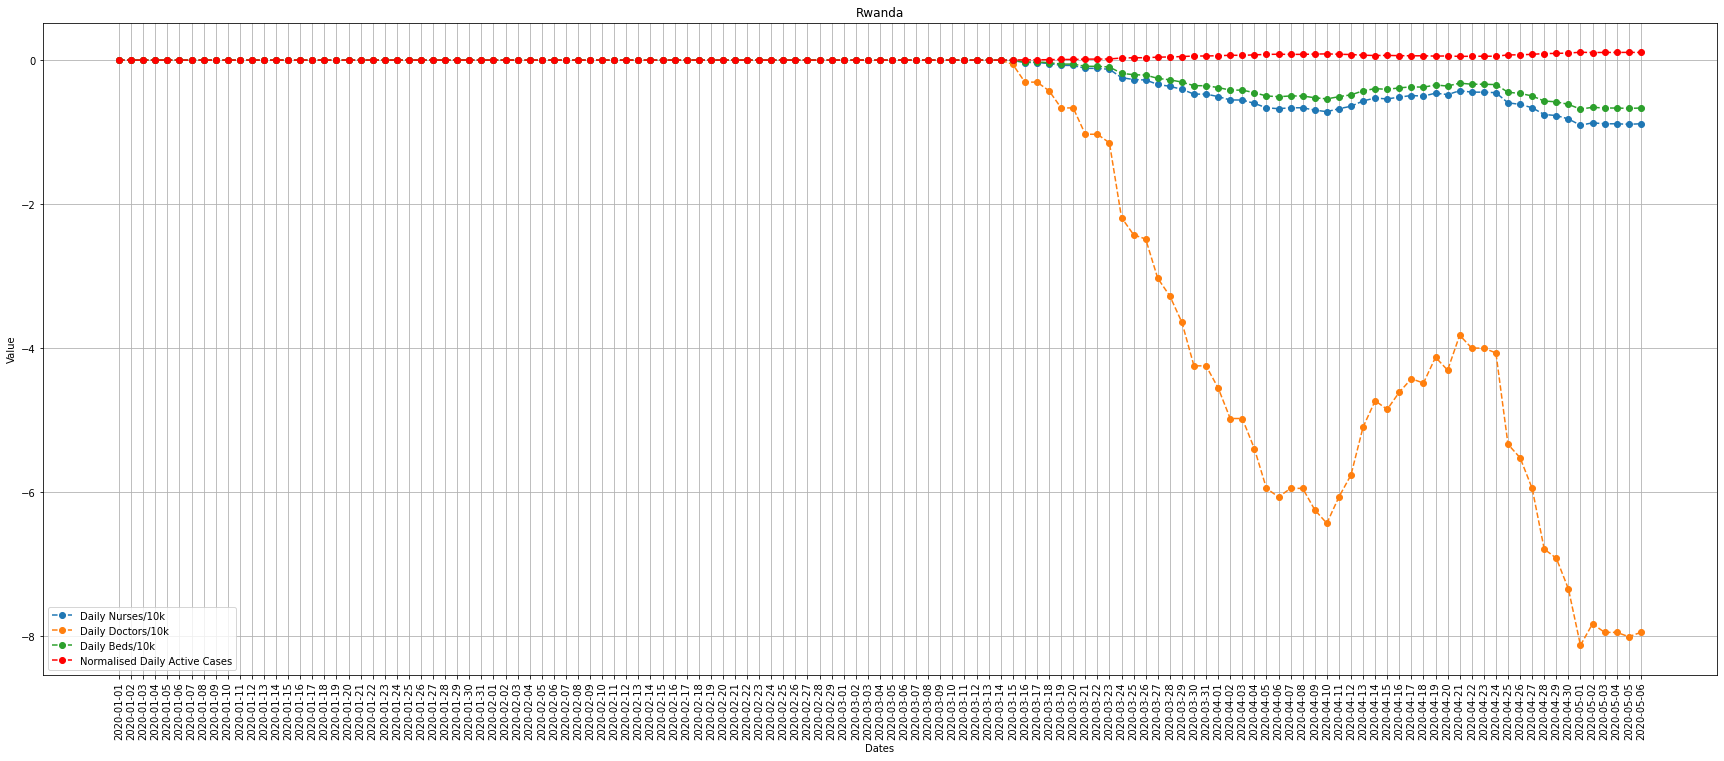

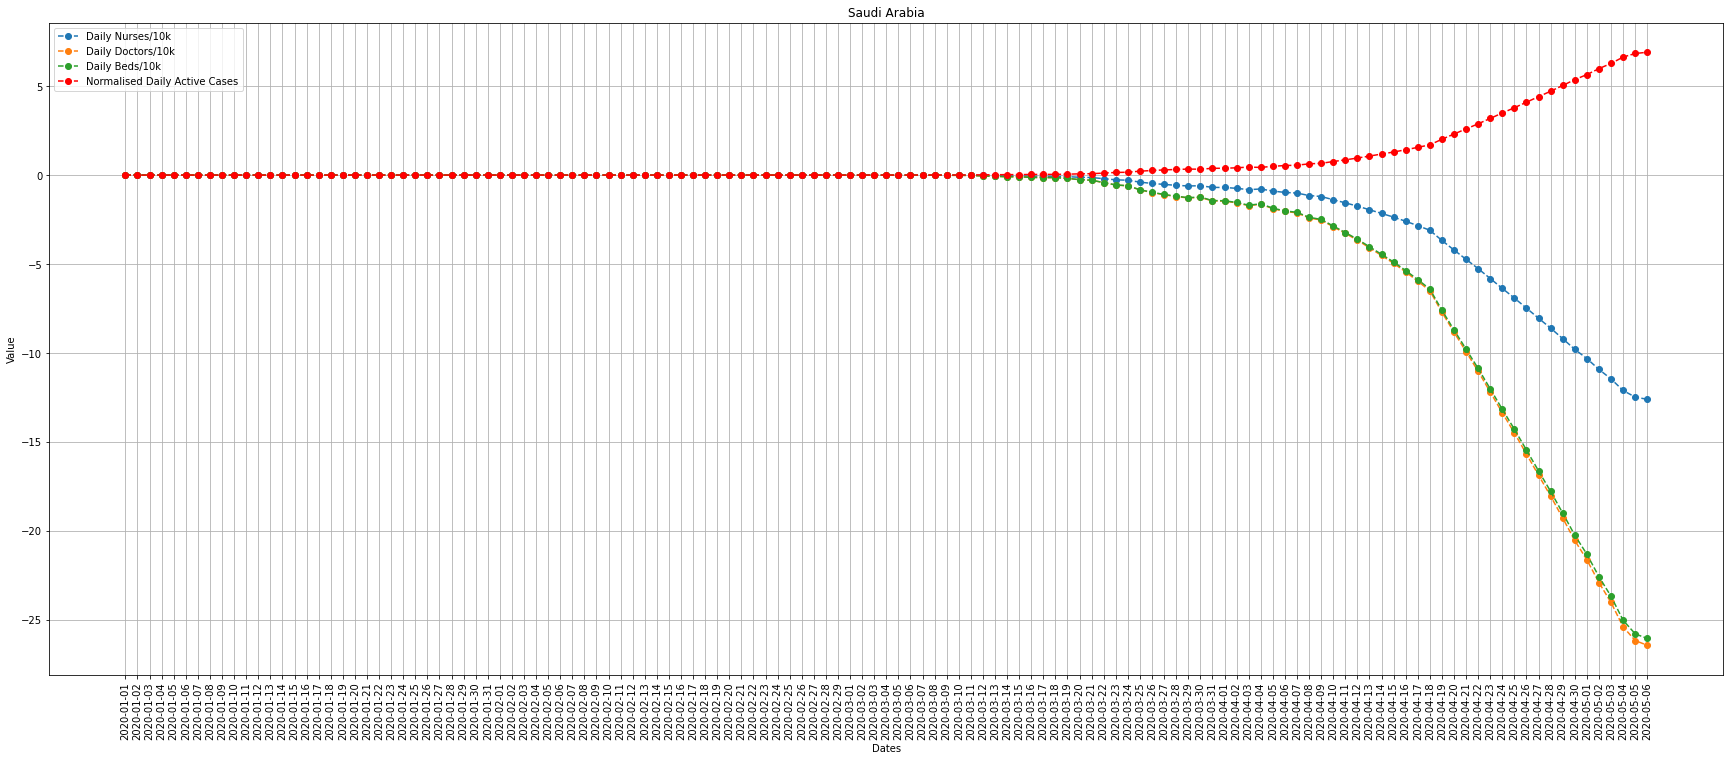

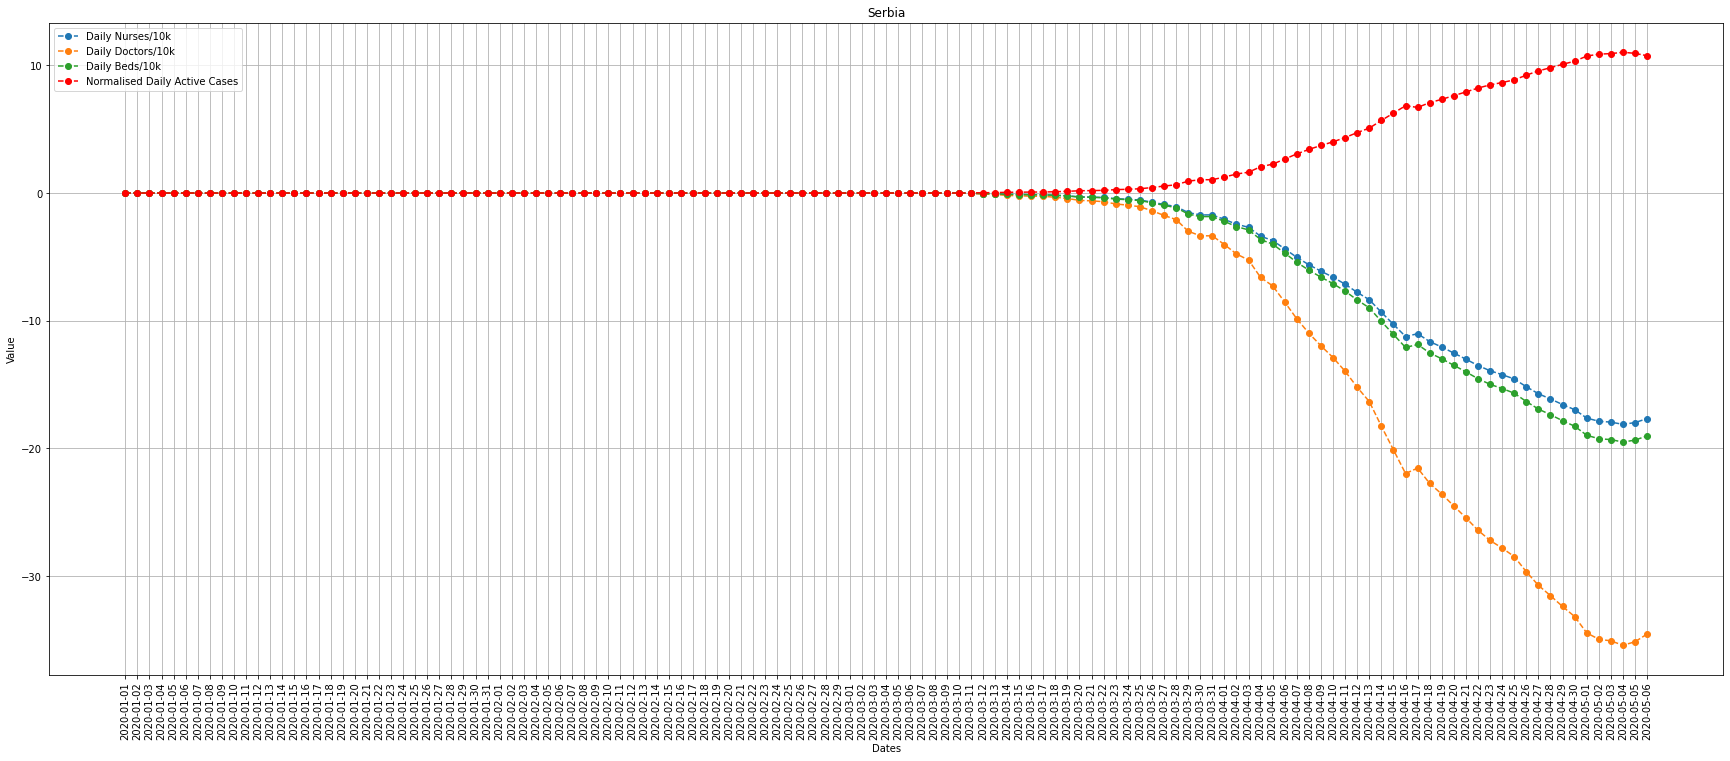

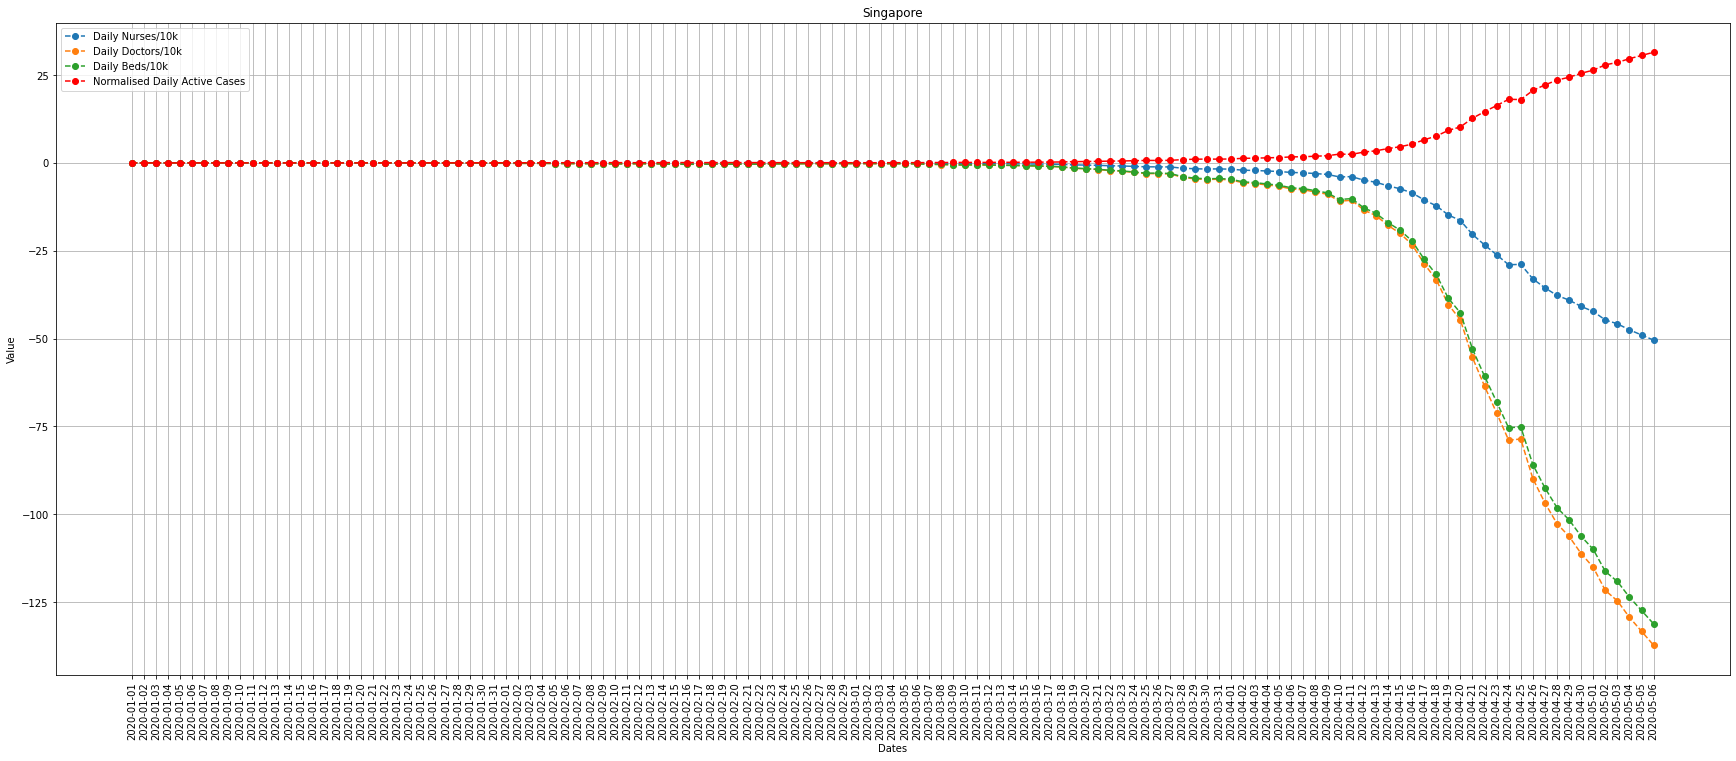

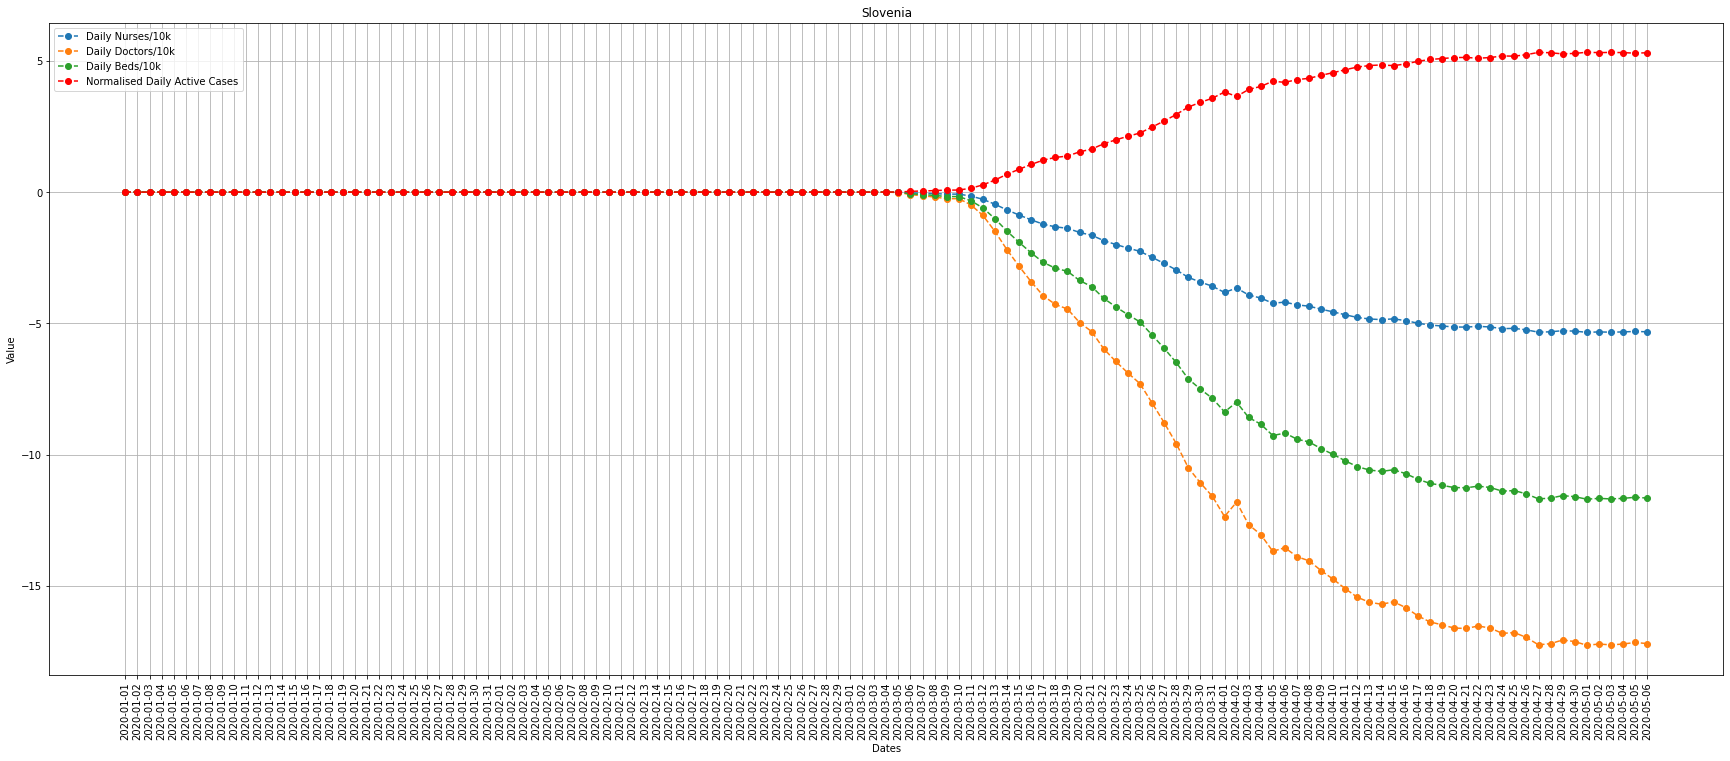

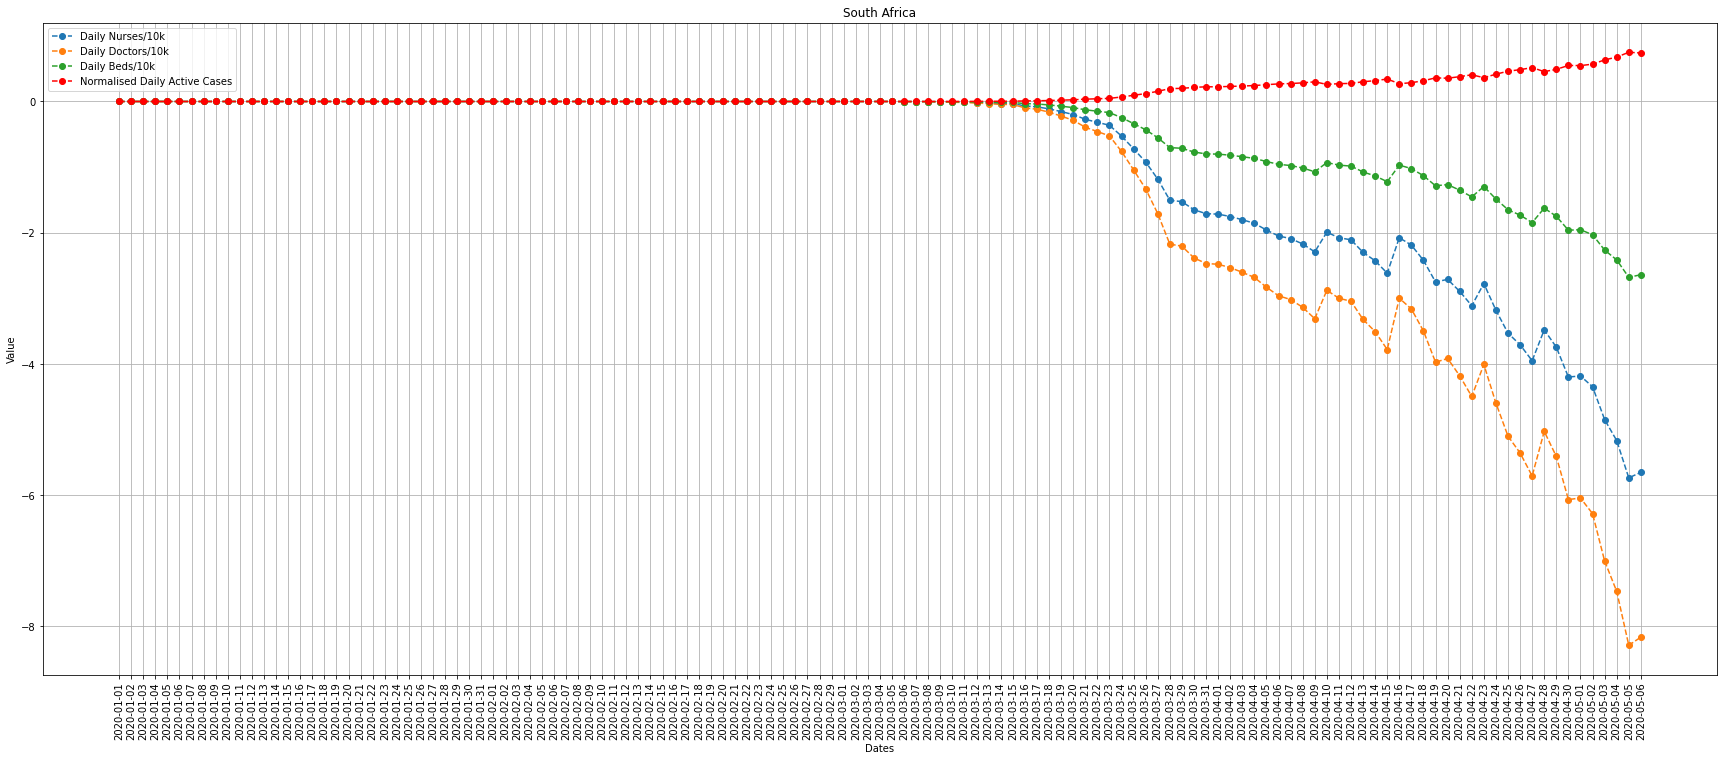

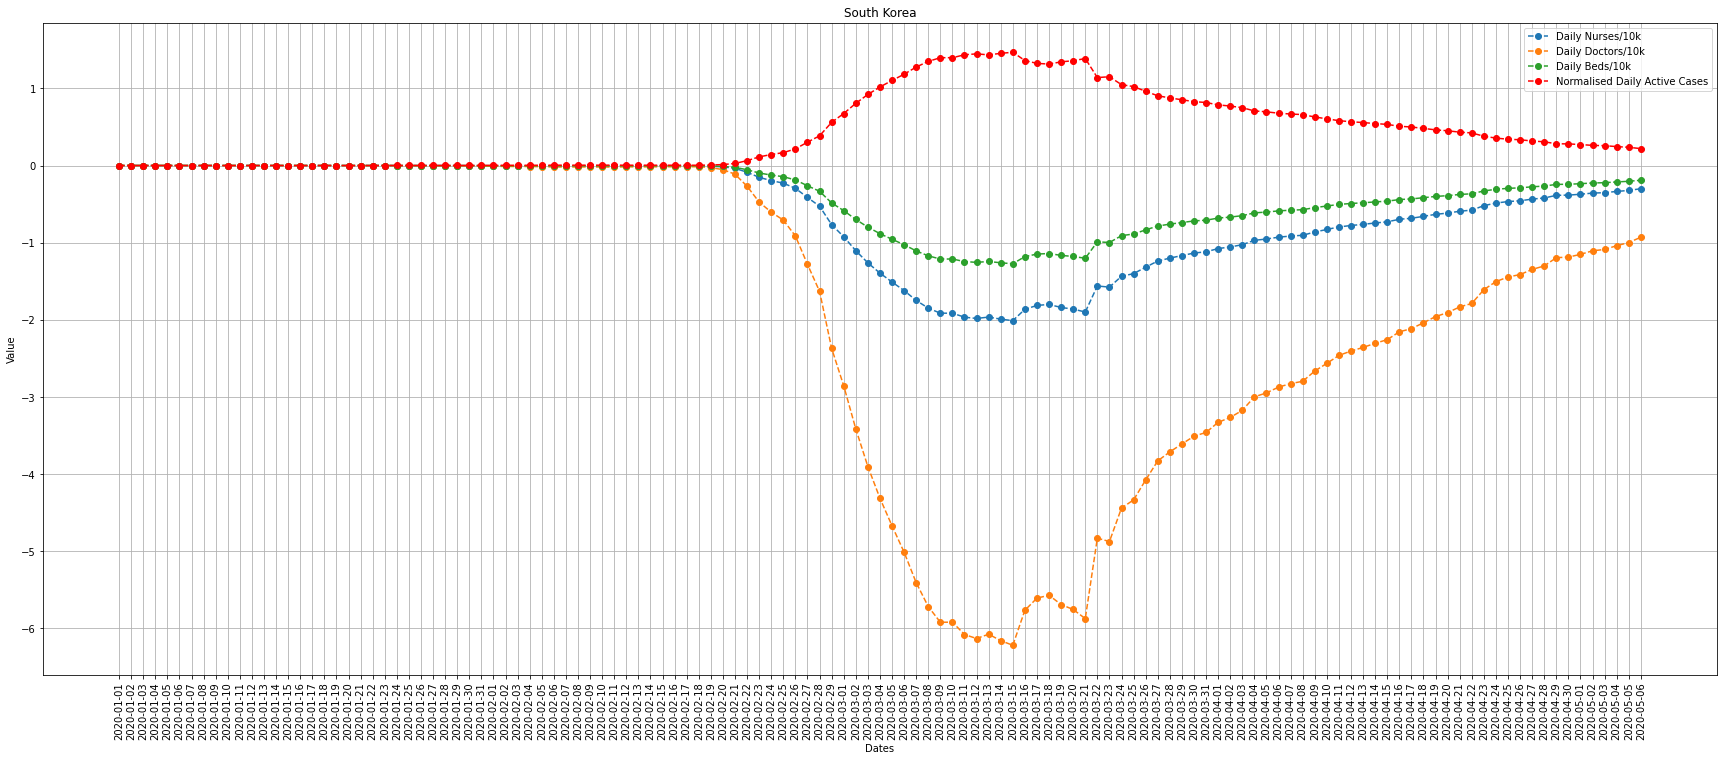

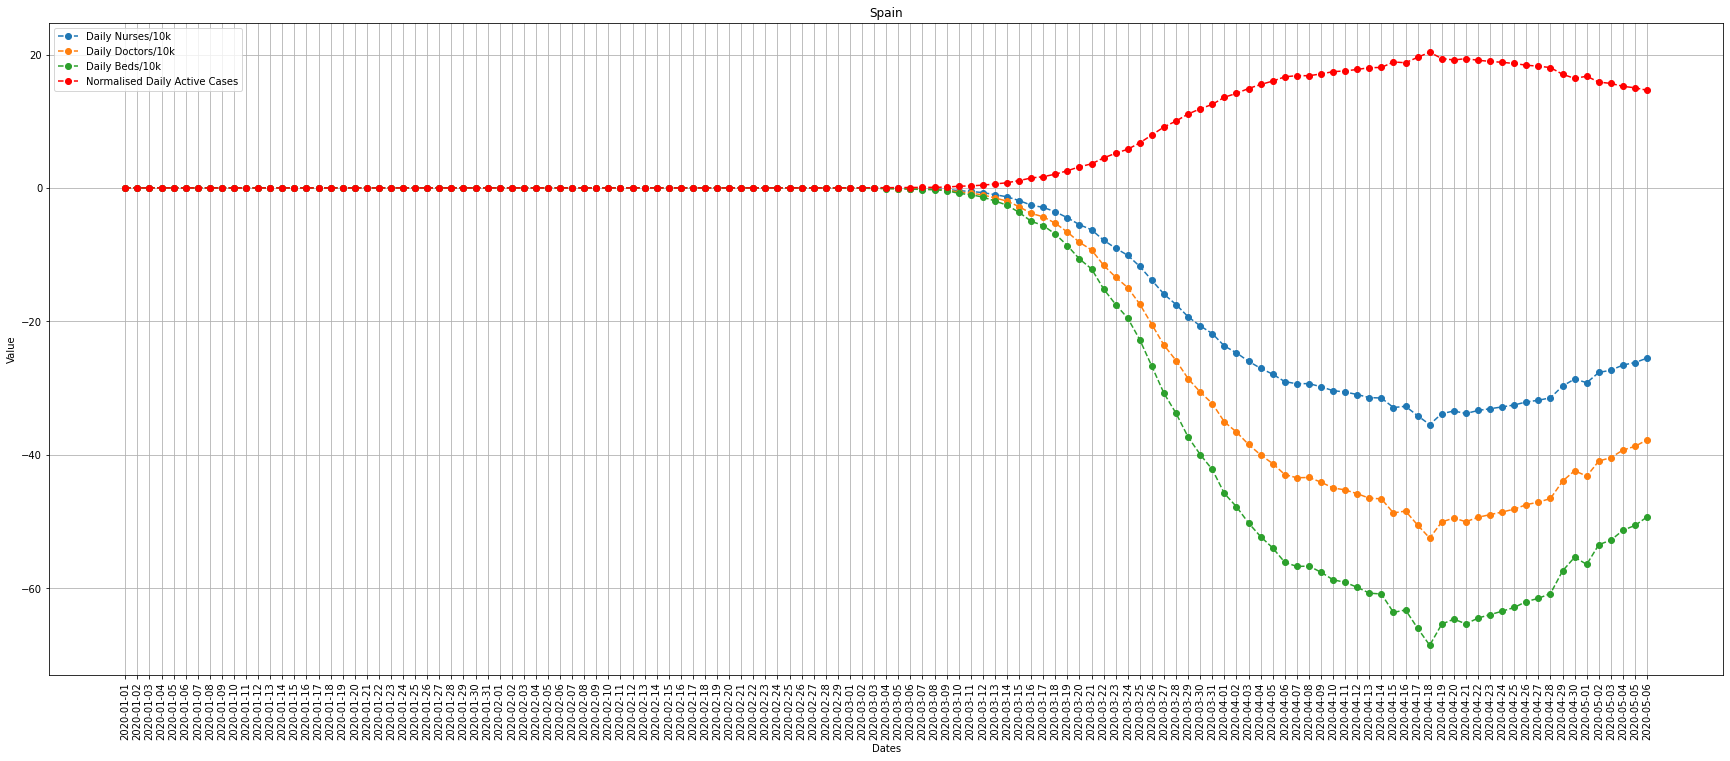

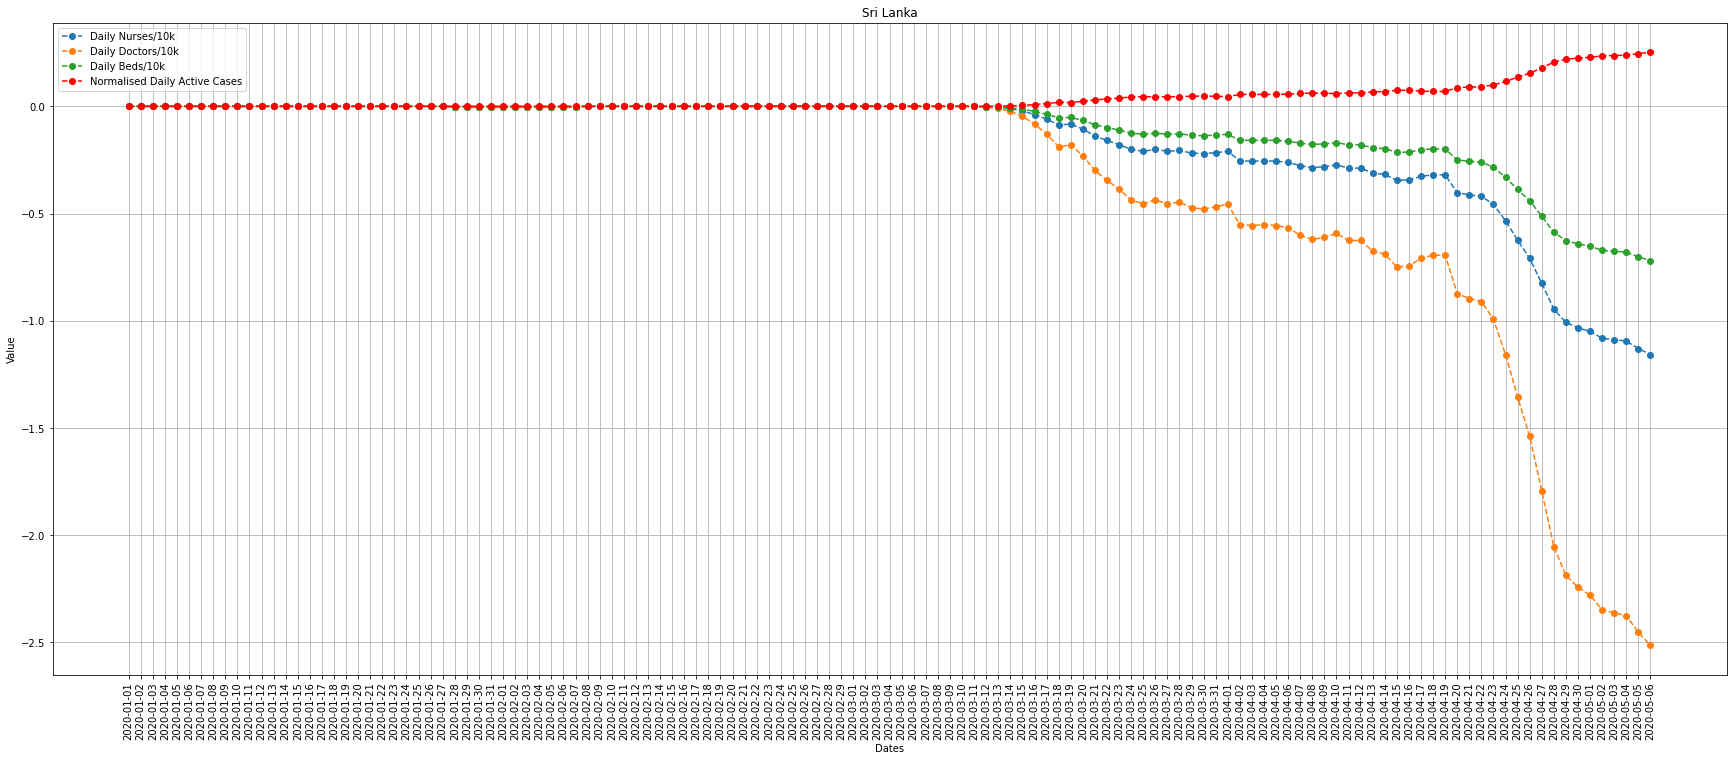

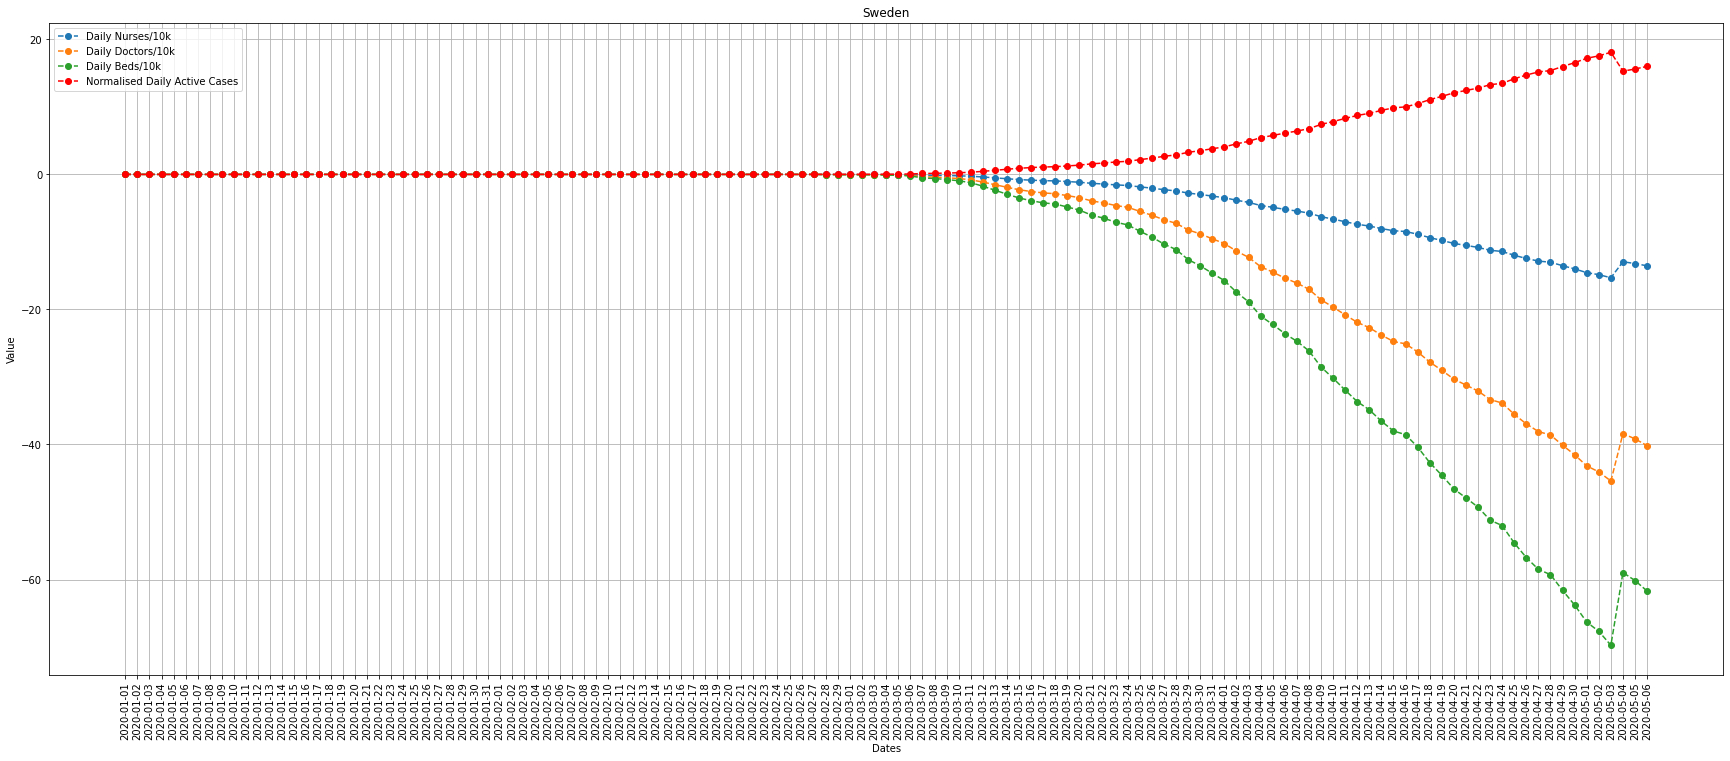

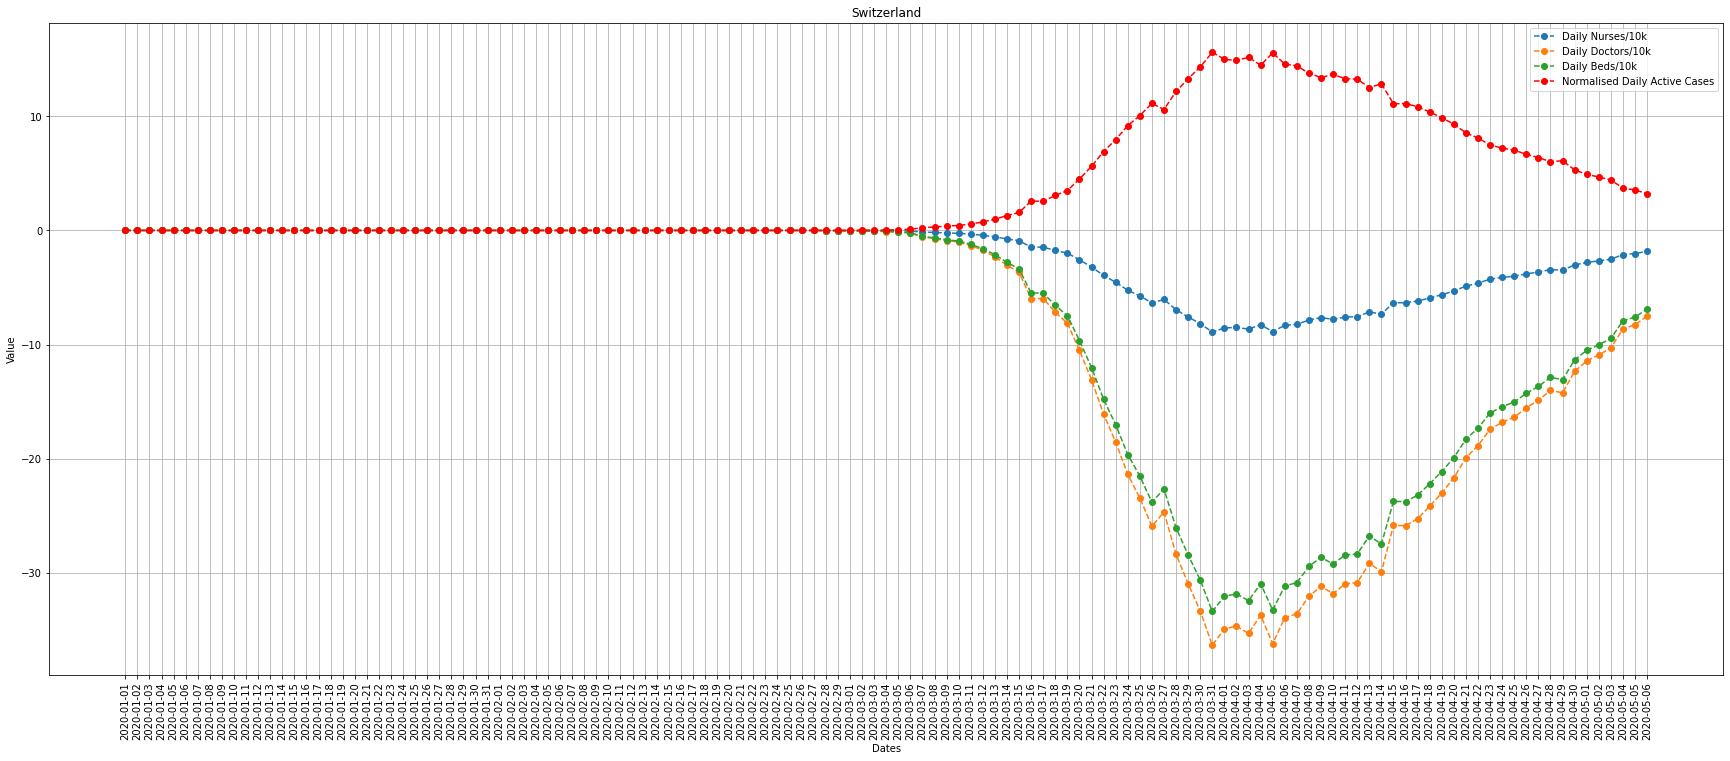

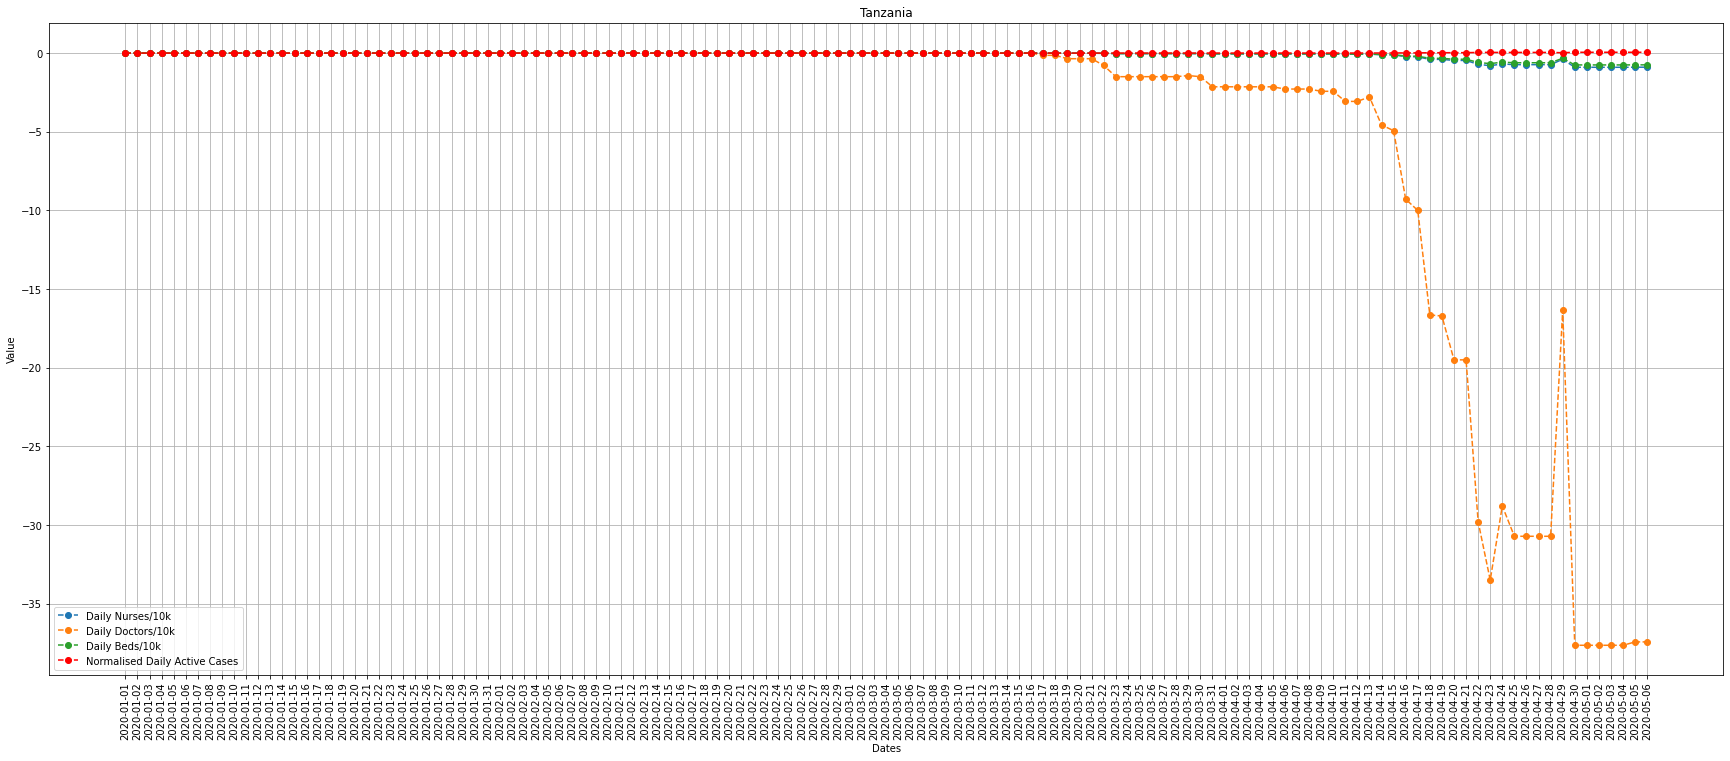

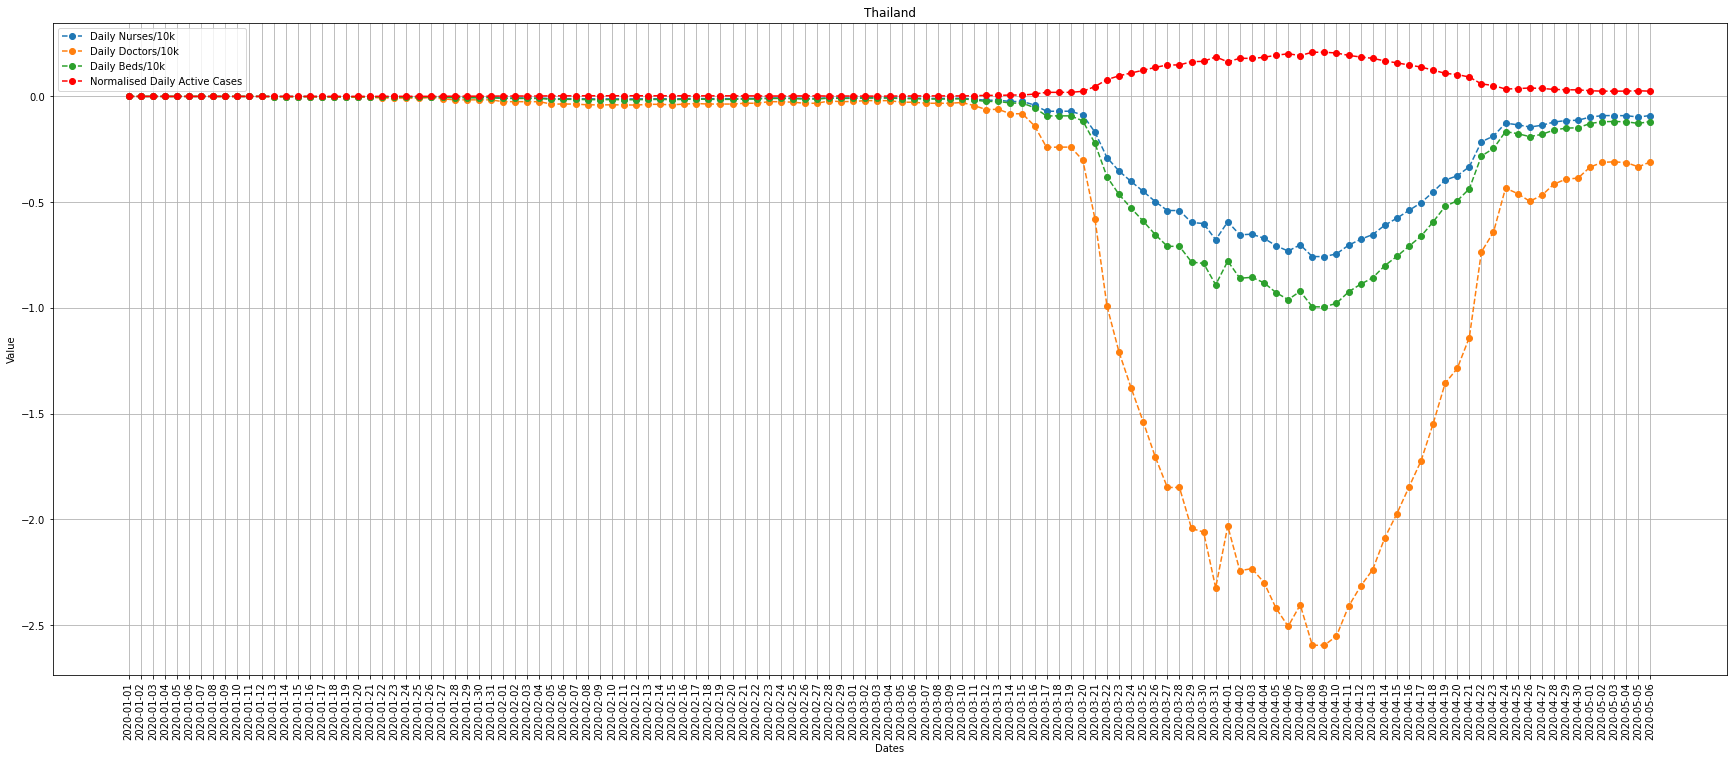

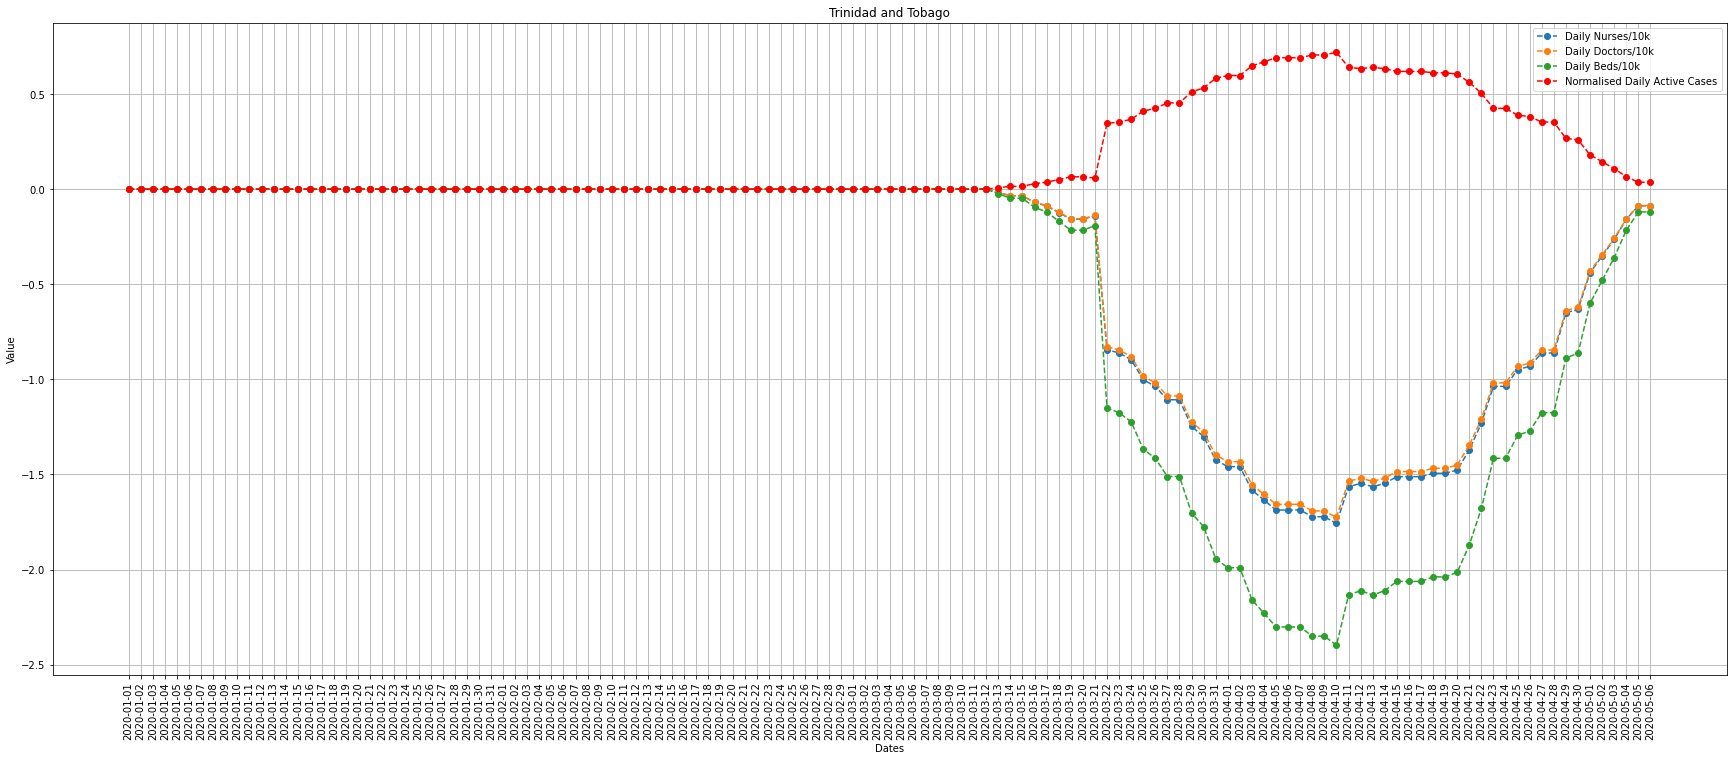

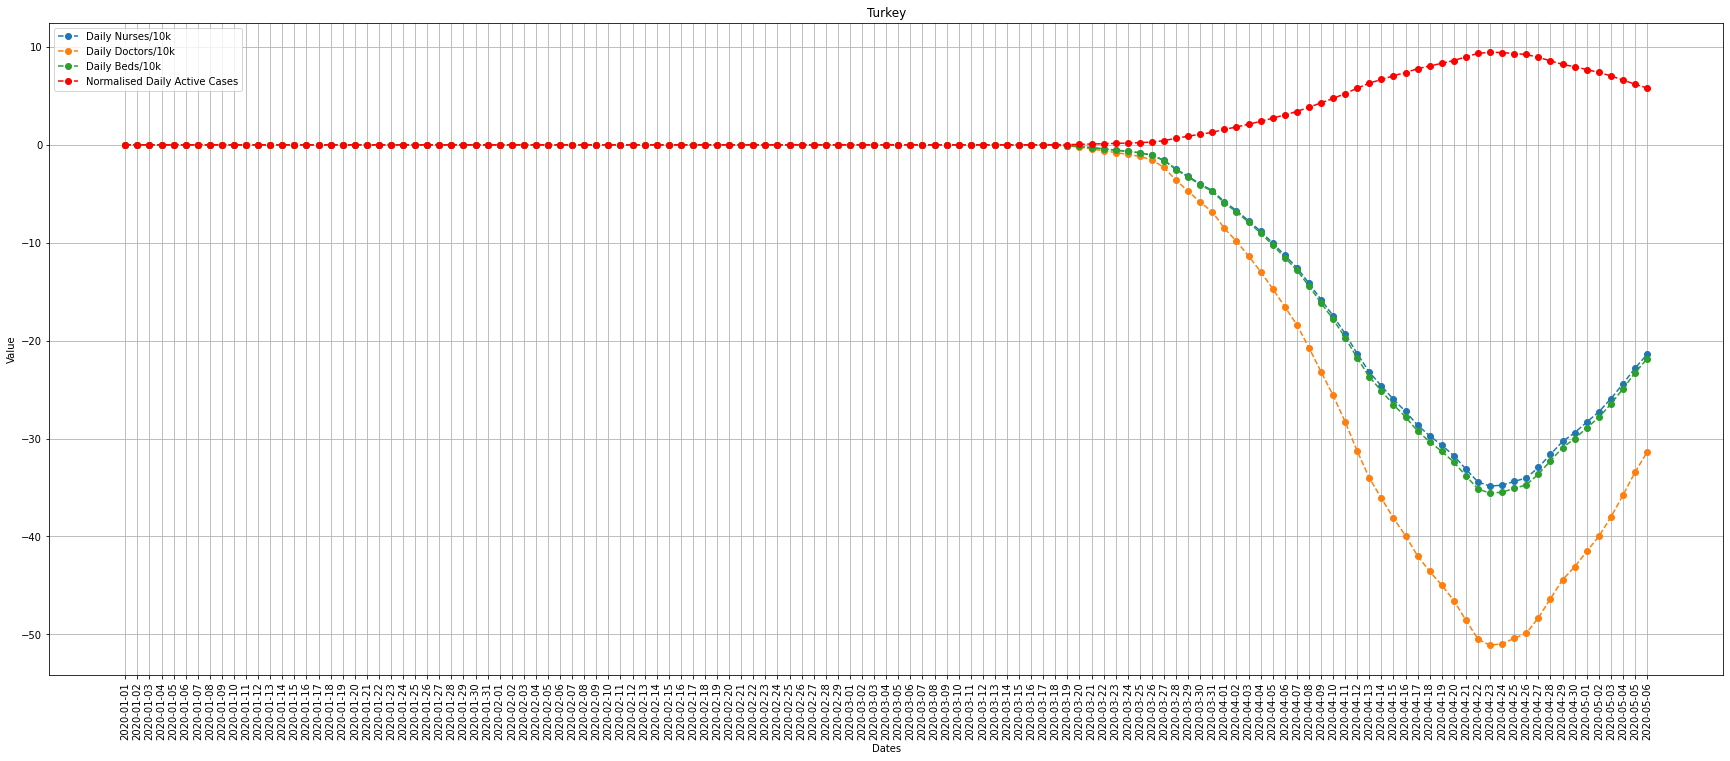

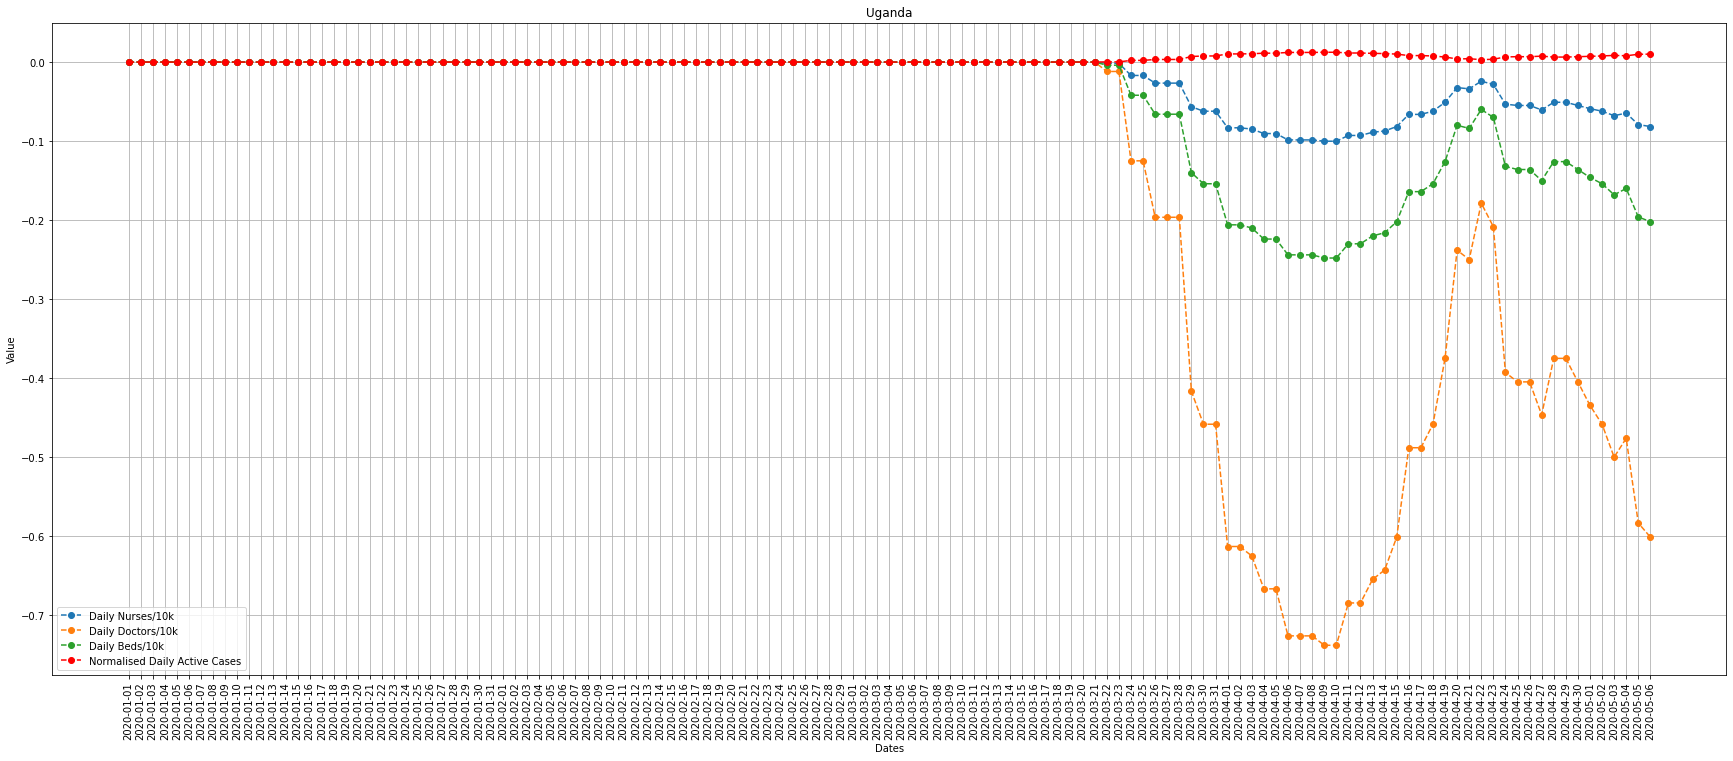

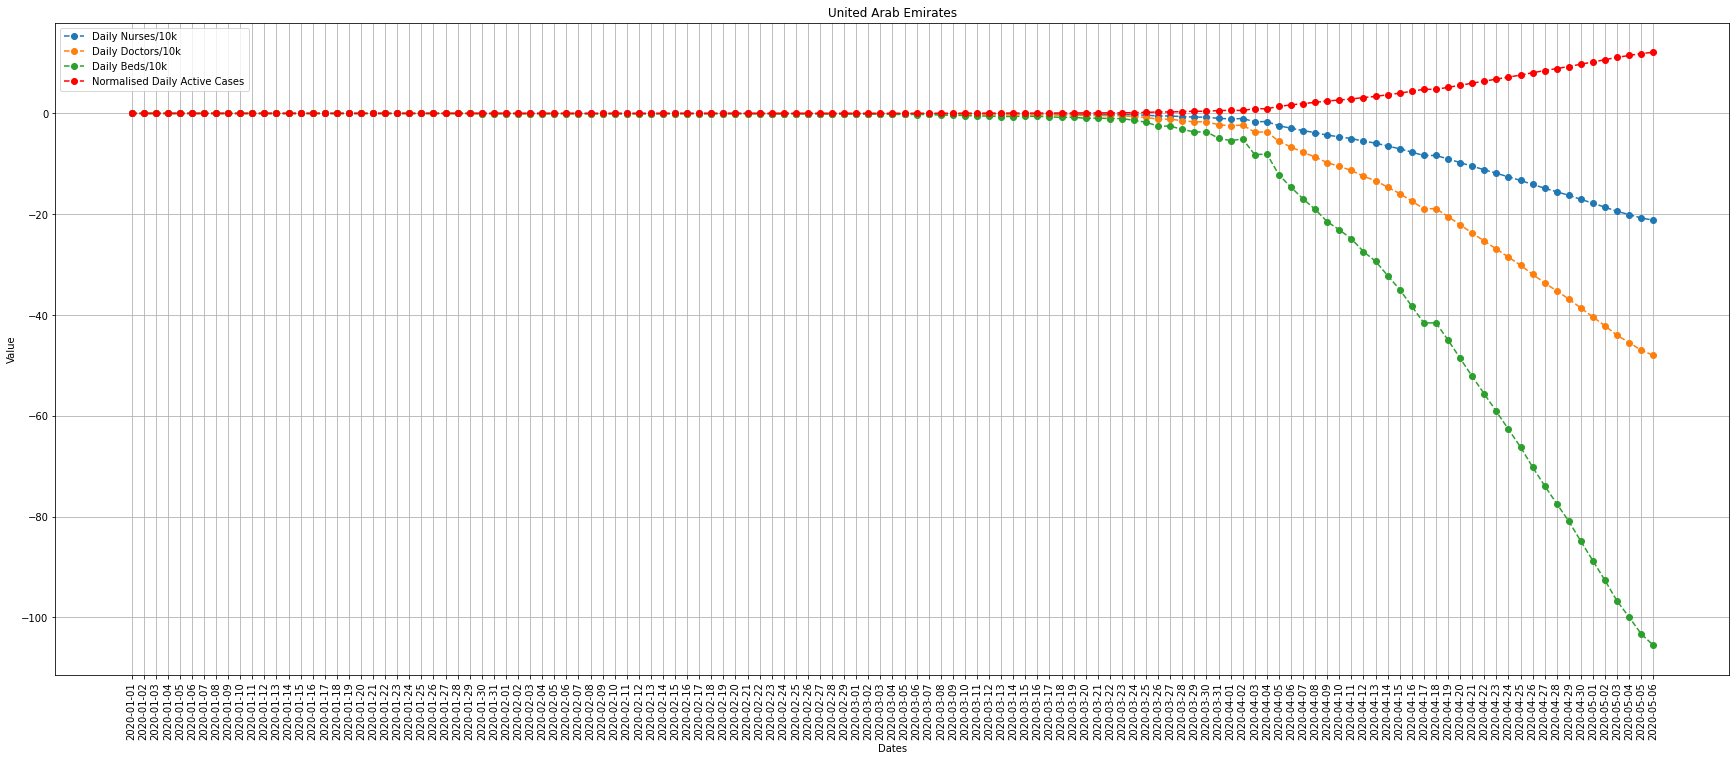

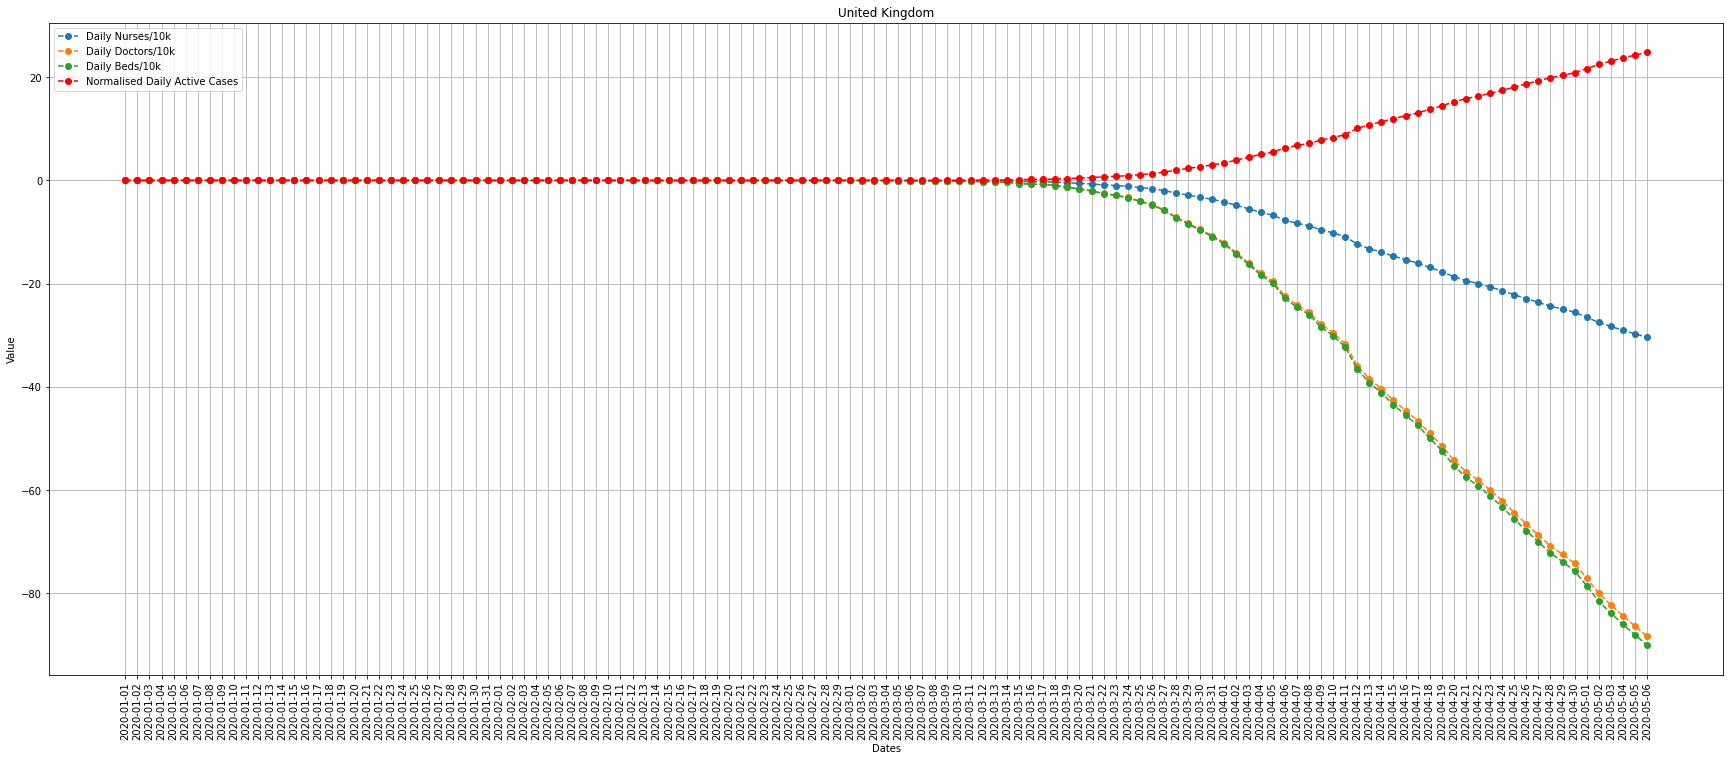

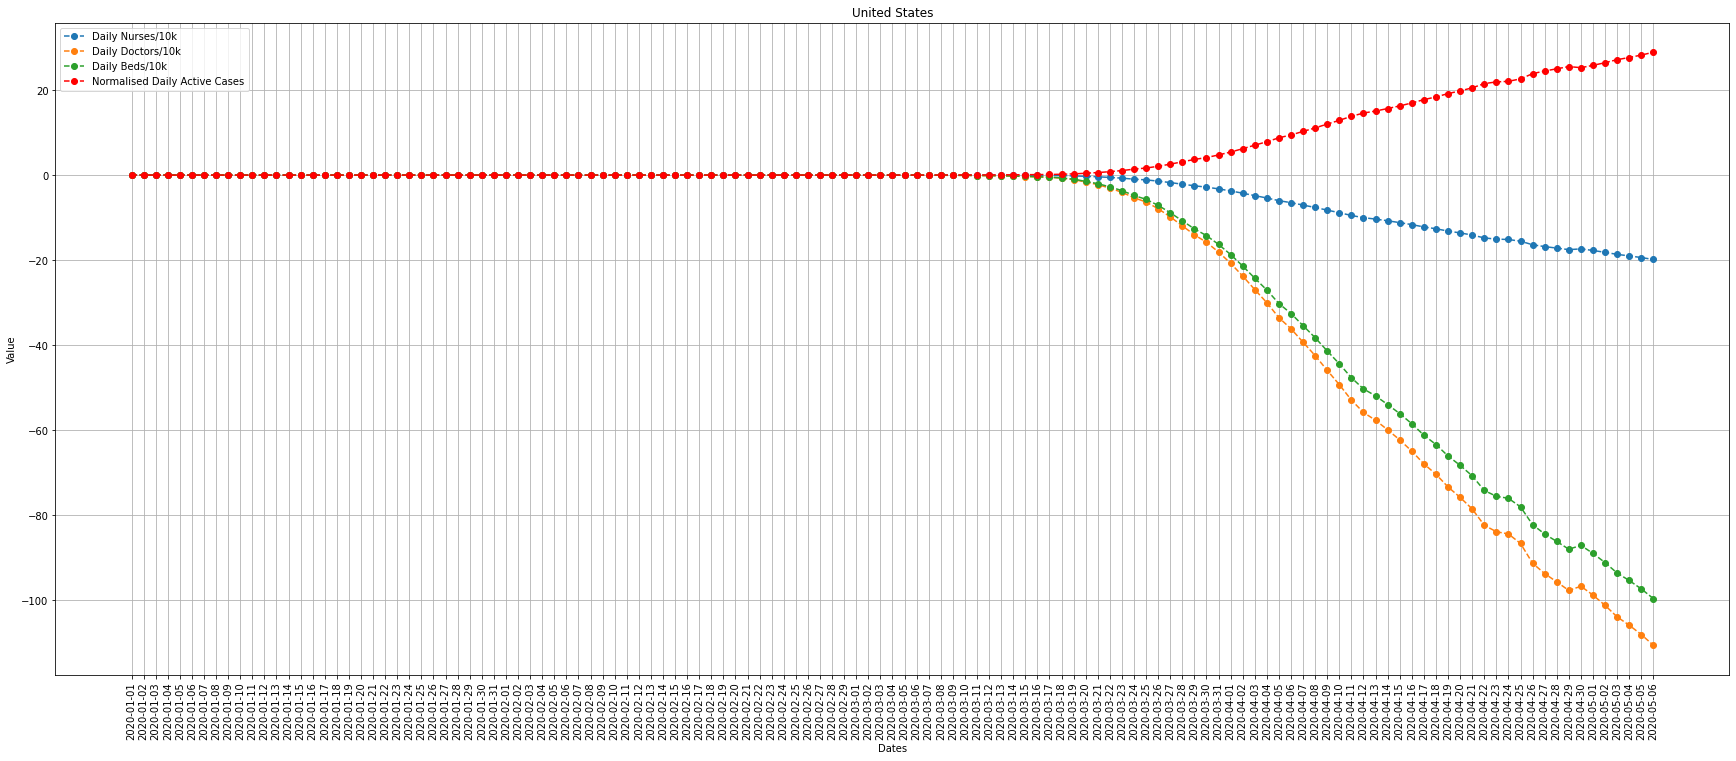

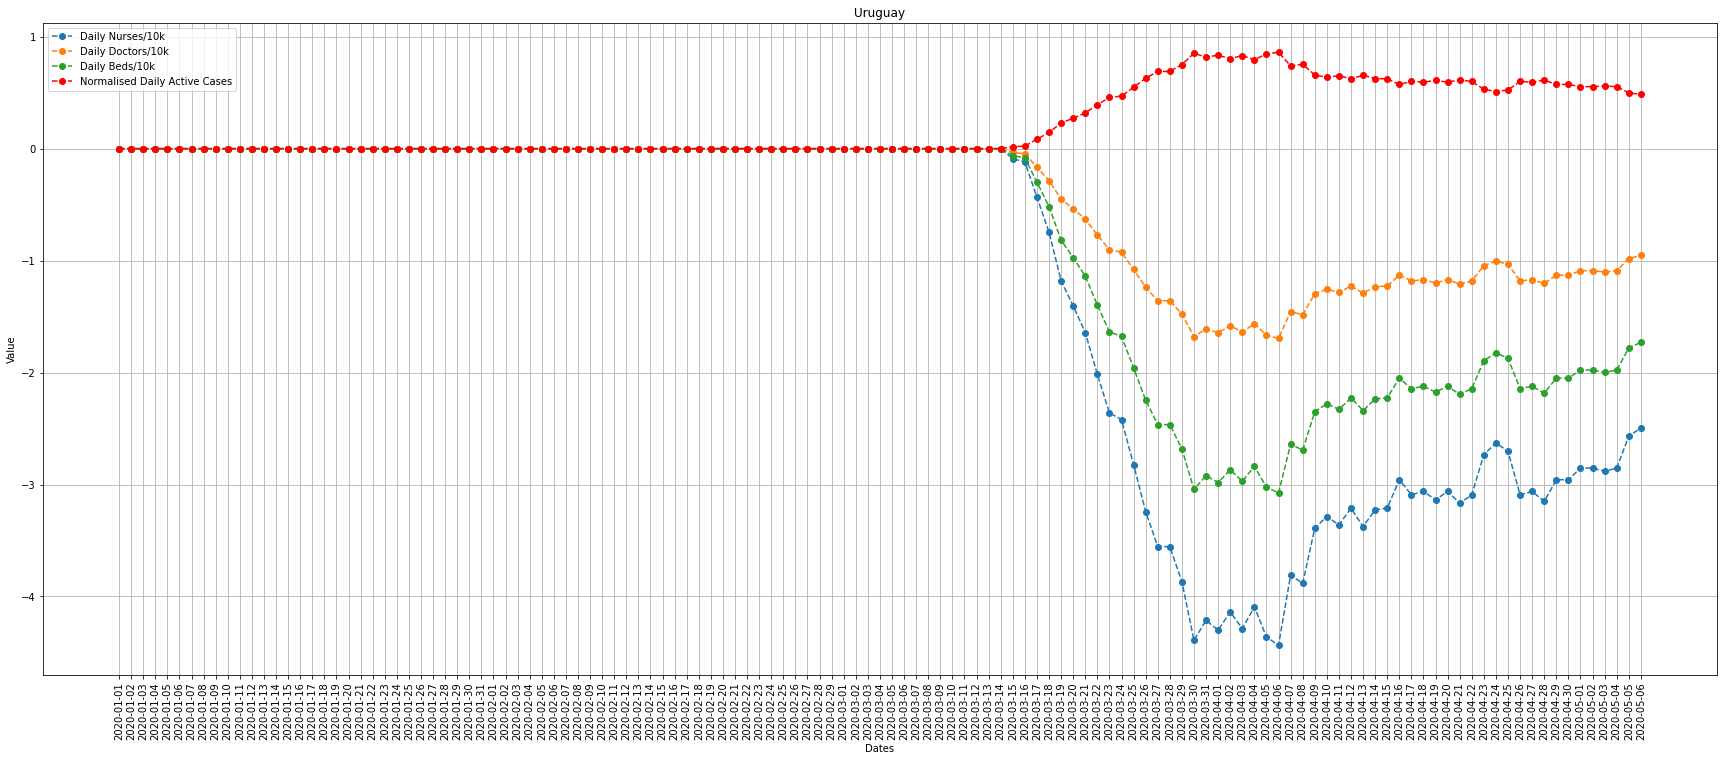

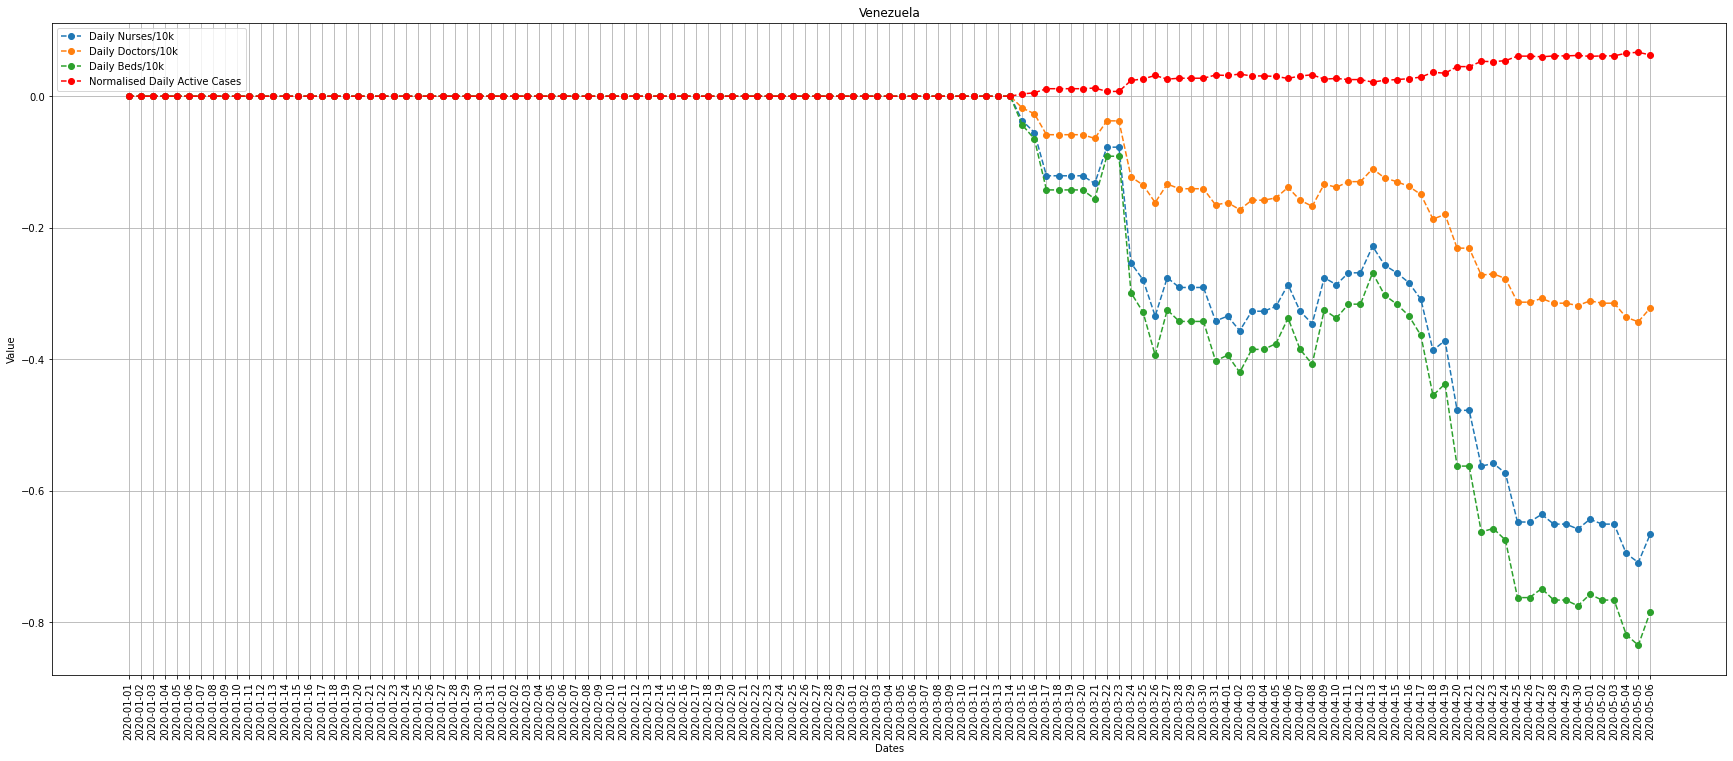

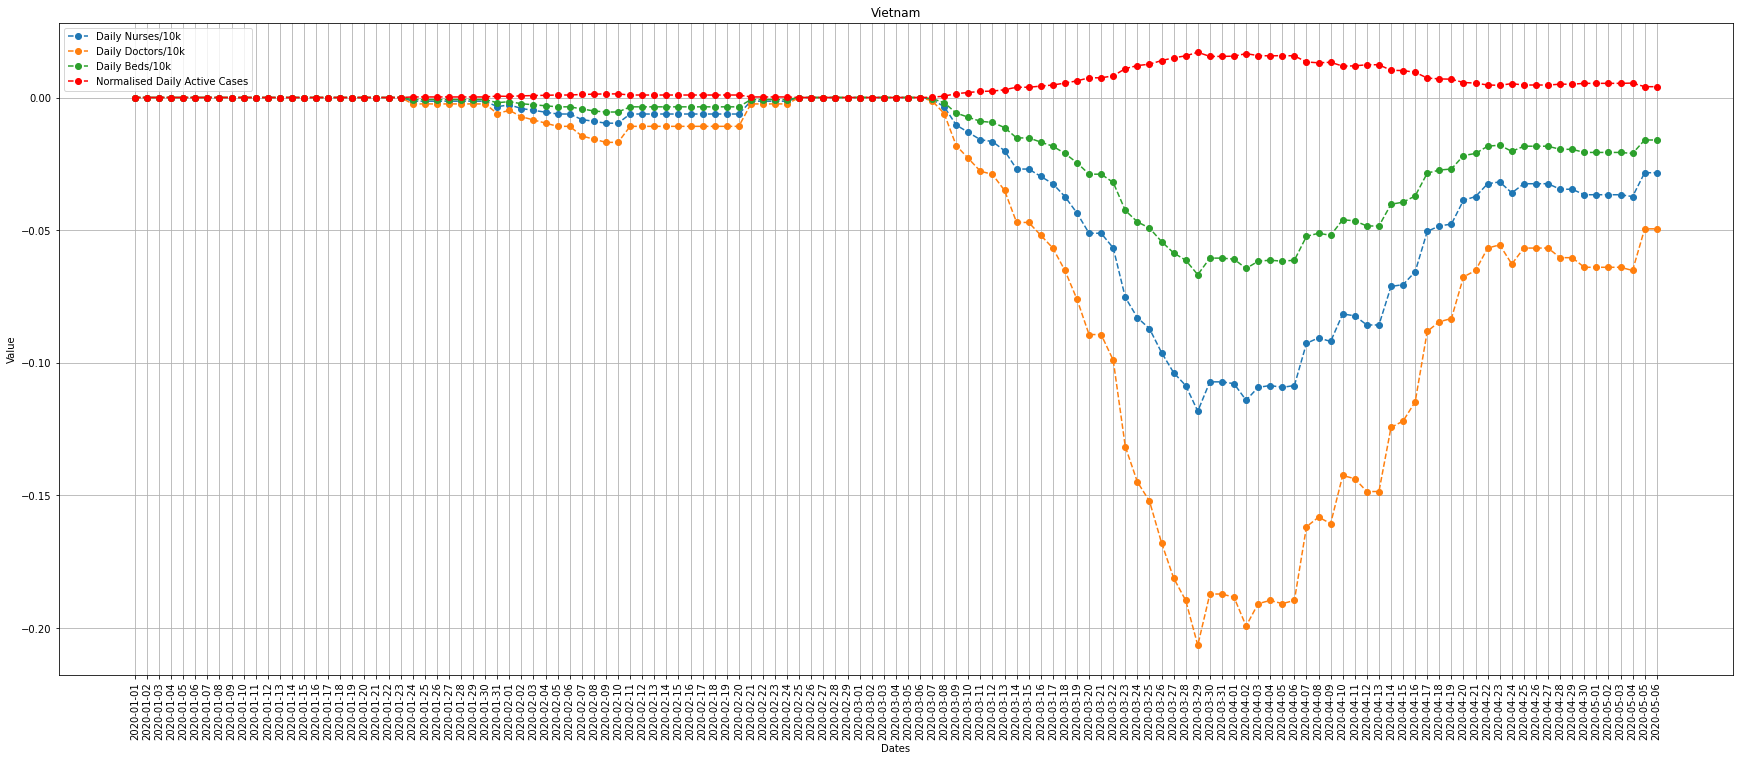

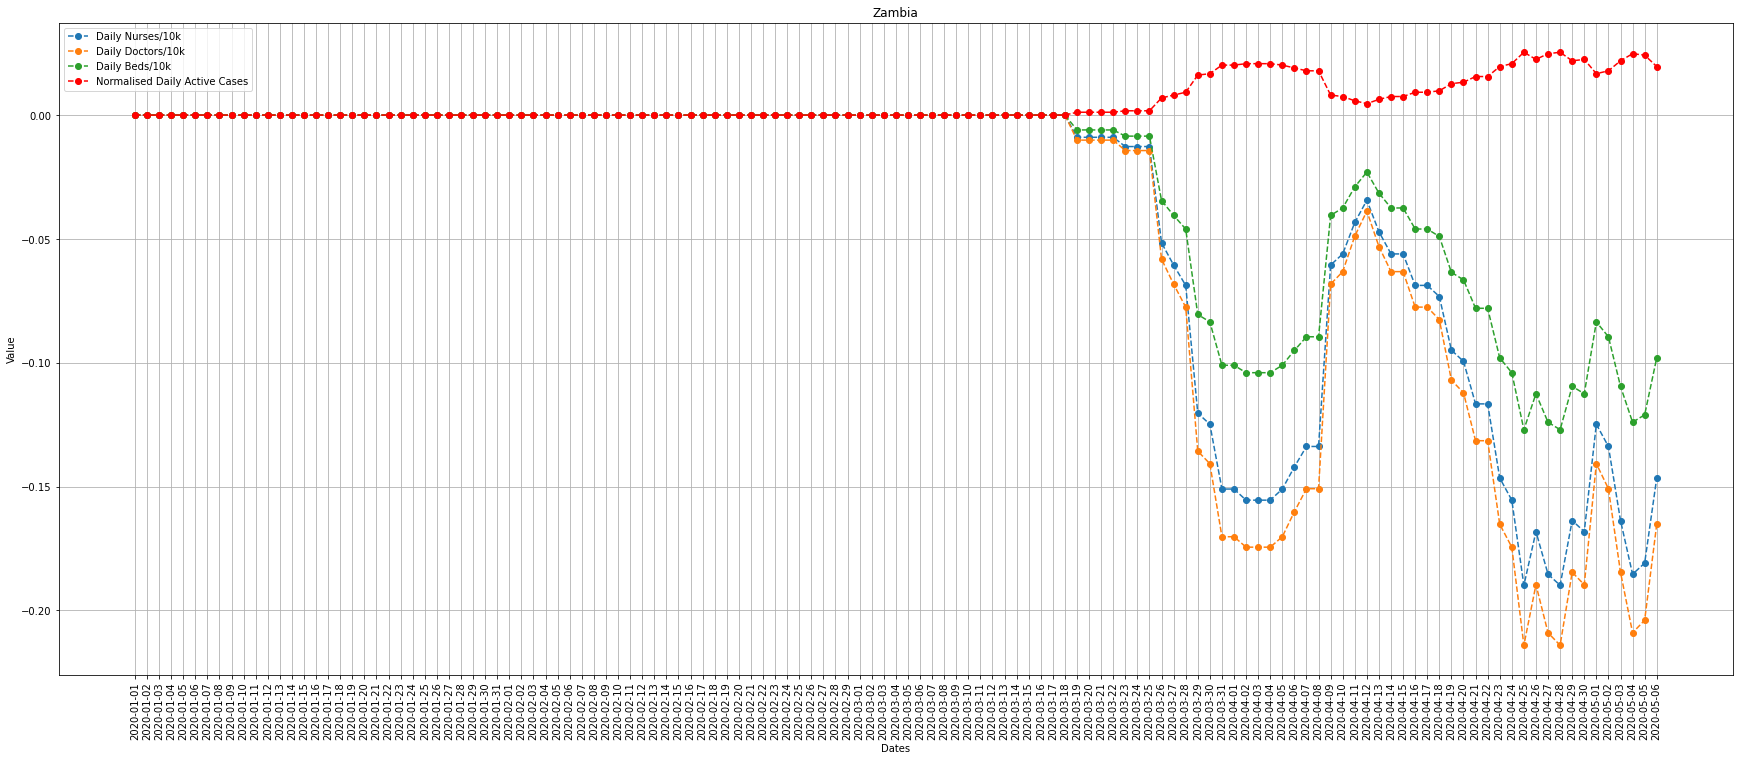

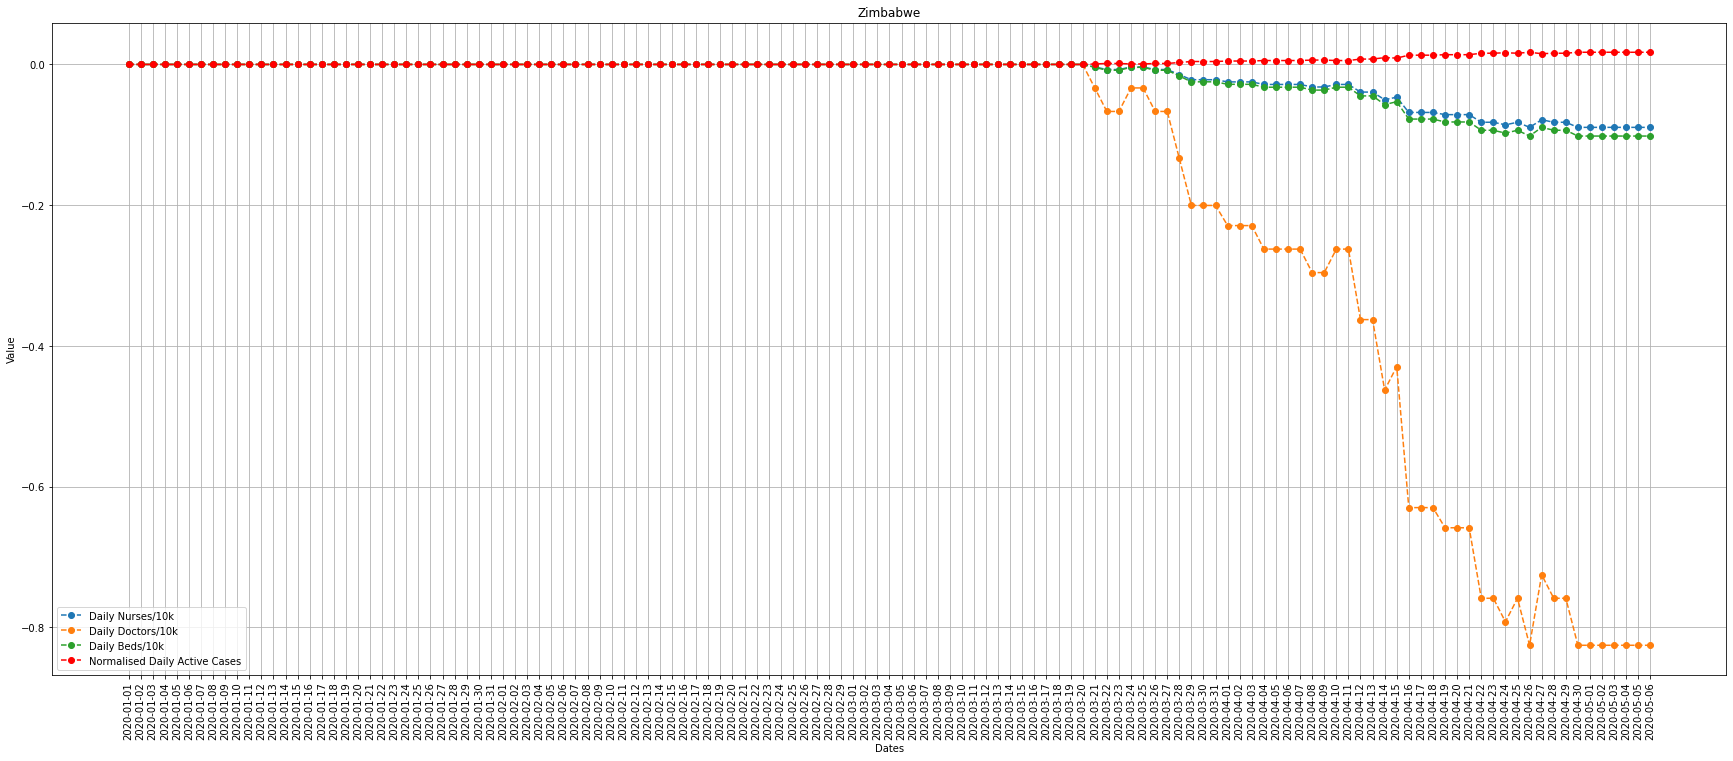

In [9]:
# plot_country('Singapore')
for i in countries : 
  plot_country(i)